# Table of Contents
 <p><div class="lev1"><a href="#Modules,-functions,-results,-variables"><span class="toc-item-num">1&nbsp;&nbsp;</span>Modules, functions, results, variables</a></div><div class="lev3"><a href="#Scaling-#1-Compute-scaling-profiles-and-pr-estimates-for-all-quantiles-larger-than-90%"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Scaling #1 Compute scaling profiles and pr estimates for all quantiles larger than 90%</a></div><div class="lev3"><a href="#Scaling-#2-Compute-scaling-profiles-and-pr-estimates,-based-on-local-qvstar-and-omega,-for-all-quantiles-larger-than-90%"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Scaling #2 Compute scaling profiles and pr estimates, based on local qvstar and omega, for all quantiles larger than 90%</a></div><div class="lev2"><a href="#Compute-all-scalings"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Compute all scalings</a></div><div class="lev3"><a href="#Based-on-omega-and-T"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Based on omega and T</a></div><div class="lev3"><a href="#Based-on-rho,-w-and-T"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Based on rho, w and T</a></div><div class="lev3"><a href="#Based-on-w,-T,-q-and-p"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Based on w, T, q and p</a></div><div class="lev3"><a href="#Based-on-omega-and-qvstar"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Based on omega and qvstar</a></div><div class="lev2"><a href="#Compute-contributions"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Compute contributions</a></div><div class="lev1"><a href="#Plots"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plots</a></div><div class="lev2"><a href="#Percentiles-and-fractional-changes-vs.-percentile-ranks"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Percentiles and fractional changes vs. percentile ranks</a></div><div class="lev3"><a href="#Compare-precipitation-variables-for-SPCAM"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Compare precipitation variables for SPCAM</a></div><div class="lev3"><a href="#Scalings-using-percentile-mean-$\omega$-and-$T$"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Scalings using percentile mean $\omega$ and $T$</a></div><div class="lev3"><a href="#Scalings-using-percentile-mean-$\rho$,-$w$-and-$T$"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Scalings using percentile mean $\rho$, $w$ and $T$</a></div><div class="lev3"><a href="#Scalings-using-percentile-mean-$w$,-$T$,-$q$,-$p_s$"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Scalings using percentile mean $w$, $T$, $q$, $p_s$</a></div><div class="lev3"><a href="#Scalings-using-percentile-mean-$\omega$-and-$q_v^\star$"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Scalings using percentile mean $\omega$ and $q_v^\star$</a></div><div class="lev2"><a href="#Fractional-changes"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Fractional changes</a></div><div class="lev3"><a href="#Scalings-using-percentile-mean-$\omega$-and-$T$"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Scalings using percentile mean $\omega$ and $T$</a></div><div class="lev1"><a href="#New-figures-for-papers-with-scaling-#3"><span class="toc-item-num">3&nbsp;&nbsp;</span>New figures for papers with scaling #3</a></div><div class="lev2"><a href="#Fig.3-Fractional-changes"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Fig.3 Fractional changes</a></div><div class="lev2"><a href="#Fig.4-Vertical-$\omega$-profiles"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fig.4 Vertical $\omega$ profiles</a></div><div class="lev2"><a href="#Robustness-against-alpha"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Robustness against alpha</a></div><div class="lev2"><a href="#Correlation-and-fractional-change-for-omegaGCM-and-omegaCRM*fwet"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Correlation and fractional change for omegaGCM and omegaCRM*fwet</a></div>

# Modules, functions, results, variables

Modules

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from mpl_toolkits.basemap import Basemap
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import gridspec
from netCDF4 import Dataset
from math import *
import glob
import string
import re
from datetime import date, time, datetime
from pprint import pprint
import sys,os
import csv
import pandas as pd
import pickle
import matplotlib.transforms as mtransforms
from scipy.optimize import minimize
from scipy.interpolate import interp1d
import matplotlib.transforms as mtransforms
from scipy.stats import linregress

Paths

In [2]:
# Add ../functions to system path
currentpath = %pwd
currentpath = str(currentpath)
##-- In a python script do the following instead:
##-- currentpath = os.path.dirname(os.path.realpath(__file__))
sys.path.insert(0,currentpath[:currentpath.rfind('/')+1]+'functions')

## Fixed data files input directory
inputdir_fx = '/Users/bfildier/Data/preprocessed/allExperiments/fx'
## Dataframe input directory
# resultdir = os.path.join(os.path.dirname(currentpath),'results')
resultdir = os.path.join(os.path.dirname(currentpath),'results/fullResults')
## Maps (2D tropical data files) input directory
inputdir_maps = os.path.join(os.path.dirname(currentpath),'inputs/forMaps')

##-- Output directories --##
## Figures
figdir = os.path.join(os.path.dirname(currentpath),'figures/fullResults')


Graphical parameters

In [3]:
###--- Set up graphical parameters ---###

%load_ext autoreload
%autoreload 2

##-- Figure setup --##
plt.rcParams.update({'axes.labelsize': 'x-large',
                     'axes.titlesize': 'x-large',
                     'xtick.labelsize': 'large',
                     'ytick.labelsize': 'large',
                     'figure.titlesize': 'xx-large',
                     'figure.subplot.top': '0.87',
                     'figure.subplot.wspace': '0.3',
                     'figure.subplot.hspace': '0.3',
                     'legend.fontsize':'medium'})

##-- Load colors for plots --##
colorfile = os.path.join(currentpath,'colorsAndTypes.pickle')
with open(colorfile,'rb') as handle:
    col = pickle.load(handle)
    lt = pickle.load(handle)
    pal = pickle.load(handle)
    lw = pickle.load(handle)
    dashes = pickle.load(handle)
    mark = pickle.load(handle)
    cmaps = pickle.load(handle)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Own modules and functions

In [4]:
from importingData import *
from extremeScaling import *
from thermodynamics import *
from thermo_funcs import *
from thermo_constants import *

Additional functions

In [5]:
###--- Functions ---### 

## Importing the results into directories of dataframes
def getStatDataFrame(stat,compsets,experiments,subsets,resultdir):
    
    """Import data frames in the for of embedded dictionaries.
    Output can be called as such: result[compset][experiment][subset]
    """
    
    stats_ok = ("pr_quantile_IL","pr_density_IL","pr_jointDensity_IL",
                "var2D_mean","var2D_meanAtQ",
                "var3D_meanProfile","var3D_meanProfileAtQ")
    df = {}
    if stat in stats_ok:
        for compset in compsets:
            df[compset] = {}
            for experiment in experiments:
                df[compset][experiment] = {}
                for subset in subsets_for_comp[compset]:
#                     if compset == "FAMIPC5" and subset == "mfzero":
#                         continue
                    csvfile = "%s_%s_%s_%s.csv"%(stat,compset,experiment,subset)
                    if stat in ("var2D_meanAtQ","var3D_meanProfileAtQ","pr_jointDensity_IL"):
                        df[compset][experiment][subset] = pd.read_csv(os.path.join(resultdir,csvfile),
                                                                      header=[0,1,2], skipinitialspace=True)
#                     elif stat == "pr_jointDensity_IL":
#                         df_jd = pd.read_csv(os.path.join(resultdir,csvfile))
#                         df_jd = df_jd.set_index(df_jd.columns[0])
#                         df[compset][experiment][subset] = df_jd
                    else:
                        df[compset][experiment][subset] = pd.read_csv(os.path.join(resultdir,csvfile))
    else:
        print "Warning: file handle not known."
        print "Should be one of the following:",stats_ok
    return df



## Read the 2D arrays from string format in dataframe
def readJointDensityDataFrame(df,id1,id2):
    H = df[id1][id2]
    H = re.sub('[ \s\t\n]+', ' ',H)
    H = re.sub('\[[ ]*','',H)
    H = H.replace(' ',',')
    H = H.replace('],',' ')
    H = H.replace(']]','')
    H = H.split(' ')
    H = np.array([map(float,h.split(',')) for h in H])
    return H

def filter2D(m):
    def add2D(m):        
        mout = 4*m.copy()
        mout[:-1,:] = mout[:-1,:] + m[1:,:]
        mout[:,:-1] = mout[:,:-1] + m[:,1:]
        mout[1:,:] = mout[1:,:] + m[:-1,:]
        mout[:,1:] = mout[:,1:] + m[:,:-1]
        return mout
    return np.divide(add2D(m),add2D(np.ones(m.shape)))

def normalizeJointDensity(H,weights):
    n = weights.size
    H_norm = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            h = H[i,j]/np.interp((i+j)/2.,range(n),weights)
            if h is not None:
                H_norm[i,j] = h
    return H_norm

def normalizeJointDensity2(H):
    ## Define weights by summing along cross diagonals
    n = np.min(H.shape)
    weights = {}
    n_w = {}
    for i in range(n):
        for j in range(n):
            w_id = str((i+j)/2.)
            if w_id in weights.keys():
                weights[w_id] += H[i,j]
                n_w[w_id] += 1
            else:
                weights[w_id] = H[i,j]
                n_w[w_id] = 1
#     ## Define weights by summing along axis 0
#     weights = H.sum(axis=1)
#     n = weights.size
    ## Compute normalized 2D densities
    H_norm = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            w_id = str((i+j)/2.)
            h = H[i,j]/weights[w_id]
#             h = H[i,j]/weights[w_id]/n_w[w_id]
#             h = H[i,j]/weights[i]
            if h is not None:
                H_norm[i,j] = h
    return H_norm


def getSubset(subsetName,landmask,ndays=1):

    if subsetName == "ocean":
        # Define subset of points over ocean
        subset_pts = np.logical_not(landmask)
    elif subsetName == "land":
        # Define subset of points over land
        subset_pts = np.array(landmask[:],dtype=bool)
    elif subsetName == "tropics":
        subset_pts = np.ones(landmask.shape,dtype=bool)

    subset_pts = np.vstack([[subset_pts]]*ndays)    
    return subset_pts

## Filter before plotting
def filter121(var1D):
    var1D = np.array(var1D,dtype=float)
    var_filt = 0.25*var1D[:-2] + 0.5*var1D[1:-1] + 0.25*var1D[2:]
    return np.hstack([np.array(np.nan),var_filt,np.array(np.nan)])


## Get vertical profiles for scaling
def getProfilesForScaling(varids,pr_id,Q_id,df_mean,df_prof,computeP,q_id='Q'):
    
    ps_id, t_id, omega_id = varids
        
    ## Get surface values
    pres_s = df_mean[ps_id][pr_id][Q_id][0]
        
    ## Get existing profiles
    temp = df_prof[t_id][pr_id][Q_id]
    if "CRM_T" in t_id:
        temp = temp[::-1]
    omega = df_prof[omega_id][pr_id][Q_id]

    ## Compute missing profiles
    pres = computeP(pres_s)

    ## Compute scaling profiles and return
    profiles = pres_sc,temp_sc,qvs_sc,omega_sc = profilesForScalingFromMeanProfilesAtQ(pres,temp,omega)
    
    return profiles

## Get vertical profiles for scaling
def getProfilesForScalingFromOmegaAndQvstar(varids,pr_id,Q_id,df_mean,df_prof,computeP,q_id='Q'):
    
    ps_id, t_id, omega_id, qvstar_id = varids
        
    ## Get surface values
    pres_s = df_mean[ps_id][pr_id][Q_id][0]
        
    ## Get existing profiles
    temp = df_prof[t_id][pr_id][Q_id]
    if "CRM_T" in t_id:
        temp = temp[::-1]
    omega = df_prof[omega_id][pr_id][Q_id]
    qvstar = df_prof[qvstar_id][pr_id][Q_id]

    ## Compute missing profiles
    pres = computeP(pres_s)

    ## Compute scaling profiles and return
    profiles = pres_sc,temp_sc,qvs_sc,omega_sc = profilesForScalingFromMeanProfilesAtQ(pres,temp,omega,qvs=qvstar)
    
    return profiles

## Get vertical profiles for scaling from percentile-mean Rho, W and T
def getProfilesForScalingFromRhoWandT(varids,pr_id,Q_id,df_mean,df_prof,computeP,q_id='Q'):
    
    ps_id, t_id, rho_id, w_id = varids
        
    ## Get surface values
    pres_s = df_mean[ps_id][pr_id][Q_id][0]
        
    ## Get existing profiles
    temp = df_prof[t_id][pr_id][Q_id]
    if "CRM_T" in t_id:
        temp = temp[::-1]
    wspeed = df_prof[w_id][pr_id][Q_id][::-1]
    rho = df_prof[rho_id][pr_id][Q_id]
    omega = -g*np.multiply(rho,wspeed)

    ## Compute missing profiles
    pres = computeP(pres_s)

    ## Compute scaling profiles and return
    profiles = pres_sc,temp_sc,qvs_sc,omega_sc = profilesForScalingFromMeanProfilesAtQ(pres,temp,omega)
    
    return profiles

## Get vertical profiles for scaling from percentile-mean PS, T, W and Q (same as initial scaling)
def getProfilesForScalingFromWTQPS(varids,pr_id,Q_id,df_mean,df_prof,computeP,q_id='Q'):
    
    ps_id, t_id, spechum_id, w_id = varids
        
    ## Get surface values
    pres_s = df_mean[ps_id][pr_id][Q_id][0]
        
    ## Get existing profiles
    temp = df_prof[t_id][pr_id][Q_id]
    if "CRM_T" in t_id:
        temp = temp[::-1]
    wspeed = df_prof[w_id][pr_id][Q_id][::-1]
    spechum = df_prof[spechum_id][pr_id][Q_id]

    ## Compute missing profiles
    pres = computeP(pres_s)
    rho = airDensity(temp,pres,spechum)
    omega = -g*np.multiply(rho,wspeed)

    ## Compute scaling profiles and return
    profiles = pres_sc,temp_sc,qvs_sc,omega_sc = profilesForScalingFromMeanProfilesAtQ(pres,temp,omega)
    
    return profiles

## Get vertical profiles for scaling
def getProfilesForScalingFromBuck(varids,pr_id,Q_id,df_mean,df_prof,computeP,q_id='Q'):
    
    ps_id, t_id, omega_id = varids
        
    ## Get surface values
    pres_s = df_mean[ps_id][pr_id][Q_id][0]
        
    ## Get existing profiles
    temp = df_prof[t_id][pr_id][Q_id]
    omega = df_prof[omega_id][pr_id][Q_id]

    ## Compute missing profiles
    pres = computeP(pres_s)

    ## Compute scaling profiles and return
    profiles = pres_sc,temp_sc,qvs_sc,omega_sc = profilesForScalingFromMeanProfilesAtQFromBuck(pres,temp,omega)
    
    return profiles

## Get vertical profiles for scaling - convective-scale #2
def getProfilesForScaling2(varids,pr_id,Q_id,df_mean,df_prof,computeP,q_id='Q'):
    
    ps_id, temp_id, qvs_id, omega_id = varids

    ## Get surface values
    pres_s = df_mean[ps_id][pr_id][Q_id][0]    
    
    ## Get existing profiles
    temp = df_prof[temp_id][pr_id][Q_id]
    qvs = df_prof[qvs_id][pr_id][Q_id]
    omega = df_prof[omega_id][pr_id][Q_id]

    ## Compute missing profiles
    pres = computeP(pres_s)
    
    ## Compute scaling profiles and return
    profiles = pres_sc,temp_sc,qvs_sc,omega_sc = profilesForScaling2FromMeanProfilesAtQ(pres,temp,qvs,omega)
    
    return profiles


Functions to compute scalings of all types and corresponding fractional changes

In [6]:

# Compute scaling type B, based on profiles of omega and T
def computeScalingAndProfilesFromOmegaAndT(df_sc,df_sc_profiles,varids_dict,comps,exps,subs,prids,verbose=False):

    for compset in comps:

        for d in (df_sc_profiles,df_sc):
            if compset not in d.keys():
                d[compset] = {}

        for experiment in exps:

            for d in (df_sc_profiles[compset],\
                      df_sc[compset]):
                if experiment not in d.keys():
                    d[experiment] = {}

            for subset in subs:

                for d in (df_sc_profiles[compset][experiment],\
                          df_sc[compset][experiment]):
                    if subset not in d.keys():
                        d[subset] = {}

                Q_IL = df_quantile[compset][experiment][subset]["Q_IL"]

                for pr_id in prids:

                    if verbose:
                        print compset, experiment, subset, pr_id

                    for d in (df_sc_profiles[compset][experiment][subset],):
                        if pr_id not in d.keys():
                            d[pr_id] = {}
                    for d in (df_sc[compset][experiment][subset],):
                        if pr_id not in d.keys():
                            d[pr_id] = np.array([np.nan]*len(Q_IL))


                    ## Get dataframes
                    df_q = df_quantile[compset][experiment][subset]
                    df_mq = df_meanAtQ[compset][experiment][subset]
                    df_pq = df_meanProfileAtQ[compset][experiment][subset]

                    ## Get varids for scaling
                    varids = varids_dict[pr_id]
                    ps_id, t_id, omega_id = varids[:3]

                    for Q in Q_IL_ext:

                        if Q >= df_q['Q_IL'].max().round(4):
                            continue

                        i = np.argmax(Q_IL == Q)

                        Q_id = str(Q)
    #                     print Q_id,

                        ## Get vertical profiles (compute missing ones)
                        pres_sc,temp_sc,qvs_sc,omega_sc = \
                            getProfilesForScaling((ps_id, t_id, omega_id),pr_id,Q_id,df_mq,df_pq,computeP)
                        df_sc_profiles[compset][experiment][subset][pr_id][Q_id] = \
                            pres_sc,temp_sc,qvs_sc,omega_sc

                        ## Compute scaling
                        df_sc[compset][experiment][subset][pr_id][i] = computeScaling(omega_sc,qvs_sc)


# Compute scaling type C, based on rho, w and T averaged over percentiles
def computeScalingAndProfilesFromRhoWAndT(df_sc,df_sc_profiles,varids_dict,comps,exps,subs,prids,verbose=False):

    for compset in comps:

        for d in (df_sc_profiles,df_sc):
            if compset not in d.keys():
                d[compset] = {}

        for experiment in exps:

            for d in (df_sc_profiles[compset],\
                      df_sc[compset]):
                if experiment not in d.keys():
                    d[experiment] = {}

            for subset in subs:

                for d in (df_sc_profiles[compset][experiment],\
                          df_sc[compset][experiment]):
                    if subset not in d.keys():
                        d[subset] = {}

                Q_IL = df_quantile[compset][experiment][subset]["Q_IL"]

                for pr_id in prids:

                    if verbose:
                        print compset, experiment, subset, pr_id

                    for d in (df_sc_profiles[compset][experiment][subset],):
                        if pr_id not in d.keys():
                            d[pr_id] = {}
                    for d in (df_sc[compset][experiment][subset],):
                        if pr_id not in d.keys():
                            d[pr_id] = np.array([np.nan]*len(Q_IL))


                    ## Get dataframes
                    df_q = df_quantile[compset][experiment][subset]
                    df_mq = df_meanAtQ[compset][experiment][subset]
                    df_pq = df_meanProfileAtQ[compset][experiment][subset]

                    ## Get varids for scaling
                    varids = varids_dict[pr_id]
                    ps_id, t_id, omega_id, rho_id, w_id = varids[:5]
                    
                    for Q in Q_IL_ext:

                        if Q >= df_q['Q_IL'].max().round(4):
                            continue

                        i = np.argmax(Q_IL == Q)

                        Q_id = str(Q)
    #                     print Q_id,

                    # EDIT #######
                        ## Get vertical profiles (compute missing ones)
                        pres_sc,temp_sc,qvs_sc,omega_sc = \
                            getProfilesForScalingFromRhoWandT((ps_id, t_id, rho_id, w_id),pr_id,Q_id,df_mq,df_pq,computeP)
                        df_sc_profiles[compset][experiment][subset][pr_id][Q_id] = \
                            pres_sc,temp_sc,qvs_sc,omega_sc

                        ## Compute scaling
                        df_sc[compset][experiment][subset][pr_id][i] = computeScaling(omega_sc,qvs_sc)
                        

# Compute scaling type A, based on q, p, w and T averaged over percentiles
def computeScalingAndProfilesFromWTQPS(df_sc,df_sc_profiles,varids_dict,comps,exps,subs,prids,verbose=False):

    for compset in comps:

        for d in (df_sc_profiles,df_sc):
            if compset not in d.keys():
                d[compset] = {}

        for experiment in exps:

            for d in (df_sc_profiles[compset],\
                      df_sc[compset]):
                if experiment not in d.keys():
                    d[experiment] = {}

            for subset in subs:

                for d in (df_sc_profiles[compset][experiment],\
                          df_sc[compset][experiment]):
                    if subset not in d.keys():
                        d[subset] = {}

                Q_IL = df_quantile[compset][experiment][subset]["Q_IL"]

                for pr_id in prids:

                    if verbose:
                        print compset, experiment, subset, pr_id

                    for d in (df_sc_profiles[compset][experiment][subset],):
                        if pr_id not in d.keys():
                            d[pr_id] = {}
                    for d in (df_sc[compset][experiment][subset],):
                        if pr_id not in d.keys():
                            d[pr_id] = np.array([np.nan]*len(Q_IL))


                    ## Get dataframes
                    df_q = df_quantile[compset][experiment][subset]
                    df_mq = df_meanAtQ[compset][experiment][subset]
                    df_pq = df_meanProfileAtQ[compset][experiment][subset]

                    ## Get varids for scaling
                    varids = varids_dict[pr_id]
                    ps_id, t_id, omega_id, rho_id, w_id, spechum_id = varids[:6]
                    
                    for Q in Q_IL_ext:

                        if Q >= df_q['Q_IL'].max().round(4):
                            continue

                        i = np.argmax(Q_IL == Q)

                        Q_id = str(Q)
    #                     print Q_id,

                    # EDIT #######
                        ## Get vertical profiles (compute missing ones)
                        pres_sc,temp_sc,qvs_sc,omega_sc = \
                            getProfilesForScalingFromWTQPS((ps_id, t_id, spechum_id, w_id),pr_id,Q_id,df_mq,df_pq,computeP)
                        df_sc_profiles[compset][experiment][subset][pr_id][Q_id] = \
                            pres_sc,temp_sc,qvs_sc,omega_sc

                        ## Compute scaling
                        df_sc[compset][experiment][subset][pr_id][i] = computeScaling(omega_sc,qvs_sc)
                        
                        
# Compute scaling type D, based on profiles of omega and qvstar
def computeScalingAndProfilesFromOmegaAndQvstar(df_sc,df_sc_profiles,varids_dict,comps,exps,subs,prids,verbose=False):

    for compset in comps:

        for d in (df_sc_profiles,df_sc):
            if compset not in d.keys():
                d[compset] = {}

        for experiment in exps:

            for d in (df_sc_profiles[compset],\
                      df_sc[compset]):
                if experiment not in d.keys():
                    d[experiment] = {}

            for subset in subs:

                for d in (df_sc_profiles[compset][experiment],\
                          df_sc[compset][experiment]):
                    if subset not in d.keys():
                        d[subset] = {}

                Q_IL = df_quantile[compset][experiment][subset]["Q_IL"]

                for pr_id in prids:

                    if verbose:
                        print compset, experiment, subset, pr_id

                    for d in (df_sc_profiles[compset][experiment][subset],):
                        if pr_id not in d.keys():
                            d[pr_id] = {}
                    for d in (df_sc[compset][experiment][subset],):
                        if pr_id not in d.keys():
                            d[pr_id] = np.array([np.nan]*len(Q_IL))


                    ## Get dataframes
                    df_q = df_quantile[compset][experiment][subset]
                    df_mq = df_meanAtQ[compset][experiment][subset]
                    df_pq = df_meanProfileAtQ[compset][experiment][subset]

                    ## Get varids for scaling
                    varids = varids_dict[pr_id]
                    ps_id, t_id, omega_id, rho_id, w_id, spechum_id, qvstar_id = varids[:7]

                    for Q in Q_IL_ext:

                        if Q >= df_q['Q_IL'].max().round(4):
                            continue

                        i = np.argmax(Q_IL == Q)

                        Q_id = str(Q)
    #                     print Q_id,

                        ## Get vertical profiles (compute missing ones)
                        pres_sc,temp_sc,qvs_sc,omega_sc = \
                            getProfilesForScalingFromOmegaAndQvstar((ps_id, t_id, omega_id, qvstar_id),pr_id,Q_id,df_mq,df_pq,computeP)
                        df_sc_profiles[compset][experiment][subset][pr_id][Q_id] = \
                            pres_sc,temp_sc,qvs_sc,omega_sc

                        ## Compute scaling
                        df_sc[compset][experiment][subset][pr_id][i] = computeScaling(omega_sc,qvs_sc)

                        
                        

# Compute fractional changes, any scaling of any type
def computeFractionalChangesAllScalings(fracChange_pr,pr_sc_dict,prtypes,comps,exps,subs,prids,verbose=False):

    for compset in comps:

        if compset not in fracChange_pr.keys():
            fracChange_pr[compset] = {}

        for subset in subs:

            if subset not in fracChange_pr[compset].keys():
                fracChange_pr[compset][subset] = {}

            Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]

            for pr_id in prids:

                if pr_id not in fracChange_pr[compset][subset].keys():
                    fracChange_pr[compset][subset][pr_id] = {}

                for pr_type in prtypes:

                    ## Choose correct dataframe
                    if 'scaling' in pr_type:
                        df = pr_sc_dict[pr_type]
                    elif pr_type == 'simulated':
                        df = df_quantile

                    ## Get precipitation values
                    pr1 = df[compset][experiments[0]][subset][pr_id]
                    pr2 = df[compset][experiments[1]][subset][pr_id]

                    ## Compute fractional change
                    fracChange_pr[compset][subset][pr_id][pr_type] = (np.divide(pr2,pr1)-np.ones(pr1.size))*100

                    
# Compute contributions to fractional changes, any scaling any type
def computeContributions(fracChange_contributions,scaling_profiles,comps,subs,prids,verbose=False):

    for compset in comps:

        if compset not in fracChange_contributions.keys():
            fracChange_contributions[compset] = {}

        for subset in subs:

            if subset not in fracChange_contributions[compset].keys():
                        fracChange_contributions[compset][subset] = {}

            Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]

            for pr_id in prids:

                if pr_id not in fracChange_contributions[compset][subset].keys():
                    fracChange_contributions[compset][subset][pr_id] = {}
                    ## Initialize arrays
                    for contribution in contributions:
                        fracChange_contributions[compset][subset][pr_id][contribution] = np.array([np.nan]*len(Q_IL))
                
                if verbose:
                    print compset, subset, pr_id
                
                ## Fill arrays percentile per percentile
                for Q in Q_IL_ext:

                    if Q >= Q_IL.max().round(4):
                        continue

                    i = np.argmax(Q_IL == Q)
                    Q_id = str(Q)

                    pres_sc_1,temp_sc_1,qvs_sc_1,omega_sc_1 = scaling_profiles[compset][experiments[0]][subset][pr_id][Q_id]
                    pres_sc_2,temp_sc_2,qvs_sc_2,omega_sc_2 = scaling_profiles[compset][experiments[1]][subset][pr_id][Q_id]

                    ## Remove top and bottom points
                    pres_sc_1,qvs_sc_1,omega_sc_1 = \
                        pres_sc_1[1:-1],qvs_sc_1[1:-1],omega_sc_1[1:-1]
                    pres_sc_2,qvs_sc_2,omega_sc_2 = \
                        pres_sc_2[1:-1],qvs_sc_2[1:-1],omega_sc_2[1:-1]

                    ## Interpolate 4xCO2 profiles onto PI pressure coordinate
                    inside = np.logical_and(pres_sc_1 <= pres_sc_2.max(),pres_sc_1 > pres_sc_2.min())
                    omega_sc_2 = interp1d(pres_sc_2,omega_sc_2)(pres_sc_1[inside])
                    qvs_sc_2 = interp1d(pres_sc_2,qvs_sc_2)(pres_sc_1[inside])

                    pres_sc_1,qvs_sc_1,omega_sc_1 = \
                        pres_sc_1[inside],qvs_sc_1[inside],omega_sc_1[inside]

                    ## Remove lower troposphere where the air is descending

                    cropLowerTroposphere = False
                    zeroDowndraft = True

                    if cropLowerTroposphere:

    #                     p_max = 90000
                        p_max = 100000
                        j = max(np.min(np.where(omega_sc_2 <= 0)), np.min(np.where(omega_sc_1 <= 0)))
                        k = min(np.max(np.where(omega_sc_2 <= 0)), np.max(np.where(omega_sc_1 <= 0)))
                        k = np.argmax(pres_sc_1 >= p_max)
                        if k == 0:
                            k = min(np.max(np.where(omega_sc_2 <= 0)), np.max(np.where(omega_sc_1 <= 0)))                
                        pres_sc_1,qvs_sc_1,omega_sc_1,qvs_sc_2,omega_sc_2 = \
                            pres_sc_1[j:(k+1)],qvs_sc_1[j:(k+1)],omega_sc_1[j:(k+1)],\
                            qvs_sc_2[j:(k+1)],omega_sc_2[j:(k+1)]

                    elif zeroDowndraft:

                        omega_sc_1[omega_sc_1 > 0] = 0
                        omega_sc_2[omega_sc_2 > 0] = 0

                    ## Mean vertical mass flux
                    mass_flux_1 = verticalPressureIntegral(pres_sc_1,omega_sc_1)
                    mass_flux_2 = verticalPressureIntegral(pres_sc_1,omega_sc_2)
                    ## Vertical profile of vertical mass flux normalized with mean mass flux
                    mu_1 = omega_sc_1/mass_flux_1
                    mu_2 = omega_sc_2/mass_flux_2
                    ## Vertical derivative of saturation specific humidity
                    gamma_1 = np.divide(np.diff(qvs_sc_1),np.diff(pres_sc_1))
                    gamma_2 = np.divide(np.diff(qvs_sc_2),np.diff(pres_sc_1))

                    ## Integrals of gamma*mu
                    gamma_1_mu_1 = verticalPressureIntegralProduct(pres_sc_1,values1=mu_1,valmids2=gamma_1)
                    gamma_1_mu_2 = verticalPressureIntegralProduct(pres_sc_1,values1=mu_2,valmids2=gamma_1)
                    gamma_2_mu_1 = verticalPressureIntegralProduct(pres_sc_1,values1=mu_1,valmids2=gamma_2)
                    gamma_2_mu_2 = verticalPressureIntegralProduct(pres_sc_1,values1=mu_2,valmids2=gamma_2)
                    dgamma_dmu = verticalPressureIntegralProduct(pres_sc_1,values1=np.subtract(mu_2,mu_1),
                                                                 valmids2=np.subtract(gamma_2,gamma_1))

                    ## Compute all contributions and their sum
                    c_thermo = (gamma_2_mu_1/gamma_1_mu_1 - 1.)*100.
                    c_dyn_mean = (mass_flux_2/mass_flux_1 - 1.)*100.
                    c_dyn_profile = (gamma_1_mu_2/gamma_1_mu_1 - 1.)*100.
                    c_nonlin = (gamma_2_mu_2/gamma_1_mu_1 - 1.)*(mass_flux_2/mass_flux_1 - 1.)*100. + \
                                (dgamma_dmu/gamma_1_mu_1)*100.
                    c_all = c_thermo + c_dyn_mean + c_dyn_profile + c_nonlin

                    ## Save them
                    fracChange_contributions[compset][subset][pr_id]['thermo'][i] = c_thermo
                    fracChange_contributions[compset][subset][pr_id]['dyn_mean'][i] = c_dyn_mean
                    fracChange_contributions[compset][subset][pr_id]['dyn_profile'][i] = c_dyn_profile
                    fracChange_contributions[compset][subset][pr_id]['non_linear'][i] = c_nonlin
                    fracChange_contributions[compset][subset][pr_id]['all'][i] = c_all
                

Global variables and datasets

In [7]:
###--- Datasets ---###

## Dataset parameter sets and variable sets
compsets = ("FSPCAMm_AMIP","FAMIPC5")
experiments = ("piControl","abrupt4xCO2")
subsets = ("tropics","ocean","land","mfzero")
subsets_for_comp = dict(zip(compsets,(subsets,subsets[:-1])))

## Individual names
compset_SPCAM, compset_CAM5 = compsets
experiment_PI, experiment_4xCO2 = experiments
subset_all, subset_ocean, subset_land, subset_mf = subsets


##--- Related to scaling ---##

## Simulation vs. pr scaling
pr_types = ["simulated","scaling_1","scaling_2","scaling_3","scaling_4","scaling_5","scaling_6","scaling_7"]
## Contributions to fractional changes
# contributions = ["mass","thermo","dyn_mean","dyn_profile","pressure","non_linear","all"]
# contributions_labs = ["Mass","Thermodynamic",r"Mass flux",r"Profile shift","Pressure","Non linear","Sum"]
contributions = ["thermo","dyn_mean","dyn_mean_th","dyn_mean_dyn","dyn_profile","non_linear","all"]
contributions_labs = ["Thermodynamic",r"Mass flux",r"Mass flux ($\Delta \rho$)",r"Mass flux ($\Delta w$)",
                      r"Profile shift","Non linear","Sum"]
contributions_labels = dict(zip(contributions,contributions_labs))

###--- Variables ids ---###

## All pr ids
pr_ids = ["PRECT","CRM_PREC_I90","CRM_PREC_I75","CRM_PREC_I50","CRM_PREC_I25","CRM_PREC_I10"]
# pr_ids = ["PRECT","CRM_PREC_I50"]
gcm_pr_id = pr_ids[0]
crm_pr_ids = pr_ids[1:]
pr_ids_for_compset = {compsets[0]:pr_ids, compsets[1]:[gcm_pr_id]}

area_id_root = "PRECAREA_"
area_ids = [area_id_root+crm_pr_id.split('_')[-1] for crm_pr_id in crm_pr_ids]

frac_id_root = "PRECFRAC_"
frac_ids = [frac_id_root+crm_pr_id.split('_')[-1] for crm_pr_id in crm_pr_ids]

## Define IDs of variables required for plotting profiles
varids_for_profiles = {"PRECT":('PS','T','Q','RELHUM','OMEGA','W')}
for f in [90,75,50,25,10]:
#     varids_for_profiles["CRM_PREC_I%s"%str(f)] = ('PS','CRM_T_I%s'%str(f),'CRM_QC_I%s'%str(f),'CRM_H_I%s'%str(f),
#                                            'CRM_OMEGA_I%s'%str(f),'CRM_W_I%s'%str(f))
    varids_for_profiles["CRM_PREC_I%s"%str(f)] = ('PS','CRM_T_I%s'%str(f),'Q','CRM_H_I%s'%str(f),
                                           'CRM_OMEGA_I%s'%str(f),'CRM_W_I%s'%str(f))

## Define IDs of variables required for computing scaling
varids_for_scaling = {"PRECT":('PS','T','OMEGA')}
varids_for_scaling_2 = {"PRECT":('PS','T','QVSATENV_MESO','OMEGA')}
varids_for_scaling_3 = {"PRECT":('PS','T','OMEGA')}
varids_for_scaling_4 = {"PRECT":('PS','T','OMEGA')}
varids_for_scaling_5 = {"PRECT":('PS','T','OMEGA')}
varids_for_scaling_6 = {"PRECT":('PS','T','OMEGA')}
varids_for_scaling_7 = {"PRECT":('PS','T','OMEGA')}
varids_for_scaling_8 = {"PRECT":('PS','T','OMEGA')}
# for f in [90,75,50,25,10]:
#     varids_for_scaling["CRM_PREC_I%s"%str(f)] = ('PS','CRM_T_I%s'%str(f),'CRM_OMEGA_I%s'%str(f))
for f in [90,75,50,25,10]:
    varids_for_scaling_3["CRM_PREC_I%s"%str(f)] = ('PS','T','OMEGA_CRM_W_I%s'%str(f),'RHO_MESO',\
                                                   'CRM_W_I%s'%str(f),'Q','QVSATENV')
    varids_for_scaling_4["CRM_PREC_I%s"%str(f)] = ('PS','CRM_T_I%s'%str(f),'OMEGA_CRM_W_I%s'%str(f),\
                                                   'RHO_MESO','CRM_W_I%s'%str(f),'Q','QVSATENV_CRM_T_I%s'%str(f))
    varids_for_scaling_5["CRM_PREC_I%s"%str(f)] = ('PS','CRM_T_I%s'%str(f),'OMEGA_CRM_WT_I%s'%str(f),\
                                                   'RHO_CRM_T_I%s'%str(f),'CRM_W_I%s'%str(f),'Q',\
                                                   'QVSATENV_CRM_T_I%s'%str(f))
    varids_for_scaling_6["CRM_PREC_I%s"%str(f)] = ('PS','CRM_T_I%s'%str(f),'CRM_OMEGA_I%s'%str(f))
    varids_for_scaling_7["CRM_PREC_I%s"%str(f)] = ('PS','CRM_T_I%s'%str(f),'CRM_OMEGA_WT_I%s'%str(f))
    varids_for_scaling_8["CRM_PREC_I%s"%str(f)] = ('PS','T','CRM_OMEGA_I%s'%str(f))

## Define percentile values
Q_IL_ext = np.array([90.0, 92.0567, 93.6904, 94.9881, 96.0189, 96.8377, 97.4881, 98.0047, 98.4151, 98.7411,
        99.0, 99.2057, 99.369, 99.4988, 99.6019, 99.6838, 99.7488, 99.8005, 99.8415, 99.8741,
        99.9, 99.9206, 99.9369, 99.9499, 99.9602, 99.9684, 99.9749, 99.98, 99.9842, 99.9874,
        99.99, 99.9921, 99.9937, 99.995, 99.996, 99.9968, 99.9975, 99.998, 99.9984, 99.9987])
Q_IL_ext_colorbar = np.array([90.0, 92.0567, 93.6904, 94.9881, 96.0189, 96.8377, 97.4881, 98.0047, 98.4151, 98.7411,
        99.0, 99.2057, 99.369, 99.4988, 99.6019, 99.6838, 99.7488, 99.8005, 99.8415, 99.8741,
        99.9, 99.9206, 99.9369, 99.9499, 99.9602, 99.9684, 99.9749, 99.98, 99.9842, 99.9874,
        99.99, 99.9921, 99.9937, 99.995, 99.996, 99.9968, 99.9975, 99.998, 99.9984, 99.9987,99.999])
Qs = [90.,96.8377,99.,99.6838,99.9,99.9684,99.99,99.9968]
Q_ids = ['90.0','96.8377','99.0','99.6838','99.9','99.9684','99.99','99.9968']

###--- Legends, titles and labels ---###
    
## Corresponding legend labels
compset_labs = ["SPCAM","CAM5"]
compset_labels = dict(zip(compsets,compset_labs))

exp_labs = ["Pre-industrial","4xCO2"]
exp_labels = dict(zip(experiments,exp_labs))

subset_labs = ["Tropics","Tropical oceans","Tropical land","Zero mass flux"]
subset_labels = dict(zip(subsets,subset_labs))

pr_labs = [r"$P(GCM)$",r"$P(CRM)$ largest $90\%$",r"$P(CRM)$ largest $75\%$",r"$P(CRM)$ largest $50\%$",
             r"$P(CRM)$ largest $25\%$",r"$P(CRM)$ largest $10\%$"]
pr_labels = dict(zip(pr_ids,pr_labs))
pr_labs_short = [r"$P(GCM)$",r"${\left[P(CRM)\right]}^{90\%}$",r"${\left[P(CRM)\right]}^{75\%}$",
                 r"${\left[P(CRM)\right]}^{50\%}$",
             r"${\left[P(CRM)\right]}^{25\%}$",r"${\left[P(CRM)\right]}^{10\%}$"]
pr_labels_short = dict(zip(pr_ids,pr_labs_short))
pr_labs_veryshort = [r"$P_{GCM}$",r"$P_{CRM}^{90\%}$",r"$P_{CRM}^{75\%}$",
                 r"$P_{CRM}^{50\%}$",r"$P_{CRM}^{25\%}$",r"$P_{CRM}^{10\%}$"]
pr_labels_veryshort = dict(zip(pr_ids,pr_labs_veryshort))
pr_labs_vvshort = [r"$P_{GCM}$",r"$P_{CRM}$",r"$P_{CRM}$",r"$P_{CRM}$",r"$P_{CRM}$",r"$P_{CRM}$"]
pr_labels_vvshort = dict(zip(pr_ids,pr_labs_vvshort))


###--- Results and others ---###

## Vertical pressure coordinate function
lev_file = 'lev_fx_CESM111-SPCAM20_allExperiments_r0i0p0.nc'
computeP = getPressureCoordinateFunction(os.path.join(inputdir_fx,lev_file))

## Import all dataframes
df_quantile = getStatDataFrame("pr_quantile_IL",compsets,experiments,subsets,resultdir)
df_density2D = getStatDataFrame("pr_jointDensity_IL",compsets,experiments,subsets,resultdir)
df_mean = getStatDataFrame("var2D_mean",compsets,experiments,subsets,resultdir)
df_meanProfile = getStatDataFrame("var3D_meanProfile",compsets,experiments,subsets,resultdir)
df_meanAtQ = getStatDataFrame("var2D_meanAtQ",compsets,experiments,subsets,resultdir)
df_meanProfileAtQ = getStatDataFrame("var3D_meanProfileAtQ",compsets,experiments,subsets,resultdir)

### Scaling #1 Compute scaling profiles and pr estimates for all quantiles larger than 90%

In [8]:
###--- Compute scaling profiles and pr estimates for all accessible pr_ids and quantiles above 90% ---###

## Compute P estimates from scaling for PI and 4xCO2
scaling_profiles = {}
pr_sc = {}
    
for compset in compsets:
    
    scaling_profiles[compset] = {}
    pr_sc[compset] = {}
    
    for experiment in experiments:
        
        scaling_profiles[compset][experiment] = {}
        pr_sc[compset][experiment] = {}
        
#         for subset in subsets_for_comp[compset]:
        for subset in (subset_all,):

            scaling_profiles[compset][experiment][subset] = {}
            pr_sc[compset][experiment][subset] = {}
            Q_IL = df_quantile[compset][experiment][subset]["Q_IL"]
            
            for pr_id in pr_ids_for_compset[compset]:
                
                print compset, experiment, subset, pr_id
                
                scaling_profiles[compset][experiment][subset][pr_id] = {}
#                 pr_sc[compset][experiment][subset][pr_id] = np.zeros((len(Q_IL_ext),))
                pr_sc[compset][experiment][subset][pr_id] = np.array([np.nan]*len(Q_IL))

                ## Get dataframes
                df_q = df_quantile[compset][experiment][subset]
                df_mq = df_meanAtQ[compset][experiment][subset]
                df_pq = df_meanProfileAtQ[compset][experiment][subset]
                
                ## Get varids for scaling
                varids = ps_id, t_id, omega_id = varids_for_scaling[pr_id]
        
                for Q in Q_IL_ext:

                    if Q >= df_q['Q_IL'].max().round(4):
                        continue

                    i = np.argmax(Q_IL == Q)
                
                    Q_id = str(Q)
#                     print Q_id,
                    
                    ## Get vertical profiles (compute missing ones)
                    pres_sc,temp_sc,qvs_sc,omega_sc = \
                        getProfilesForScaling(varids,pr_id,Q_id,df_mq,df_pq,computeP)
                    scaling_profiles[compset][experiment][subset][pr_id][Q_id] = \
                        pres_sc,temp_sc,qvs_sc,omega_sc

#                     if compset == compset_SPCAM and experiment == experiment_PI and pr_id == "CRM_PREC_I50":
#                         print pres_sc.size,temp_sc.size,qvs_sc.size,omega_sc.size
                    
#                     if compset == compset_SPCAM and experiment == experiment_PI and pr_id == "CRM_PREC_I50":
#                         print computeScaling(omega_sc,qvs_sc)
        
                    ## Compute scaling
                    pr_sc[compset][experiment][subset][pr_id][i] = computeScaling(omega_sc,qvs_sc)
                

FSPCAMm_AMIP piControl tropics PRECT
FSPCAMm_AMIP piControl tropics CRM_PREC_I90


KeyError: 'CRM_PREC_I90'

### Scaling #2 Compute scaling profiles and pr estimates, based on local qvstar and omega, for all quantiles larger than 90%

In [130]:
###--- Compute scaling profiles and pr estimates for all accessible pr_ids and quantiles above 90% ---###

## Compute P estimates from scaling for PI and 4xCO2
scaling_profiles_2 = {}
pr_sc_2 = {}
    
# for compset in compsets:
for compset in (compset_SPCAM,):
    
    scaling_profiles_2[compset] = {}
    pr_sc_2[compset] = {}
    
    for experiment in experiments:
        
        scaling_profiles_2[compset][experiment] = {}
        pr_sc_2[compset][experiment] = {}
        
#         for subset in subsets_for_comp[compset]:
        for subset in (subset_all,):

            scaling_profiles_2[compset][experiment][subset] = {}
            pr_sc_2[compset][experiment][subset] = {}
            Q_IL = df_quantile[compset][experiment][subset]["Q_IL"]
            
#             for pr_id in pr_ids_for_compset[compset]:
            for pr_id in ("CRM_PREC_I50",):
                
                print compset, experiment, subset, pr_id
                
                scaling_profiles_2[compset][experiment][subset][pr_id] = {}
                pr_sc_2[compset][experiment][subset][pr_id] = np.array([np.nan]*len(Q_IL))

                ## Get dataframes
                df_m = df_meanAtQ[compset][experiment][subset]
                df_q = df_quantile[compset][experiment][subset]
                df_pq = df_meanProfileAtQ[compset][experiment][subset]
                
                ## Get varids for scaling
                varids = pres_id, temp_id, qvs_id, omega_id = varids_for_scaling_2[pr_id]
        
                for Q in Q_IL_ext:

                    if Q >= df_q['Q_IL'].max().round(4):
                        continue

                    i = np.argmax(Q_IL == Q)

                    Q_id = str(Q)
#                     print Q_id,
                    
                    ## Get vertical profiles (compute missing ones)
                    pres_sc,temp_sc, qvs_sc,omega_sc = getProfilesForScaling2(varids,pr_id,Q_id,df_m,df_pq,computeP)
                    scaling_profiles_2[compset][experiment][subset][pr_id][Q_id] = pres_sc,temp_sc,qvs_sc,omega_sc
        
                    ## Compute scaling
                    pr_sc_2[compset][experiment][subset][pr_id][i] = computeScaling(omega_sc,qvs_sc)
                

FSPCAMm_AMIP piControl tropics CRM_PREC_I50
FSPCAMm_AMIP abrupt4xCO2 tropics CRM_PREC_I50


## Compute all scalings

### Based on omega and T

In [8]:
pr_types_omega_T = ['scaling_%d'%i for i in range(3,9)]

pr_sc_omega_T_list = (pr_sc_omega_T_3,pr_sc_omega_T_4,pr_sc_omega_T_5,pr_sc_omega_T_6,pr_sc_omega_T_7,\
                      pr_sc_omega_T_8) = ({},{},{},{},{},{})
scaling_profiles_omega_T_list = [scaling_profiles_omega_T_3,scaling_profiles_omega_T_4,scaling_profiles_omega_T_5,\
                                 scaling_profiles_omega_T_6,scaling_profiles_omega_T_7,\
                                 scaling_profiles_omega_T_8] = ({},{},{},{},{},{})


In [9]:
comps_to_compute = ["FSPCAMm_AMIP"]
exps_to_compute = experiments
subs_to_compute = [subset_all]
# prids_to_compute = ["PRECT","CRM_PREC_I90","CRM_PREC_I75","CRM_PREC_I50","CRM_PREC_I25","CRM_PREC_I10"]
prids_to_compute = ["PRECT","CRM_PREC_I50"]

# # initialize
# pr_sc_omega_T_3 = {}; pr_sc_omega_T_4 = {}; pr_sc_omega_T_5 = {}; pr_sc_omega_T_6 = {}; pr_sc_omega_T_7 = {}
# scaling_profiles_omega_T_3 = {}; scaling_profiles_omega_T_4 = {}; scaling_profiles_omega_T_5 = {}
# scaling_profiles_omega_T_6 = {}; scaling_profiles_omega_T_7 = {}
# pr_sc_omega_T_list = [pr_sc_omega_T_3,pr_sc_omega_T_4,pr_sc_omega_T_5,pr_sc_omega_T_6,pr_sc_omega_T_7]

scaling_profiles_omega_T_list = [scaling_profiles_omega_T_3,scaling_profiles_omega_T_4,scaling_profiles_omega_T_5,\
                                 scaling_profiles_omega_T_6,scaling_profiles_omega_T_7,scaling_profiles_omega_T_8]
varids_omega_T_list = [varids_for_scaling_3,varids_for_scaling_4,varids_for_scaling_5,varids_for_scaling_6,\
                          varids_for_scaling_7,varids_for_scaling_8]

for (pr_sc,scaling_profiles,varids_for_scaling) in zip(pr_sc_omega_T_list,scaling_profiles_omega_T_list,\
                                                       varids_omega_T_list):
    computeScalingAndProfilesFromOmegaAndT(pr_sc,scaling_profiles,varids_for_scaling,\
                                           comps_to_compute,exps_to_compute,\
                                           subs_to_compute,prids_to_compute)

Compute fractional changes in extremes for all precitation variables

In [10]:
comps_to_compute = ["FSPCAMm_AMIP"]
exps_to_compute = experiments
subs_to_compute = [subset_all]
# prids_to_compute = ["PRECT","CRM_PREC_I90","CRM_PREC_I75","CRM_PREC_I50","CRM_PREC_I25","CRM_PREC_I10"]
prids_to_compute = ["PRECT","CRM_PREC_I50"]

initialize = True
if initialize:
    fracChange_pr_omega_T = {}

pr_sc_omega_T_dict = dict(zip(pr_types_omega_T,pr_sc_omega_T_list))

computeFractionalChangesAllScalings(fracChange_pr_omega_T,pr_sc_omega_T_dict,['simulated']+pr_types_omega_T,\
                                    comps_to_compute,exps_to_compute,\
                                    subs_to_compute,prids_to_compute)

Compute contributions to changes

In [11]:
comps_to_compute = ["FSPCAMm_AMIP"]
subs_to_compute = [subset_all]
# prids_to_compute = ["PRECT","CRM_PREC_I90","CRM_PREC_I75","CRM_PREC_I50","CRM_PREC_I25","CRM_PREC_I10"]
prids_to_compute = ["PRECT","CRM_PREC_I50"]

initialize = True
if initialize:
    contributions_omega_T = {}

contributions_omega_T_list = [contributions_omega_T_3,contributions_omega_T_4,contributions_omega_T_5,
                              contributions_omega_T_6,contributions_omega_T_7,contributions_omega_T_8] = \
                            [{},{},{},{},{},{}] 
for contributions_omega_T,scaling_profiles_omega_T in zip(contributions_omega_T_list,scaling_profiles_omega_T_list):
    computeContributions(contributions_omega_T,scaling_profiles_omega_T,comps_to_compute,subs_to_compute,\
                         prids_to_compute,verbose=False)

### Based on rho, w and T

In [126]:
pr_types_rho_w_T = ['scaling_%d'%i for i in range(3,4)]

pr_sc_rho_w_T_list = (pr_sc_rho_w_T_3,) = \
                    ({},)
scaling_profiles_rho_w_T_list = [scaling_profiles_rho_w_T_3] = \
                            [{}]


In [127]:
comps_to_compute = ["FSPCAMm_AMIP"]
exps_to_compute = experiments
subs_to_compute = [subset_all]
prids_to_compute = ["CRM_PREC_I50"]

scaling_profiles_rho_w_T_list = [scaling_profiles_rho_w_T_3]
varids_rho_w_T_list = [varids_for_scaling_3]

for (pr_sc,scaling_profiles,varids_for_scaling) in zip(pr_sc_rho_w_T_list,scaling_profiles_rho_w_T_list,\
                                                       varids_rho_w_T_list):
    computeScalingAndProfilesFromRhoWAndT(pr_sc,scaling_profiles,varids_for_scaling,\
                                           comps_to_compute,exps_to_compute,\
                                           subs_to_compute,prids_to_compute)

In [128]:
comps_to_compute = ["FSPCAMm_AMIP"]
exps_to_compute = experiments
subs_to_compute = [subset_all]
prids_to_compute = ["CRM_PREC_I50"]

initialize = True
if initialize:
    fracChange_pr_rho_w_T = {}

pr_sc_rho_w_T_dict = dict(zip(pr_types_rho_w_T,pr_sc_rho_w_T_list))

computeFractionalChangesAllScalings(fracChange_pr_rho_w_T,pr_sc_rho_w_T_dict,['simulated']+pr_types_rho_w_T,\
                                    comps_to_compute,exps_to_compute,\
                                    subs_to_compute,prids_to_compute)

### Based on w, T, q and p

In [105]:
pr_types_w_T_Q_ps = ['scaling_%d'%i for i in range(3,6)]

pr_sc_w_T_Q_ps_list = (pr_sc_w_T_Q_ps_3,pr_sc_w_T_Q_ps_4,pr_sc_w_T_Q_ps_5) = \
                    ({},{},{})
scaling_profiles_w_T_Q_ps_list = [scaling_profiles_w_T_Q_ps_3,scaling_profiles_w_T_Q_ps_4,\
                                  scaling_profiles_w_T_Q_ps_5] = [{},{},{}]


In [106]:
comps_to_compute = ["FSPCAMm_AMIP"]
exps_to_compute = experiments
subs_to_compute = [subset_all]
prids_to_compute = ["CRM_PREC_I50"]

varids_w_T_Q_ps_list = [varids_for_scaling_3,varids_for_scaling_4,varids_for_scaling_5]

for (pr_sc,scaling_profiles,varids_for_scaling) in zip(pr_sc_w_T_Q_ps_list,scaling_profiles_w_T_Q_ps_list,\
                                                       varids_w_T_Q_ps_list):
    computeScalingAndProfilesFromWTQPS(pr_sc,scaling_profiles,varids_for_scaling,\
                                           comps_to_compute,exps_to_compute,\
                                           subs_to_compute,prids_to_compute)

In [107]:
comps_to_compute = ["FSPCAMm_AMIP"]
exps_to_compute = experiments
subs_to_compute = [subset_all]
prids_to_compute = ["CRM_PREC_I50"]

initialize = True
if initialize:
    fracChange_pr_w_T_Q_ps = {}

pr_sc_w_T_Q_ps_dict = dict(zip(pr_types_w_T_Q_ps,pr_sc_w_T_Q_ps_list))

computeFractionalChangesAllScalings(fracChange_pr_w_T_Q_ps,pr_sc_w_T_Q_ps_dict,['simulated']+pr_types_w_T_Q_ps,\
                                    comps_to_compute,exps_to_compute,\
                                    subs_to_compute,prids_to_compute)

### Based on omega and qvstar

In [150]:
pr_types_omega_qvstar = ['scaling_%d'%i for i in range(3,8)]

# pr_sc_omega_qvstar_list = (pr_sc_omega_qvstar_3,pr_sc_omega_qvstar_4,pr_sc_omega_qvstar_5,pr_sc_omega_qvstar_6,\
#                            pr_sc_omega_qvstar_7) = ({},{},{},{},{})
# scaling_profiles_omega_qvstar_list = [scaling_profiles_omega_qvstar_3,scaling_profiles_omega_qvstar_4,\
#                                       scaling_profiles_omega_qvstar_5,scaling_profiles_omega_qvstar_6,\
#                                       scaling_profiles_omega_qvstar_7] = ({},{},{},{},{})

pr_sc_omega_qvstar_list = (pr_sc_omega_qvstar_4,pr_sc_omega_qvstar_5) = ({},{})
scaling_profiles_omega_qvstar_list = [scaling_profiles_omega_qvstar_4,\
                                      scaling_profiles_omega_qvstar_5] = [{},{}]


In [151]:
comps_to_compute = ["FSPCAMm_AMIP"]
exps_to_compute = experiments
subs_to_compute = [subset_all]
prids_to_compute = ["CRM_PREC_I50"]


# varids_omega_qvstar_list = [varids_for_scaling_3,varids_for_scaling_4,varids_for_scaling_5,varids_for_scaling_6,\
#                           varids_for_scaling_7]
varids_omega_qvstar_list = [varids_for_scaling_4,varids_for_scaling_5]

for (pr_sc,scaling_profiles,varids_for_scaling) in zip(pr_sc_omega_qvstar_list,scaling_profiles_omega_qvstar_list,\
                                                       varids_omega_qvstar_list):
    computeScalingAndProfilesFromOmegaAndQvstar(pr_sc,scaling_profiles,varids_for_scaling,\
                                           comps_to_compute,exps_to_compute,\
                                           subs_to_compute,prids_to_compute)

Compute fractional changes in extremes for all precitation variables

In [152]:
comps_to_compute = ["FSPCAMm_AMIP"]
exps_to_compute = experiments
subs_to_compute = [subset_all]
prids_to_compute = ["CRM_PREC_I50"]

initialize = True
if initialize:
    fracChange_pr_omega_qvstar = {}

# pr_types_omega_T = ["scaling_3","scaling_4","scaling_5"]
pr_types_omega_qvstar = ["scaling_4","scaling_5"]
pr_sc_omega_qvstar_dict = dict(zip(pr_types_omega_qvstar,pr_sc_omega_qvstar_list))

computeFractionalChangesAllScalings(fracChange_pr_omega_qvstar,pr_sc_omega_qvstar_dict,['simulated']+pr_types_omega_qvstar,\
                                    comps_to_compute,exps_to_compute,\
                                    subs_to_compute,prids_to_compute)

## Compute contributions

Compute contributions to fractional changes in extremes

In [84]:

fracChange_contributions = {}

# for compset in compsets:
for compset in [compset_SPCAM]:
    
    fracChange_contributions[compset] = {}

#     for subset in subsets_for_comp[compset]:
    for subset in ("tropics",):
        
        fracChange_contributions[compset][subset] = {}
        Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]
        
#         for pr_id in pr_ids_for_compset[compset]:
        for pr_id in ["CRM_PREC_I50"]:
            
            fracChange_contributions[compset][subset][pr_id] = {}
            varids = varids_for_scaling[pr_id]
            ps_id, t_id, omega_id = varids[:3]
            
            ## Initialize arrays
            for contribution in contributions:
                fracChange_contributions[compset][subset][pr_id][contribution] = np.array([np.nan]*len(Q_IL))
                
            print compset, subset, pr_id
                
            ## Fill arrays percentile per percentile
            for Q in Q_IL_ext:
                
                if Q >= Q_IL.max().round(4):
                    continue

                i = np.argmax(Q_IL == Q)
                Q_id = str(Q)
            
                pres_sc_1,temp_sc_1,qvs_sc_1,omega_sc_1 = scaling_profiles[compset][experiments[0]][subset][pr_id][Q_id]
                pres_sc_2,temp_sc_2,qvs_sc_2,omega_sc_2 = scaling_profiles[compset][experiments[1]][subset][pr_id][Q_id]
                
                ## Remove top and bottom points
                pres_sc_1,qvs_sc_1,omega_sc_1 = \
                    pres_sc_1[1:-1],qvs_sc_1[1:-1],omega_sc_1[1:-1]
                pres_sc_2,qvs_sc_2,omega_sc_2 = \
                    pres_sc_2[1:-1],qvs_sc_2[1:-1],omega_sc_2[1:-1]

                ## Interpolate 4xCO2 profiles onto PI pressure coordinate
                inside = np.logical_and(pres_sc_1 <= pres_sc_2.max(),pres_sc_1 > pres_sc_2.min())
                omega_sc_2 = interp1d(pres_sc_2,omega_sc_2)(pres_sc_1[inside])
                qvs_sc_2 = interp1d(pres_sc_2,qvs_sc_2)(pres_sc_1[inside])
                
                pres_sc_1,qvs_sc_1,omega_sc_1 = \
                    pres_sc_1[inside],qvs_sc_1[inside],omega_sc_1[inside]
                
                ## Remove lower troposphere where the air is descending
                
                cropLowerTroposphere = False
                zeroDowndraft = False
                
                if cropLowerTroposphere:
                    
#                     p_max = 90000
                    p_max = 100000
                    j = max(np.min(np.where(omega_sc_2 <= 0)), np.min(np.where(omega_sc_1 <= 0)))
                    k = min(np.max(np.where(omega_sc_2 <= 0)), np.max(np.where(omega_sc_1 <= 0)))
                    k = np.argmax(pres_sc_1 >= p_max)
                    if k == 0:
                        k = min(np.max(np.where(omega_sc_2 <= 0)), np.max(np.where(omega_sc_1 <= 0)))                
                    pres_sc_1,qvs_sc_1,omega_sc_1,qvs_sc_2,omega_sc_2 = \
                        pres_sc_1[j:(k+1)],qvs_sc_1[j:(k+1)],omega_sc_1[j:(k+1)],\
                        qvs_sc_2[j:(k+1)],omega_sc_2[j:(k+1)]

                elif zeroDowndraft:
                
                    omega_sc_1[omega_sc_1 > 0] = 0
                    omega_sc_2[omega_sc_2 > 0] = 0


                ## Mean vertical mass flux
                mass_flux_1 = verticalPressureIntegral(pres_sc_1,omega_sc_1)
                mass_flux_2 = verticalPressureIntegral(pres_sc_1,omega_sc_2)
                ## Vertical profile of vertical mass flux normalized with mean mass flux
                mu_1 = omega_sc_1/mass_flux_1
                mu_2 = omega_sc_2/mass_flux_2
                ## Vertical derivative of saturation specific humidity
                gamma_1 = np.divide(np.diff(qvs_sc_1),np.diff(pres_sc_1))
#                 gamma_2 = np.divide(np.diff(qvs_sc_2),np.diff(pres_sc_2))
                gamma_2 = np.divide(np.diff(qvs_sc_2),np.diff(pres_sc_1))
                
                ## Integrals of gamma*mu
                gamma_1_mu_1 = verticalPressureIntegralProduct(pres_sc_1,values1=mu_1,valmids2=gamma_1)
                gamma_1_mu_2 = verticalPressureIntegralProduct(pres_sc_1,values1=mu_2,valmids2=gamma_1)
                gamma_2_mu_1 = verticalPressureIntegralProduct(pres_sc_1,values1=mu_1,valmids2=gamma_2)
                gamma_2_mu_2 = verticalPressureIntegralProduct(pres_sc_1,values1=mu_2,valmids2=gamma_2)
                dgamma_dmu = verticalPressureIntegralProduct(pres_sc_1,values1=np.subtract(mu_2,mu_1),
                                                             valmids2=np.subtract(gamma_2,gamma_1))
#                 gamma_1_mu_1_pres_2 = verticalPressureIntegralProduct(pres_sc_2,values1=mu_1,valmids2=gamma_1)
                
                ## Compute all contributions and their sum
#                 c_mass = (mass_2/mass_1 - 1.)*100.
                c_thermo = (gamma_2_mu_1/gamma_1_mu_1 - 1.)*100.
                c_dyn_mean = (mass_flux_2/mass_flux_1 - 1.)*100.
                c_dyn_profile = (gamma_1_mu_2/gamma_1_mu_1 - 1.)*100.
                c_nonlin = (gamma_2_mu_2/gamma_1_mu_1 - 1.)*(mass_flux_2/mass_flux_1 - 1.)*100. + \
                            (dgamma_dmu/gamma_1_mu_1)*100.
#                 c_pressure = (gamma_1_mu_1_pres_2/gamma_1_mu_1 - 1.)*100.
#                 c_all = c_thermo + c_dyn_mean + c_dyn_profile + c_nonlin + c_mass + c_pressure
                c_all = c_thermo + c_dyn_mean + c_dyn_profile + c_nonlin
                
                ## Save them
#                 fracChange_contributions[compset][subset][pr_id]['mass'][i] = c_mass
                fracChange_contributions[compset][subset][pr_id]['thermo'][i] = c_thermo
                fracChange_contributions[compset][subset][pr_id]['dyn_mean'][i] = c_dyn_mean
                fracChange_contributions[compset][subset][pr_id]['dyn_profile'][i] = c_dyn_profile
                fracChange_contributions[compset][subset][pr_id]['non_linear'][i] = c_nonlin
                fracChange_contributions[compset][subset][pr_id]['all'][i] = c_all
        
#                 print c_thermo
                

FSPCAMm_AMIP tropics CRM_PREC_I50


# Plots

## Percentiles and fractional changes vs. percentile ranks

### Compare precipitation variables for SPCAM

In [116]:
compset = compset_SPCAM
experiment = experiment_PI
subset = subset_all
pr_id = "CRM_PREC_I50"
Q = Q_IL_ext[10]
Q_id = str(Q)


df_q = df_quantile[compset][experiment][subset]
df_mq = df_meanAtQ[compset][experiment][subset]
df_pq = df_meanProfileAtQ[compset][experiment][subset]

varids = ps_id, t_id, omega_id = varids_for_scaling[pr_id]
print varids
pres_sc,temp_sc,qvs_sc,omega_sc = getProfilesForScaling(varids,pr_id,Q_id,df_mq,df_pq,computeP)

print omega_sc, qvs_sc
computeScaling(omega_sc,qvs_sc)

('PS', 'T', 'CRM_OMEGA_I50')
7    -0.305426
8    -0.576692
9    -1.079181
10   -1.880182
11   -2.520927
12   -2.163120
13   -1.557919
14   -1.228550
15   -1.040404
16   -0.835088
17   -0.587996
18   -0.317233
19   -0.089933
20    0.013774
21    0.018513
22   -0.003963
23   -0.006832
24   -0.012792
25   -0.002467
26   -0.004666
27   -0.000586
28   -0.002038
29   -0.001209
Name: 99.0, dtype: float64 [  7.69414568e-06   8.30572770e-06   1.19724825e-05   2.20815852e-05
   4.82863962e-05   1.15263817e-04   2.74605951e-04   6.12646212e-04
   1.23545689e-03   2.22535552e-03   3.59402764e-03   5.29686501e-03
   7.29274754e-03   9.62036258e-03   1.18182301e-02   1.35991314e-02
   1.49481146e-02   1.59349709e-02   1.68887588e-02   1.78819102e-02
   1.89252755e-02   2.00012375e-02   2.11111679e-02]


42.802936379190008

### Scalings using percentile mean $\omega$ and $T$

Scaling #3 $\omega$, $T$

PE for CRM_PREC_I50 piControl is 0.974704177856
PE for CRM_PREC_I50 abrupt4xCO2 is 1.04359630585
Fractional change in PE for CRM_PREC_I50 is 1.67364739427


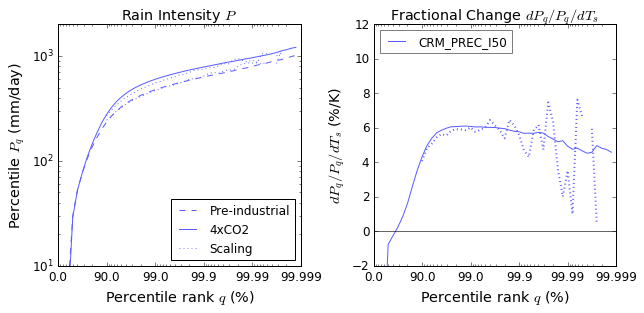

In [281]:
## Define variables
Q_id = "Q_IL"
ts_id = "TS"

subset = subset_all
pr_ids_to_plot = ['CRM_PREC_I50']

pr_sc = pr_sc_omega_T_3
pr_type_name = "scaling_3"
fracChange_pr = fracChange_pr_omega_T
outdir = "OMEGA-CRM-W_T"

## Plot
fig, ((ax1,ax2)) = plt.subplots(ncols=2,nrows=1,figsize=(10,4.5))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(10,2e3)
ax2.set_xscale('log')
ax2.set_ylim(-2,12)

## x-axis 
Q_IL = df_quantile[compsets[0]][experiments[0]][subset][Q_id]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))
Q_slice = slice(24,35)

epsilons = {}
## Plot percentiles vs. ranks for PI and 4xCO2
for experiment in experiments:
        epsilons[experiment] ={}
        df = df_quantile[compset_SPCAM][experiment][subset]
        
        for pr_id in pr_ids_to_plot:

            # Get data
            pr_c_IL = df[pr_id]
            pr_scaled = pr_sc[compset_SPCAM][experiment][subset][pr_id]
            
            # Compute precipitation efficiencies
            def f(epsilon):
                return sqrt(np.nansum(np.square(pr_c_IL[Q_slice] - epsilon*pr_scaled[Q_slice])))
            epsilon_all = minimize(f, 0, method='nelder-mead',
                           options={'xtol': 1e-8, 'disp': False})
            epsilon = epsilon_all['x'][0]
            epsilons[experiment][pr_id] = epsilon
            print "PE for %s %s is"%(pr_id,experiment), epsilon
            
            # Plot 
            ax1.plot(x,pr_c_IL,c=col[pr_id],linestyle=lt[experiment])
            if pr_id == pr_ids[0] and experiment == experiments[1]:
                lab = "%s, scaling"%(compset_labels[compset])
            else:
                lab = None
#             ax1.plot(x,epsilon*pr_scaled,c=col[pr_id],linestyle=':',lw=0.9,label=lab)
            ax1.plot(x,pr_scaled,c=col[pr_id],linestyle=':',lw=0.9,label=lab)

## Plot fractional change per unit temperature
ts1 = df_mean[compset_SPCAM][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compset_SPCAM][experiments[1]][subset][ts_id][0]
dts = ts2-ts1

for pr_id in pr_ids_to_plot:
    
    frC_PE = (epsilons['abrupt4xCO2'][pr_id]/epsilons['piControl'][pr_id] - 1.)/dts*100
    # Compute fractional changes in in epsilon, based on values computed before
    print "Fractional change in PE for %s is"%pr_id, frC_PE
    
#     for pr_type in pr_types:
    for pr_type in ("simulated",pr_type_name):
    
        ## y-axis
        pr_frac_change = fracChange_pr[compset_SPCAM][subset][pr_id][pr_type]
        pr_unit_frac_change = pr_frac_change/dts
        ## plot
        if pr_id == pr_ids[0] and experiment == experiments[1]:
            lab = "%s"%(pr_type)
        else:
            lab = None
        if 'scaling' in pr_type:
            ax2.plot(x,pr_unit_frac_change+frC_PE,c=col[pr_id],linestyle=lt['scaling'],
                    label=lab,lw=lw['scaling'])
        else:
            ax2.plot(x,pr_unit_frac_change,c=col[pr_id],linestyle=lt['simulated'],
                    label=lab,lw=lw['simulated'])
    
## Format x axis on inverse-logarithmic scale
for ax in (ax1,ax2):
        ax.invert_xaxis() # reverse x-axis
        labels = [item.get_text() for item in ax1.get_xticklabels()]
        n = ceil(log10(x.max()))
        N = len(labels)
        for i in range(1,N):
            labels[i] = str(100*(1-10**(-n+i-1)))
            if -n+i-1 == 0:
                break
        ax.set_xticklabels(labels)
    
## Labels and titles
ax1.set_title(r"Rain Intensity $P$")
ax1.set_xlabel(r"Percentile rank $q$ (%)")
ax1.set_ylabel(r"Percentile $P_q$ (mm/day)")
# col_legend = 'k'
col_legend = col[pr_id]
ax1.plot(x,0*x,label="Pre-industrial",c=col_legend,linestyle=lt[experiments[0]])
ax1.plot(x,0*x,label="4xCO2",c=col_legend,linestyle=lt[experiments[1]])
ax1.plot(x,0*x,label="Scaling",c=col_legend,linestyle=':',lw=0.8)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[-3:],labels[-3:],loc="lower right",fontsize=12)
# ax1.legend(loc="lower right")
ax2.axhline(y=0,linestyle='-',c='k',lw=0.6)
ax2.set_title(r"Fractional Change $d P_q/P_q/d T_s$")
ax2.set_xlabel(r"Percentile rank $q$ (%)")
ax2.set_ylabel(r"$d P_q/P_q/d T_s$ (%/K)")
handles, labels = ax2.get_legend_handles_labels()
leg2 = ax2.legend(handles[:2],labels[:2],loc="upper left",fontsize=12)
# leg2 = ax2.legend(loc='upper left',ncol=len(pr_ids_to_plot),handlelength=1.8,columnspacing=0.6)
leg2.get_frame().set_alpha(0.5)
# ax2.legend(loc='upper left')

plt.savefig(os.path.join(figdir,outdir,"fig_percentilesAndFracChange_withScaling_%s_%s.pdf"%(string.join(list(pr_ids_to_plot),'_'),subset)),
            bbox_inches='tight')
plt.show()

Scaling #4 $\omega$, $T$

PE for CRM_PREC_I50 piControl is 2.26453525543
PE for CRM_PREC_I50 abrupt4xCO2 is 0.962064346313
Fractional change in PE for CRM_PREC_I50 is -13.619342421


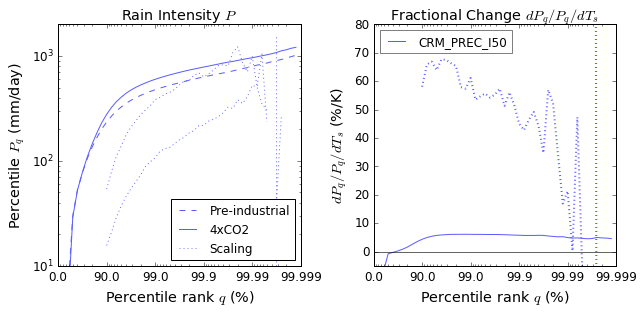

In [121]:
## Define variables
Q_id = "Q_IL"
ts_id = "TS"

subset = subset_all
pr_ids_to_plot = ['CRM_PREC_I50']

pr_sc = pr_sc_omega_T_4
pr_type_name = "scaling_4"
fracChange_pr = fracChange_pr_omega_T
outdir = "OMEGA-CRM-W_CRM-T"

## Plot
fig, ((ax1,ax2)) = plt.subplots(ncols=2,nrows=1,figsize=(10,4.5))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(10,2e3)
ax2.set_xscale('log')
ax2.set_ylim(-5,80)

## x-axis 
Q_IL = df_quantile[compsets[0]][experiments[0]][subset][Q_id]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

epsilons = {}
## Plot percentiles vs. ranks for PI and 4xCO2
for experiment in experiments:
        epsilons[experiment] ={}
        df = df_quantile[compset_SPCAM][experiment][subset]
        
        for pr_id in pr_ids_to_plot:

            # Get data
            pr_c_IL = df[pr_id]
            pr_scaled = pr_sc[compset_SPCAM][experiment][subset][pr_id]
            
            # Compute precipitation efficiencies
            def f(epsilon):
                return sqrt(np.nansum(np.square(pr_c_IL[10:] - epsilon*pr_scaled[10:])))
            epsilon_all = minimize(f, 0, method='nelder-mead',
                           options={'xtol': 1e-8, 'disp': False})
            epsilon = epsilon_all['x'][0]
            epsilons[experiment][pr_id] = epsilon
            print "PE for %s %s is"%(pr_id,experiment), epsilon
            
            # Plot 
            ax1.plot(x,pr_c_IL,c=col[pr_id],linestyle=lt[experiment])
            if pr_id == pr_ids[0] and experiment == experiments[1]:
                lab = "%s, scaling"%(compset_labels[compset])
            else:
                lab = None
#             ax1.plot(x,epsilon*pr_scaled,c=col[pr_id],linestyle=':',lw=0.9,label=lab)
            ax1.plot(x,pr_scaled,c=col[pr_id],linestyle=':',lw=0.9,label=lab)

## Plot fractional change per unit temperature
ts1 = df_mean[compset_SPCAM][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compset_SPCAM][experiments[1]][subset][ts_id][0]
dts = ts2-ts1

for pr_id in pr_ids_to_plot:
    
    # Compute fractional changes in in epsilon, based on values computed before
    print "Fractional change in PE for %s is"%pr_id,
    print (epsilons['abrupt4xCO2'][pr_id]/epsilons['piControl'][pr_id] - 1.)/dts*100
    
#     for pr_type in pr_types:
    for pr_type in ("simulated",pr_type_name):

        if 'scaling' in pr_type:
            lttype = 'scaling'
        else:
            lttype = 'simulated'    
    
        ## y-axis
        pr_frac_change = fracChange_pr[compset_SPCAM][subset][pr_id][pr_type]
        pr_unit_frac_change = pr_frac_change/dts
        ## plot
        if pr_id == pr_ids[0] and experiment == experiments[1]:
            lab = "%s"%(pr_type)
        else:
            lab = None
        ax2.plot(x,pr_unit_frac_change,c=col[pr_id],linestyle=lt[lttype],
                label=lab,lw=lw[lttype])
    
## Format x axis on inverse-logarithmic scale
for ax in (ax1,ax2):
        ax.invert_xaxis() # reverse x-axis
        labels = [item.get_text() for item in ax1.get_xticklabels()]
        n = ceil(log10(x.max()))
        N = len(labels)
        for i in range(1,N):
            labels[i] = str(100*(1-10**(-n+i-1)))
            if -n+i-1 == 0:
                break
        ax.set_xticklabels(labels)
    
## Labels and titles
ax1.set_title(r"Rain Intensity $P$")
ax1.set_xlabel(r"Percentile rank $q$ (%)")
ax1.set_ylabel(r"Percentile $P_q$ (mm/day)")
# col_legend = 'k'
col_legend = col[pr_id]
ax1.plot(x,0*x,label="Pre-industrial",c=col_legend,linestyle=lt[experiments[0]])
ax1.plot(x,0*x,label="4xCO2",c=col_legend,linestyle=lt[experiments[1]])
ax1.plot(x,0*x,label="Scaling",c=col_legend,linestyle=':',lw=0.8)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[-3:],labels[-3:],loc="lower right",fontsize=12)
# ax1.legend(loc="lower right")
ax2.axhline(y=0,linestyle='-',c='k',lw=0.6)
ax2.set_title(r"Fractional Change $d P_q/P_q/d T_s$")
ax2.set_xlabel(r"Percentile rank $q$ (%)")
ax2.set_ylabel(r"$d P_q/P_q/d T_s$ (%/K)")
handles, labels = ax2.get_legend_handles_labels()
leg2 = ax2.legend(handles[:2],labels[:2],loc="upper left",fontsize=12)
# leg2 = ax2.legend(loc='upper left',ncol=len(pr_ids_to_plot),handlelength=1.8,columnspacing=0.6)
leg2.get_frame().set_alpha(0.5)
# ax2.legend(loc='upper left')

plt.savefig(os.path.join(figdir,outdir,"fig_percentilesAndFracChange_withScaling_%s_%s.pdf"%(string.join(list(pr_ids_to_plot),'_'),subset)),
            bbox_inches='tight')
plt.show()


Scaling #5 $\omega$, $T$

PE for CRM_PREC_I50 piControl is 0.369216712952
PE for CRM_PREC_I50 abrupt4xCO2 is -0.111516693115
Fractional change in PE for CRM_PREC_I50 is -30.8311798143


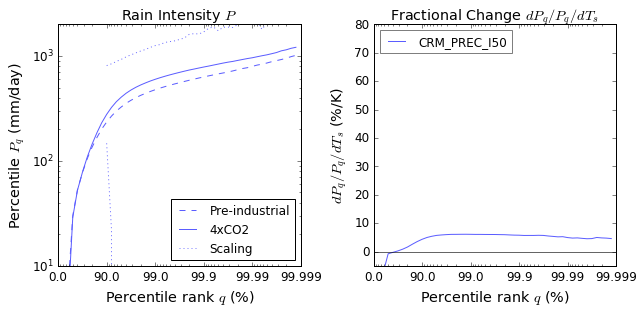

In [122]:
## Define variables
Q_id = "Q_IL"
ts_id = "TS"

subset = subset_all
pr_ids_to_plot = ['CRM_PREC_I50']

pr_sc = pr_sc_omega_T_5
pr_type_name = "scaling_5"
fracChange_pr = fracChange_pr_omega_T
outdir = "OMEGA-CRM-WT_CRM-T"

## Plot
fig, ((ax1,ax2)) = plt.subplots(ncols=2,nrows=1,figsize=(10,4.5))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(10,2e3)
ax2.set_xscale('log')
ax2.set_ylim(-5,80)

## x-axis 
Q_IL = df_quantile[compsets[0]][experiments[0]][subset][Q_id]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

epsilons = {}
## Plot percentiles vs. ranks for PI and 4xCO2
for experiment in experiments:
        epsilons[experiment] ={}
        df = df_quantile[compset_SPCAM][experiment][subset]
        
        for pr_id in pr_ids_to_plot:

            # Get data
            pr_c_IL = df[pr_id]
            pr_scaled = pr_sc[compset_SPCAM][experiment][subset][pr_id]
            
            # Compute precipitation efficiencies
            def f(epsilon):
                return sqrt(np.nansum(np.square(pr_c_IL[10:] - epsilon*pr_scaled[10:])))
            epsilon_all = minimize(f, 0, method='nelder-mead',
                           options={'xtol': 1e-8, 'disp': False})
            epsilon = epsilon_all['x'][0]
            epsilons[experiment][pr_id] = epsilon
            print "PE for %s %s is"%(pr_id,experiment), epsilon
            
            # Plot 
            ax1.plot(x,pr_c_IL,c=col[pr_id],linestyle=lt[experiment])
            if pr_id == pr_ids[0] and experiment == experiments[1]:
                lab = "%s, scaling"%(compset_labels[compset])
            else:
                lab = None
#             ax1.plot(x,epsilon*pr_scaled,c=col[pr_id],linestyle=':',lw=0.9,label=lab)
            ax1.plot(x,pr_scaled,c=col[pr_id],linestyle=':',lw=0.9,label=lab)

## Plot fractional change per unit temperature
ts1 = df_mean[compset_SPCAM][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compset_SPCAM][experiments[1]][subset][ts_id][0]
dts = ts2-ts1

for pr_id in pr_ids_to_plot:
    
    # Compute fractional changes in in epsilon, based on values computed before
    print "Fractional change in PE for %s is"%pr_id,
    print (epsilons['abrupt4xCO2'][pr_id]/epsilons['piControl'][pr_id] - 1.)/dts*100
    
#     for pr_type in pr_types:
    for pr_type in ("simulated",pr_type_name):

        if 'scaling' in pr_type:
            lttype = 'scaling'
        else:
            lttype = 'simulated'    
    
        ## y-axis
        pr_frac_change = fracChange_pr[compset_SPCAM][subset][pr_id][pr_type]
        pr_unit_frac_change = pr_frac_change/dts
        ## plot
        if pr_id == pr_ids[0] and experiment == experiments[1]:
            lab = "%s"%(pr_type)
        else:
            lab = None
        ax2.plot(x,pr_unit_frac_change,c=col[pr_id],linestyle=lt[lttype],
                label=lab,lw=lw[lttype])
    
## Format x axis on inverse-logarithmic scale
for ax in (ax1,ax2):
        ax.invert_xaxis() # reverse x-axis
        labels = [item.get_text() for item in ax1.get_xticklabels()]
        n = ceil(log10(x.max()))
        N = len(labels)
        for i in range(1,N):
            labels[i] = str(100*(1-10**(-n+i-1)))
            if -n+i-1 == 0:
                break
        ax.set_xticklabels(labels)
    
## Labels and titles
ax1.set_title(r"Rain Intensity $P$")
ax1.set_xlabel(r"Percentile rank $q$ (%)")
ax1.set_ylabel(r"Percentile $P_q$ (mm/day)")
# col_legend = 'k'
col_legend = col[pr_id]
ax1.plot(x,0*x,label="Pre-industrial",c=col_legend,linestyle=lt[experiments[0]])
ax1.plot(x,0*x,label="4xCO2",c=col_legend,linestyle=lt[experiments[1]])
ax1.plot(x,0*x,label="Scaling",c=col_legend,linestyle=':',lw=0.8)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[-3:],labels[-3:],loc="lower right",fontsize=12)
# ax1.legend(loc="lower right")
ax2.axhline(y=0,linestyle='-',c='k',lw=0.6)
ax2.set_title(r"Fractional Change $d P_q/P_q/d T_s$")
ax2.set_xlabel(r"Percentile rank $q$ (%)")
ax2.set_ylabel(r"$d P_q/P_q/d T_s$ (%/K)")
handles, labels = ax2.get_legend_handles_labels()
leg2 = ax2.legend(handles[:2],labels[:2],loc="upper left",fontsize=12)
# leg2 = ax2.legend(loc='upper left',ncol=len(pr_ids_to_plot),handlelength=1.8,columnspacing=0.6)
leg2.get_frame().set_alpha(0.5)
# ax2.legend(loc='upper left')

plt.savefig(os.path.join(figdir,outdir,"fig_percentilesAndFracChange_withScaling_%s_%s.pdf"%(string.join(list(pr_ids_to_plot),'_'),subset)),
            bbox_inches='tight')
plt.show()

Scaling #6 $\omega$, $T$

PE for CRM_PREC_I50 piControl is 0.266334625244
PE for CRM_PREC_I50 abrupt4xCO2 is -0.079336769104
Fractional change in PE for CRM_PREC_I50 is -30.7328618511


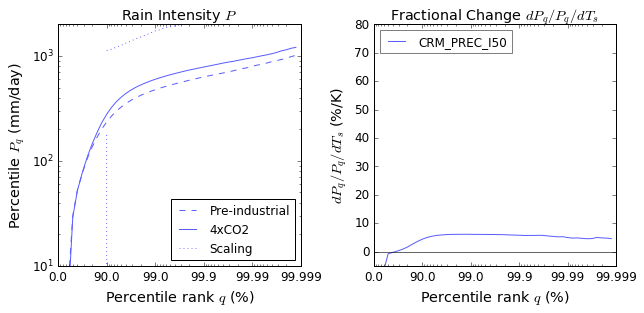

In [123]:
## Define variables
Q_id = "Q_IL"
ts_id = "TS"

subset = subset_all
pr_ids_to_plot = ['CRM_PREC_I50']

pr_sc = pr_sc_omega_T_6
pr_type_name = "scaling_6"
fracChange_pr = fracChange_pr_omega_T
outdir = "CRM-OMEGA_CRM-T"

## Plot
fig, ((ax1,ax2)) = plt.subplots(ncols=2,nrows=1,figsize=(10,4.5))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(10,2e3)
ax2.set_xscale('log')
ax2.set_ylim(-5,80)

## x-axis 
Q_IL = df_quantile[compsets[0]][experiments[0]][subset][Q_id]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

epsilons = {}
## Plot percentiles vs. ranks for PI and 4xCO2
for experiment in experiments:
        epsilons[experiment] ={}
        df = df_quantile[compset_SPCAM][experiment][subset]
        
        for pr_id in pr_ids_to_plot:

            # Get data
            pr_c_IL = df[pr_id]
            pr_scaled = pr_sc[compset_SPCAM][experiment][subset][pr_id]
            
            # Compute precipitation efficiencies
            def f(epsilon):
                return sqrt(np.nansum(np.square(pr_c_IL[10:] - epsilon*pr_scaled[10:])))
            epsilon_all = minimize(f, 0, method='nelder-mead',
                           options={'xtol': 1e-8, 'disp': False})
            epsilon = epsilon_all['x'][0]
            epsilons[experiment][pr_id] = epsilon
            print "PE for %s %s is"%(pr_id,experiment), epsilon
            
            # Plot 
            ax1.plot(x,pr_c_IL,c=col[pr_id],linestyle=lt[experiment])
            if pr_id == pr_ids[0] and experiment == experiments[1]:
                lab = "%s, scaling"%(compset_labels[compset])
            else:
                lab = None
#             ax1.plot(x,epsilon*pr_scaled,c=col[pr_id],linestyle=':',lw=0.9,label=lab)
            ax1.plot(x,pr_scaled,c=col[pr_id],linestyle=':',lw=0.9,label=lab)

## Plot fractional change per unit temperature
ts1 = df_mean[compset_SPCAM][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compset_SPCAM][experiments[1]][subset][ts_id][0]
dts = ts2-ts1

for pr_id in pr_ids_to_plot:
    
    # Compute fractional changes in in epsilon, based on values computed before
    print "Fractional change in PE for %s is"%pr_id,
    print (epsilons['abrupt4xCO2'][pr_id]/epsilons['piControl'][pr_id] - 1.)/dts*100
    
#     for pr_type in pr_types:
    for pr_type in ("simulated",pr_type_name):

        if 'scaling' in pr_type:
            lttype = 'scaling'
        else:
            lttype = 'simulated'    
    
        ## y-axis
        pr_frac_change = fracChange_pr[compset_SPCAM][subset][pr_id][pr_type]
        pr_unit_frac_change = pr_frac_change/dts
        ## plot
        if pr_id == pr_ids[0] and experiment == experiments[1]:
            lab = "%s"%(pr_type)
        else:
            lab = None
        ax2.plot(x,pr_unit_frac_change,c=col[pr_id],linestyle=lt[lttype],
                label=lab,lw=lw[lttype])
    
## Format x axis on inverse-logarithmic scale
for ax in (ax1,ax2):
        ax.invert_xaxis() # reverse x-axis
        labels = [item.get_text() for item in ax1.get_xticklabels()]
        n = ceil(log10(x.max()))
        N = len(labels)
        for i in range(1,N):
            labels[i] = str(100*(1-10**(-n+i-1)))
            if -n+i-1 == 0:
                break
        ax.set_xticklabels(labels)
    
## Labels and titles
ax1.set_title(r"Rain Intensity $P$")
ax1.set_xlabel(r"Percentile rank $q$ (%)")
ax1.set_ylabel(r"Percentile $P_q$ (mm/day)")
# col_legend = 'k'
col_legend = col[pr_id]
ax1.plot(x,0*x,label="Pre-industrial",c=col_legend,linestyle=lt[experiments[0]])
ax1.plot(x,0*x,label="4xCO2",c=col_legend,linestyle=lt[experiments[1]])
ax1.plot(x,0*x,label="Scaling",c=col_legend,linestyle=':',lw=0.8)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[-3:],labels[-3:],loc="lower right",fontsize=12)
# ax1.legend(loc="lower right")
ax2.axhline(y=0,linestyle='-',c='k',lw=0.6)
ax2.set_title(r"Fractional Change $d P_q/P_q/d T_s$")
ax2.set_xlabel(r"Percentile rank $q$ (%)")
ax2.set_ylabel(r"$d P_q/P_q/d T_s$ (%/K)")
handles, labels = ax2.get_legend_handles_labels()
leg2 = ax2.legend(handles[:2],labels[:2],loc="upper left",fontsize=12)
# leg2 = ax2.legend(loc='upper left',ncol=len(pr_ids_to_plot),handlelength=1.8,columnspacing=0.6)
leg2.get_frame().set_alpha(0.5)
# ax2.legend(loc='upper left')

plt.savefig(os.path.join(figdir,outdir,"fig_percentilesAndFracChange_withScaling_%s_%s.pdf"%(string.join(list(pr_ids_to_plot),'_'),subset)),
            bbox_inches='tight')
plt.show()


Scaling #7 $\omega$, $T$

PE for CRM_PREC_I50 piControl is 0.358867172241
PE for CRM_PREC_I50 abrupt4xCO2 is -0.109639350891
Fractional change in PE for CRM_PREC_I50 is -30.9135658185


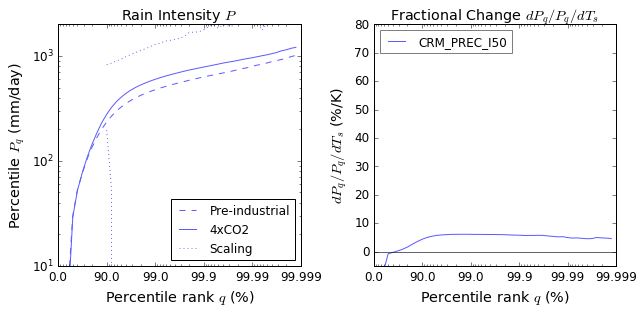

In [124]:
## Define variables
Q_id = "Q_IL"
ts_id = "TS"

subset = subset_all
pr_ids_to_plot = ['CRM_PREC_I50']

pr_sc = pr_sc_omega_T_7
pr_type_name = "scaling_7"
fracChange_pr = fracChange_pr_omega_T
outdir = "CRM-OMEGA-WT_CRM-T"

## Plot
fig, ((ax1,ax2)) = plt.subplots(ncols=2,nrows=1,figsize=(10,4.5))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(10,2e3)
ax2.set_xscale('log')
ax2.set_ylim(-5,80)

## x-axis 
Q_IL = df_quantile[compsets[0]][experiments[0]][subset][Q_id]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

epsilons = {}
## Plot percentiles vs. ranks for PI and 4xCO2
for experiment in experiments:
        epsilons[experiment] ={}
        df = df_quantile[compset_SPCAM][experiment][subset]
        
        for pr_id in pr_ids_to_plot:

            # Get data
            pr_c_IL = df[pr_id]
            pr_scaled = pr_sc[compset_SPCAM][experiment][subset][pr_id]
            
            # Compute precipitation efficiencies
            def f(epsilon):
                return sqrt(np.nansum(np.square(pr_c_IL[10:] - epsilon*pr_scaled[10:])))
            epsilon_all = minimize(f, 0, method='nelder-mead',
                           options={'xtol': 1e-8, 'disp': False})
            epsilon = epsilon_all['x'][0]
            epsilons[experiment][pr_id] = epsilon
            print "PE for %s %s is"%(pr_id,experiment), epsilon
            
            # Plot 
            ax1.plot(x,pr_c_IL,c=col[pr_id],linestyle=lt[experiment])
            if pr_id == pr_ids[0] and experiment == experiments[1]:
                lab = "%s, scaling"%(compset_labels[compset])
            else:
                lab = None
#             ax1.plot(x,epsilon*pr_scaled,c=col[pr_id],linestyle=':',lw=0.9,label=lab)
            ax1.plot(x,pr_scaled,c=col[pr_id],linestyle=':',lw=0.9,label=lab)

## Plot fractional change per unit temperature
ts1 = df_mean[compset_SPCAM][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compset_SPCAM][experiments[1]][subset][ts_id][0]
dts = ts2-ts1

for pr_id in pr_ids_to_plot:
    
    # Compute fractional changes in in epsilon, based on values computed before
    print "Fractional change in PE for %s is"%pr_id,
    print (epsilons['abrupt4xCO2'][pr_id]/epsilons['piControl'][pr_id] - 1.)/dts*100
    
#     for pr_type in pr_types:
    for pr_type in ("simulated",pr_type_name):

        if 'scaling' in pr_type:
            lttype = 'scaling'
        else:
            lttype = 'simulated'    
    
        ## y-axis
        pr_frac_change = fracChange_pr[compset_SPCAM][subset][pr_id][pr_type]
        pr_unit_frac_change = pr_frac_change/dts
        ## plot
        if pr_id == pr_ids[0] and experiment == experiments[1]:
            lab = "%s"%(pr_type)
        else:
            lab = None
        ax2.plot(x,pr_unit_frac_change,c=col[pr_id],linestyle=lt[lttype],
                label=lab,lw=lw[lttype])
    
## Format x axis on inverse-logarithmic scale
for ax in (ax1,ax2):
        ax.invert_xaxis() # reverse x-axis
        labels = [item.get_text() for item in ax1.get_xticklabels()]
        n = ceil(log10(x.max()))
        N = len(labels)
        for i in range(1,N):
            labels[i] = str(100*(1-10**(-n+i-1)))
            if -n+i-1 == 0:
                break
        ax.set_xticklabels(labels)
    
## Labels and titles
ax1.set_title(r"Rain Intensity $P$")
ax1.set_xlabel(r"Percentile rank $q$ (%)")
ax1.set_ylabel(r"Percentile $P_q$ (mm/day)")
# col_legend = 'k'
col_legend = col[pr_id]
ax1.plot(x,0*x,label="Pre-industrial",c=col_legend,linestyle=lt[experiments[0]])
ax1.plot(x,0*x,label="4xCO2",c=col_legend,linestyle=lt[experiments[1]])
ax1.plot(x,0*x,label="Scaling",c=col_legend,linestyle=':',lw=0.8)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[-3:],labels[-3:],loc="lower right",fontsize=12)
# ax1.legend(loc="lower right")
ax2.axhline(y=0,linestyle='-',c='k',lw=0.6)
ax2.set_title(r"Fractional Change $d P_q/P_q/d T_s$")
ax2.set_xlabel(r"Percentile rank $q$ (%)")
ax2.set_ylabel(r"$d P_q/P_q/d T_s$ (%/K)")
handles, labels = ax2.get_legend_handles_labels()
leg2 = ax2.legend(handles[:2],labels[:2],loc="upper left",fontsize=12)
# leg2 = ax2.legend(loc='upper left',ncol=len(pr_ids_to_plot),handlelength=1.8,columnspacing=0.6)
leg2.get_frame().set_alpha(0.5)
# ax2.legend(loc='upper left')

plt.savefig(os.path.join(figdir,outdir,"fig_percentilesAndFracChange_withScaling_%s_%s.pdf"%(string.join(list(pr_ids_to_plot),'_'),subset)),
            bbox_inches='tight')
plt.show()


Scaling #8 $\omega$, $T$

PE for CRM_PREC_I50 piControl is 6.46221722412
PE for CRM_PREC_I50 abrupt4xCO2 is 3.0929758606
Fractional change in PE for CRM_PREC_I50 is -12.3457581439


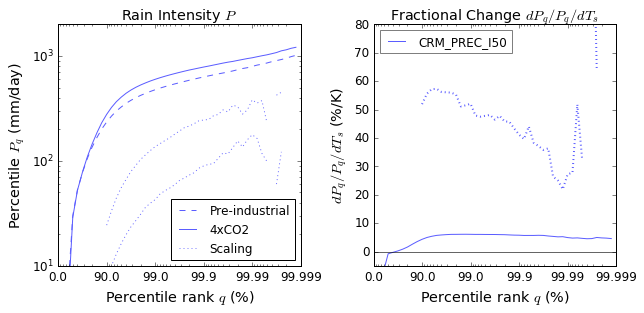

In [260]:
## Define variables
Q_id = "Q_IL"
ts_id = "TS"

subset = subset_all
pr_ids_to_plot = ['CRM_PREC_I50']

pr_sc = pr_sc_omega_T_8
pr_type_name = "scaling_8"
fracChange_pr = fracChange_pr_omega_T
outdir = "CRM-OMEGA_T"

## Plot
fig, ((ax1,ax2)) = plt.subplots(ncols=2,nrows=1,figsize=(10,4.5))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(10,2e3)
ax2.set_xscale('log')
ax2.set_ylim(-5,80)

## x-axis 
Q_IL = df_quantile[compsets[0]][experiments[0]][subset][Q_id]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

epsilons = {}
## Plot percentiles vs. ranks for PI and 4xCO2
for experiment in experiments:
        epsilons[experiment] ={}
        df = df_quantile[compset_SPCAM][experiment][subset]
        
        for pr_id in pr_ids_to_plot:

            # Get data
            pr_c_IL = df[pr_id]
            pr_scaled = pr_sc[compset_SPCAM][experiment][subset][pr_id]
            
            # Compute precipitation efficiencies
            def f(epsilon):
                return sqrt(np.nansum(np.square(pr_c_IL[10:] - epsilon*pr_scaled[10:])))
            epsilon_all = minimize(f, 0, method='nelder-mead',
                           options={'xtol': 1e-8, 'disp': False})
            epsilon = epsilon_all['x'][0]
            epsilons[experiment][pr_id] = epsilon
            print "PE for %s %s is"%(pr_id,experiment), epsilon
            
            # Plot 
            ax1.plot(x,pr_c_IL,c=col[pr_id],linestyle=lt[experiment])
            if pr_id == pr_ids[0] and experiment == experiments[1]:
                lab = "%s, scaling"%(compset_labels[compset])
            else:
                lab = None
#             ax1.plot(x,epsilon*pr_scaled,c=col[pr_id],linestyle=':',lw=0.9,label=lab)
            ax1.plot(x,pr_scaled,c=col[pr_id],linestyle=':',lw=0.9,label=lab)

## Plot fractional change per unit temperature
ts1 = df_mean[compset_SPCAM][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compset_SPCAM][experiments[1]][subset][ts_id][0]
dts = ts2-ts1

for pr_id in pr_ids_to_plot:
    
    # Compute fractional changes in in epsilon, based on values computed before
    print "Fractional change in PE for %s is"%pr_id,
    print (epsilons['abrupt4xCO2'][pr_id]/epsilons['piControl'][pr_id] - 1.)/dts*100
    
#     for pr_type in pr_types:
    for pr_type in ("simulated",pr_type_name):

        if 'scaling' in pr_type:
            lttype = 'scaling'
        else:
            lttype = 'simulated'    
    
        ## y-axis
        pr_frac_change = fracChange_pr[compset_SPCAM][subset][pr_id][pr_type]
        pr_unit_frac_change = pr_frac_change/dts
        ## plot
        if pr_id == pr_ids[0] and experiment == experiments[1]:
            lab = "%s"%(pr_type)
        else:
            lab = None
        ax2.plot(x,pr_unit_frac_change,c=col[pr_id],linestyle=lt[lttype],
                label=lab,lw=lw[lttype])
    
## Format x axis on inverse-logarithmic scale
for ax in (ax1,ax2):
        ax.invert_xaxis() # reverse x-axis
        labels = [item.get_text() for item in ax1.get_xticklabels()]
        n = ceil(log10(x.max()))
        N = len(labels)
        for i in range(1,N):
            labels[i] = str(100*(1-10**(-n+i-1)))
            if -n+i-1 == 0:
                break
        ax.set_xticklabels(labels)
    
## Labels and titles
ax1.set_title(r"Rain Intensity $P$")
ax1.set_xlabel(r"Percentile rank $q$ (%)")
ax1.set_ylabel(r"Percentile $P_q$ (mm/day)")
# col_legend = 'k'
col_legend = col[pr_id]
ax1.plot(x,0*x,label="Pre-industrial",c=col_legend,linestyle=lt[experiments[0]])
ax1.plot(x,0*x,label="4xCO2",c=col_legend,linestyle=lt[experiments[1]])
ax1.plot(x,0*x,label="Scaling",c=col_legend,linestyle=':',lw=0.8)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[-3:],labels[-3:],loc="lower right",fontsize=12)
# ax1.legend(loc="lower right")
ax2.axhline(y=0,linestyle='-',c='k',lw=0.6)
ax2.set_title(r"Fractional Change $d P_q/P_q/d T_s$")
ax2.set_xlabel(r"Percentile rank $q$ (%)")
ax2.set_ylabel(r"$d P_q/P_q/d T_s$ (%/K)")
handles, labels = ax2.get_legend_handles_labels()
leg2 = ax2.legend(handles[:2],labels[:2],loc="upper left",fontsize=12)
# leg2 = ax2.legend(loc='upper left',ncol=len(pr_ids_to_plot),handlelength=1.8,columnspacing=0.6)
leg2.get_frame().set_alpha(0.5)
# ax2.legend(loc='upper left')

plt.savefig(os.path.join(figdir,outdir,"fig_percentilesAndFracChange_withScaling_%s_%s.pdf"%(string.join(list(pr_ids_to_plot),'_'),subset)),
            bbox_inches='tight')
plt.show()


### Scalings using percentile mean $\rho$, $w$ and $T$

Scaling #3 $\rho$, $w$, $T$

PE for CRM_PREC_I50 piControl is 0.878642082214
PE for CRM_PREC_I50 abrupt4xCO2 is 1.02830831909
Fractional change in PE for CRM_PREC_I50 is 4.03347187369


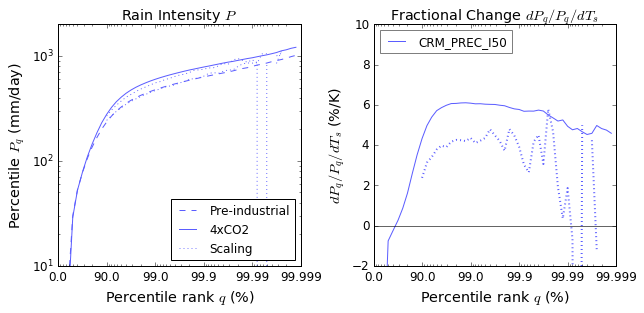

In [129]:
## Define variables
Q_id = "Q_IL"
ts_id = "TS"

subset = subset_all
pr_ids_to_plot = ['CRM_PREC_I50']

pr_sc = pr_sc_rho_w_T_3
pr_type_name = "scaling_3"
fracChange_pr = fracChange_pr_rho_w_T
outdir = "RHO-MESO_CRM-W_T"

## Plot
fig, ((ax1,ax2)) = plt.subplots(ncols=2,nrows=1,figsize=(10,4.5))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(10,2e3)
ax2.set_xscale('log')
ax2.set_ylim(-2,10)

## x-axis 
Q_IL = df_quantile[compsets[0]][experiments[0]][subset][Q_id]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

epsilons = {}
## Plot percentiles vs. ranks for PI and 4xCO2
for experiment in experiments:
        epsilons[experiment] ={}
        df = df_quantile[compset_SPCAM][experiment][subset]
        
        for pr_id in pr_ids_to_plot:

            # Get data
            pr_c_IL = df[pr_id]
            pr_scaled = pr_sc[compset_SPCAM][experiment][subset][pr_id]
            
            # Compute precipitation efficiencies
            def f(epsilon):
                return sqrt(np.nansum(np.square(pr_c_IL[10:] - epsilon*pr_scaled[10:])))
            epsilon_all = minimize(f, 0, method='nelder-mead',
                           options={'xtol': 1e-8, 'disp': False})
            epsilon = epsilon_all['x'][0]
            epsilons[experiment][pr_id] = epsilon
            print "PE for %s %s is"%(pr_id,experiment), epsilon
            
            # Plot 
            ax1.plot(x,pr_c_IL,c=col[pr_id],linestyle=lt[experiment])
            if pr_id == pr_ids[0] and experiment == experiments[1]:
                lab = "%s, scaling"%(compset_labels[compset])
            else:
                lab = None
#             ax1.plot(x,epsilon*pr_scaled,c=col[pr_id],linestyle=':',lw=0.9,label=lab)
            ax1.plot(x,pr_scaled,c=col[pr_id],linestyle=':',lw=0.9,label=lab)

## Plot fractional change per unit temperature
ts1 = df_mean[compset_SPCAM][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compset_SPCAM][experiments[1]][subset][ts_id][0]
dts = ts2-ts1

for pr_id in pr_ids_to_plot:
    
    # Compute fractional changes in in epsilon, based on values computed before
    print "Fractional change in PE for %s is"%pr_id,
    print (epsilons['abrupt4xCO2'][pr_id]/epsilons['piControl'][pr_id] - 1.)/dts*100
    
#     for pr_type in pr_types:
    for pr_type in ("simulated",pr_type_name):

        if 'scaling' in pr_type:
            lttype = 'scaling'
        else:
            lttype = 'simulated'    
    
        ## y-axis
        pr_frac_change = fracChange_pr[compset_SPCAM][subset][pr_id][pr_type]
        pr_unit_frac_change = pr_frac_change/dts
        ## plot
        if pr_id == pr_ids[0] and experiment == experiments[1]:
            lab = "%s"%(pr_type)
        else:
            lab = None
        ax2.plot(x,pr_unit_frac_change,c=col[pr_id],linestyle=lt[lttype],
                label=lab,lw=lw[lttype])
    
## Format x axis on inverse-logarithmic scale
for ax in (ax1,ax2):
        ax.invert_xaxis() # reverse x-axis
        labels = [item.get_text() for item in ax1.get_xticklabels()]
        n = ceil(log10(x.max()))
        N = len(labels)
        for i in range(1,N):
            labels[i] = str(100*(1-10**(-n+i-1)))
            if -n+i-1 == 0:
                break
        ax.set_xticklabels(labels)
    
## Labels and titles
ax1.set_title(r"Rain Intensity $P$")
ax1.set_xlabel(r"Percentile rank $q$ (%)")
ax1.set_ylabel(r"Percentile $P_q$ (mm/day)")
# col_legend = 'k'
col_legend = col[pr_id]
ax1.plot(x,0*x,label="Pre-industrial",c=col_legend,linestyle=lt[experiments[0]])
ax1.plot(x,0*x,label="4xCO2",c=col_legend,linestyle=lt[experiments[1]])
ax1.plot(x,0*x,label="Scaling",c=col_legend,linestyle=':',lw=0.8)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[-3:],labels[-3:],loc="lower right",fontsize=12)
# ax1.legend(loc="lower right")
ax2.axhline(y=0,linestyle='-',c='k',lw=0.6)
ax2.set_title(r"Fractional Change $d P_q/P_q/d T_s$")
ax2.set_xlabel(r"Percentile rank $q$ (%)")
ax2.set_ylabel(r"$d P_q/P_q/d T_s$ (%/K)")
handles, labels = ax2.get_legend_handles_labels()
leg2 = ax2.legend(handles[:2],labels[:2],loc="upper left",fontsize=12)
# leg2 = ax2.legend(loc='upper left',ncol=len(pr_ids_to_plot),handlelength=1.8,columnspacing=0.6)
leg2.get_frame().set_alpha(0.5)
# ax2.legend(loc='upper left')

plt.savefig(os.path.join(figdir,outdir,"fig_percentilesAndFracChange_withScaling_%s_%s.pdf"%(string.join(list(pr_ids_to_plot),'_'),subset)),
            bbox_inches='tight')
plt.show()

### Scalings using percentile mean $w$, $T$, $q$, $p_s$

Scaling #3 $w$, $T$, $q$, $p_s$

PE for CRM_PREC_I50 piControl is 0.87866860199
PE for CRM_PREC_I50 abrupt4xCO2 is 1.02833110046
Fractional change in PE for CRM_PREC_I50 is 4.03324939026


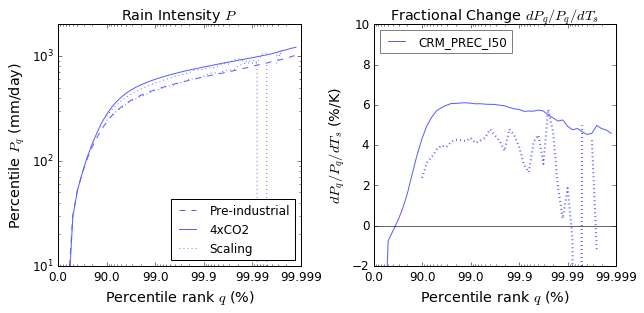

In [261]:
## Define variables
Q_id = "Q_IL"
ts_id = "TS"

subset = subset_all
pr_ids_to_plot = ['CRM_PREC_I50']

pr_sc = pr_sc_w_T_Q_ps_3
pr_type_name = "scaling_3"
fracChange_pr = fracChange_pr_w_T_Q_ps
outdir = "T_CRM-W_T"

## Plot
fig, ((ax1,ax2)) = plt.subplots(ncols=2,nrows=1,figsize=(10,4.5))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(10,2e3)
ax2.set_xscale('log')
ax2.set_ylim(-2,10)

## x-axis 
Q_IL = df_quantile[compsets[0]][experiments[0]][subset][Q_id]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

epsilons = {}
## Plot percentiles vs. ranks for PI and 4xCO2
for experiment in experiments:
        epsilons[experiment] ={}
        df = df_quantile[compset_SPCAM][experiment][subset]
        
        for pr_id in pr_ids_to_plot:

            # Get data
            pr_c_IL = df[pr_id]
            pr_scaled = pr_sc[compset_SPCAM][experiment][subset][pr_id]
            
            # Compute precipitation efficiencies
            def f(epsilon):
                return sqrt(np.nansum(np.square(pr_c_IL[10:] - epsilon*pr_scaled[10:])))
            epsilon_all = minimize(f, 0, method='nelder-mead',
                           options={'xtol': 1e-8, 'disp': False})
            epsilon = epsilon_all['x'][0]
            epsilons[experiment][pr_id] = epsilon
            print "PE for %s %s is"%(pr_id,experiment), epsilon
            
            # Plot 
            ax1.plot(x,pr_c_IL,c=col[pr_id],linestyle=lt[experiment])
            if pr_id == pr_ids[0] and experiment == experiments[1]:
                lab = "%s, scaling"%(compset_labels[compset])
            else:
                lab = None
#             ax1.plot(x,epsilon*pr_scaled,c=col[pr_id],linestyle=':',lw=0.9,label=lab)
            ax1.plot(x,pr_scaled,c=col[pr_id],linestyle=':',lw=0.9,label=lab)

## Plot fractional change per unit temperature
ts1 = df_mean[compset_SPCAM][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compset_SPCAM][experiments[1]][subset][ts_id][0]
dts = ts2-ts1

for pr_id in pr_ids_to_plot:
    
    # Compute fractional changes in in epsilon, based on values computed before
    print "Fractional change in PE for %s is"%pr_id,
    print (epsilons['abrupt4xCO2'][pr_id]/epsilons['piControl'][pr_id] - 1.)/dts*100
    
#     for pr_type in pr_types:
    for pr_type in ("simulated",pr_type_name):

        if 'scaling' in pr_type:
            lttype = 'scaling'
        else:
            lttype = 'simulated'    
    
        ## y-axis
        pr_frac_change = fracChange_pr[compset_SPCAM][subset][pr_id][pr_type]
        pr_unit_frac_change = pr_frac_change/dts
        ## plot
        if pr_id == pr_ids[0] and experiment == experiments[1]:
            lab = "%s"%(pr_type)
        else:
            lab = None
        ax2.plot(x,pr_unit_frac_change,c=col[pr_id],linestyle=lt[lttype],
                label=lab,lw=lw[lttype])
    
## Format x axis on inverse-logarithmic scale
for ax in (ax1,ax2):
        ax.invert_xaxis() # reverse x-axis
        labels = [item.get_text() for item in ax1.get_xticklabels()]
        n = ceil(log10(x.max()))
        N = len(labels)
        for i in range(1,N):
            labels[i] = str(100*(1-10**(-n+i-1)))
            if -n+i-1 == 0:
                break
        ax.set_xticklabels(labels)
    
## Labels and titles
ax1.set_title(r"Rain Intensity $P$")
ax1.set_xlabel(r"Percentile rank $q$ (%)")
ax1.set_ylabel(r"Percentile $P_q$ (mm/day)")
# col_legend = 'k'
col_legend = col[pr_id]
ax1.plot(x,0*x,label="Pre-industrial",c=col_legend,linestyle=lt[experiments[0]])
ax1.plot(x,0*x,label="4xCO2",c=col_legend,linestyle=lt[experiments[1]])
ax1.plot(x,0*x,label="Scaling",c=col_legend,linestyle=':',lw=0.8)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[-3:],labels[-3:],loc="lower right",fontsize=12)
# ax1.legend(loc="lower right")
ax2.axhline(y=0,linestyle='-',c='k',lw=0.6)
ax2.set_title(r"Fractional Change $d P_q/P_q/d T_s$")
ax2.set_xlabel(r"Percentile rank $q$ (%)")
ax2.set_ylabel(r"$d P_q/P_q/d T_s$ (%/K)")
handles, labels = ax2.get_legend_handles_labels()
leg2 = ax2.legend(handles[:2],labels[:2],loc="upper left",fontsize=12)
# leg2 = ax2.legend(loc='upper left',ncol=len(pr_ids_to_plot),handlelength=1.8,columnspacing=0.6)
leg2.get_frame().set_alpha(0.5)
# ax2.legend(loc='upper left')

plt.savefig(os.path.join(figdir,outdir,"fig_percentilesAndFracChange_withScaling_%s_%s.pdf"%(string.join(list(pr_ids_to_plot),'_'),subset)),
            bbox_inches='tight')
plt.show()

Scaling #5 $w$, $T$, $q$, $p_s$

PE for CRM_PREC_I50 piControl is 2.26718762207
PE for CRM_PREC_I50 abrupt4xCO2 is 0.963750236511
Fractional change in PE for CRM_PREC_I50 is -13.6135034285


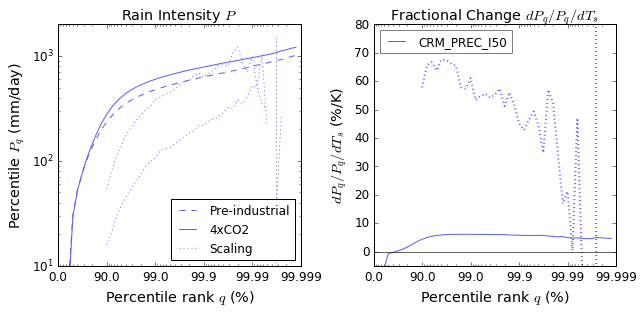

In [153]:
## Define variables
Q_id = "Q_IL"
ts_id = "TS"

subset = subset_all
pr_ids_to_plot = ['CRM_PREC_I50']

pr_sc = pr_sc_w_T_Q_ps_5
pr_type_name = "scaling_5"
fracChange_pr = fracChange_pr_w_T_Q_ps
outdir = "CRM-T_CRM-W_CRM-T"

## Plot
fig, ((ax1,ax2)) = plt.subplots(ncols=2,nrows=1,figsize=(10,4.5))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(10,2e3)
ax2.set_xscale('log')
ax2.set_ylim(-5,80)

## x-axis 
Q_IL = df_quantile[compsets[0]][experiments[0]][subset][Q_id]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

epsilons = {}
## Plot percentiles vs. ranks for PI and 4xCO2
for experiment in experiments:
        epsilons[experiment] ={}
        df = df_quantile[compset_SPCAM][experiment][subset]
        
        for pr_id in pr_ids_to_plot:

            # Get data
            pr_c_IL = df[pr_id]
            pr_scaled = pr_sc[compset_SPCAM][experiment][subset][pr_id]
            
            # Compute precipitation efficiencies
            def f(epsilon):
                return sqrt(np.nansum(np.square(pr_c_IL[10:] - epsilon*pr_scaled[10:])))
            epsilon_all = minimize(f, 0, method='nelder-mead',
                           options={'xtol': 1e-8, 'disp': False})
            epsilon = epsilon_all['x'][0]
            epsilons[experiment][pr_id] = epsilon
            print "PE for %s %s is"%(pr_id,experiment), epsilon
            
            # Plot 
            ax1.plot(x,pr_c_IL,c=col[pr_id],linestyle=lt[experiment])
            if pr_id == pr_ids[0] and experiment == experiments[1]:
                lab = "%s, scaling"%(compset_labels[compset])
            else:
                lab = None
#             ax1.plot(x,epsilon*pr_scaled,c=col[pr_id],linestyle=':',lw=0.9,label=lab)
            ax1.plot(x,pr_scaled,c=col[pr_id],linestyle=':',lw=0.9,label=lab)

## Plot fractional change per unit temperature
ts1 = df_mean[compset_SPCAM][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compset_SPCAM][experiments[1]][subset][ts_id][0]
dts = ts2-ts1

for pr_id in pr_ids_to_plot:
    
    # Compute fractional changes in in epsilon, based on values computed before
    print "Fractional change in PE for %s is"%pr_id,
    print (epsilons['abrupt4xCO2'][pr_id]/epsilons['piControl'][pr_id] - 1.)/dts*100
    
#     for pr_type in pr_types:
    for pr_type in ("simulated",pr_type_name):

        if 'scaling' in pr_type:
            lttype = 'scaling'
        else:
            lttype = 'simulated'    
    
        ## y-axis
        pr_frac_change = fracChange_pr[compset_SPCAM][subset][pr_id][pr_type]
        pr_unit_frac_change = pr_frac_change/dts
        ## plot
        if pr_id == pr_ids[0] and experiment == experiments[1]:
            lab = "%s"%(pr_type)
        else:
            lab = None
        ax2.plot(x,pr_unit_frac_change,c=col[pr_id],linestyle=lt[lttype],
                label=lab,lw=lw[lttype])
    
## Format x axis on inverse-logarithmic scale
for ax in (ax1,ax2):
        ax.invert_xaxis() # reverse x-axis
        labels = [item.get_text() for item in ax1.get_xticklabels()]
        n = ceil(log10(x.max()))
        N = len(labels)
        for i in range(1,N):
            labels[i] = str(100*(1-10**(-n+i-1)))
            if -n+i-1 == 0:
                break
        ax.set_xticklabels(labels)
    
## Labels and titles
ax1.set_title(r"Rain Intensity $P$")
ax1.set_xlabel(r"Percentile rank $q$ (%)")
ax1.set_ylabel(r"Percentile $P_q$ (mm/day)")
# col_legend = 'k'
col_legend = col[pr_id]
ax1.plot(x,0*x,label="Pre-industrial",c=col_legend,linestyle=lt[experiments[0]])
ax1.plot(x,0*x,label="4xCO2",c=col_legend,linestyle=lt[experiments[1]])
ax1.plot(x,0*x,label="Scaling",c=col_legend,linestyle=':',lw=0.8)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[-3:],labels[-3:],loc="lower right",fontsize=12)
# ax1.legend(loc="lower right")
ax2.axhline(y=0,linestyle='-',c='k',lw=0.6)
ax2.set_title(r"Fractional Change $d P_q/P_q/d T_s$")
ax2.set_xlabel(r"Percentile rank $q$ (%)")
ax2.set_ylabel(r"$d P_q/P_q/d T_s$ (%/K)")
handles, labels = ax2.get_legend_handles_labels()
leg2 = ax2.legend(handles[:2],labels[:2],loc="upper left",fontsize=12)
# leg2 = ax2.legend(loc='upper left',ncol=len(pr_ids_to_plot),handlelength=1.8,columnspacing=0.6)
leg2.get_frame().set_alpha(0.5)
# ax2.legend(loc='upper left')

plt.savefig(os.path.join(figdir,outdir,"fig_percentilesAndFracChange_withScaling_%s_%s.pdf"%(string.join(list(pr_ids_to_plot),'_'),subset)),
            bbox_inches='tight')
plt.show()

### Scalings using percentile mean $\omega$ and $q_v^\star$

Scaling #4 $\omega$, $q_v^\star$

PE for CRM_PREC_I50 piControl is 2.84571072388
PE for CRM_PREC_I50 abrupt4xCO2 is 1.18037036133
Fractional change in PE for CRM_PREC_I50 is -13.8573265438


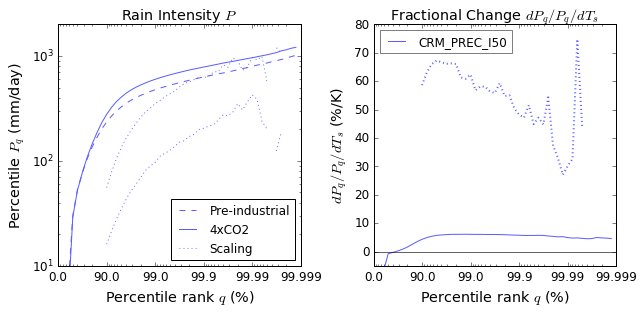

In [155]:
## Define variables
Q_id = "Q_IL"
ts_id = "TS"

subset = subset_all
pr_ids_to_plot = ['CRM_PREC_I50']

pr_sc = pr_sc_omega_qvstar_4
pr_type_name = "scaling_4"
fracChange_pr = fracChange_pr_omega_qvstar
outdir = "OMEGA-CRM-W_QVSATENV-CRM-T"

## Plot
fig, ((ax1,ax2)) = plt.subplots(ncols=2,nrows=1,figsize=(10,4.5))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(10,2e3)
ax2.set_xscale('log')
ax2.set_ylim(-5,80)

## x-axis 
Q_IL = df_quantile[compsets[0]][experiments[0]][subset][Q_id]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

epsilons = {}
## Plot percentiles vs. ranks for PI and 4xCO2
for experiment in experiments:
        epsilons[experiment] ={}
        df = df_quantile[compset_SPCAM][experiment][subset]
        
        for pr_id in pr_ids_to_plot:

            # Get data
            pr_c_IL = df[pr_id]
            pr_scaled = pr_sc[compset_SPCAM][experiment][subset][pr_id]
            
            # Compute precipitation efficiencies
            def f(epsilon):
                return sqrt(np.nansum(np.square(pr_c_IL[10:] - epsilon*pr_scaled[10:])))
            epsilon_all = minimize(f, 0, method='nelder-mead',
                           options={'xtol': 1e-8, 'disp': False})
            epsilon = epsilon_all['x'][0]
            epsilons[experiment][pr_id] = epsilon
            print "PE for %s %s is"%(pr_id,experiment), epsilon
            
            # Plot 
            ax1.plot(x,pr_c_IL,c=col[pr_id],linestyle=lt[experiment])
            if pr_id == pr_ids[0] and experiment == experiments[1]:
                lab = "%s, scaling"%(compset_labels[compset])
            else:
                lab = None
#             ax1.plot(x,epsilon*pr_scaled,c=col[pr_id],linestyle=':',lw=0.9,label=lab)
            ax1.plot(x,pr_scaled,c=col[pr_id],linestyle=':',lw=0.9,label=lab)

## Plot fractional change per unit temperature
ts1 = df_mean[compset_SPCAM][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compset_SPCAM][experiments[1]][subset][ts_id][0]
dts = ts2-ts1

for pr_id in pr_ids_to_plot:
    
    # Compute fractional changes in in epsilon, based on values computed before
    print "Fractional change in PE for %s is"%pr_id,
    print (epsilons['abrupt4xCO2'][pr_id]/epsilons['piControl'][pr_id] - 1.)/dts*100
    
#     for pr_type in pr_types:
    for pr_type in ("simulated",pr_type_name):

        if 'scaling' in pr_type:
            lttype = 'scaling'
        else:
            lttype = 'simulated'    
    
        ## y-axis
        pr_frac_change = fracChange_pr[compset_SPCAM][subset][pr_id][pr_type]
        pr_unit_frac_change = pr_frac_change/dts
        ## plot
        if pr_id == pr_ids[0] and experiment == experiments[1]:
            lab = "%s"%(pr_type)
        else:
            lab = None
        ax2.plot(x,pr_unit_frac_change,c=col[pr_id],linestyle=lt[lttype],
                label=lab,lw=lw[lttype])
    
## Format x axis on inverse-logarithmic scale
for ax in (ax1,ax2):
        ax.invert_xaxis() # reverse x-axis
        labels = [item.get_text() for item in ax1.get_xticklabels()]
        n = ceil(log10(x.max()))
        N = len(labels)
        for i in range(1,N):
            labels[i] = str(100*(1-10**(-n+i-1)))
            if -n+i-1 == 0:
                break
        ax.set_xticklabels(labels)
    
## Labels and titles
ax1.set_title(r"Rain Intensity $P$")
ax1.set_xlabel(r"Percentile rank $q$ (%)")
ax1.set_ylabel(r"Percentile $P_q$ (mm/day)")
# col_legend = 'k'
col_legend = col[pr_id]
ax1.plot(x,0*x,label="Pre-industrial",c=col_legend,linestyle=lt[experiments[0]])
ax1.plot(x,0*x,label="4xCO2",c=col_legend,linestyle=lt[experiments[1]])
ax1.plot(x,0*x,label="Scaling",c=col_legend,linestyle=':',lw=0.8)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[-3:],labels[-3:],loc="lower right",fontsize=12)
# ax1.legend(loc="lower right")
ax2.axhline(y=0,linestyle='-',c='k',lw=0.6)
ax2.set_title(r"Fractional Change $d P_q/P_q/d T_s$")
ax2.set_xlabel(r"Percentile rank $q$ (%)")
ax2.set_ylabel(r"$d P_q/P_q/d T_s$ (%/K)")
handles, labels = ax2.get_legend_handles_labels()
leg2 = ax2.legend(handles[:2],labels[:2],loc="upper left",fontsize=12)
# leg2 = ax2.legend(loc='upper left',ncol=len(pr_ids_to_plot),handlelength=1.8,columnspacing=0.6)
leg2.get_frame().set_alpha(0.5)
# ax2.legend(loc='upper left')

plt.savefig(os.path.join(figdir,outdir,"fig_percentilesAndFracChange_withScaling_%s_%s.pdf"%(string.join(list(pr_ids_to_plot),'_'),subset)),
            bbox_inches='tight')
plt.show()

Scaling #5 $\omega$, $q_v^\star$

PE for CRM_PREC_I50 piControl is 0.514431945801
PE for CRM_PREC_I50 abrupt4xCO2 is 0.654924468994
Fractional change in PE for CRM_PREC_I50 is 6.46684535788


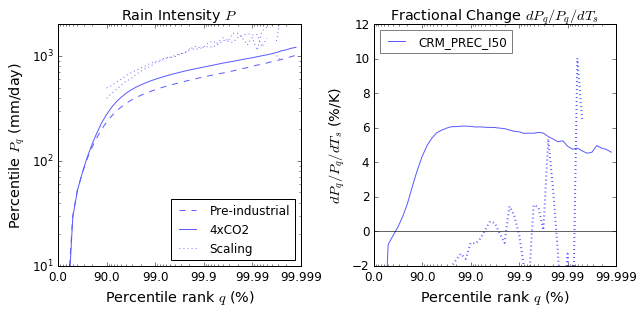

In [156]:
## Define variables
Q_id = "Q_IL"
ts_id = "TS"

subset = subset_all
pr_ids_to_plot = ['CRM_PREC_I50']

pr_sc = pr_sc_omega_qvstar_5
pr_type_name = "scaling_5"
fracChange_pr = fracChange_pr_omega_qvstar
outdir = "OMEGA-CRM-WT_QVSATENV-CRM-T"

## Plot
fig, ((ax1,ax2)) = plt.subplots(ncols=2,nrows=1,figsize=(10,4.5))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(10,2e3)
ax2.set_xscale('log')
ax2.set_ylim(-2,12)

## x-axis 
Q_IL = df_quantile[compsets[0]][experiments[0]][subset][Q_id]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

epsilons = {}
## Plot percentiles vs. ranks for PI and 4xCO2
for experiment in experiments:
        epsilons[experiment] ={}
        df = df_quantile[compset_SPCAM][experiment][subset]
        
        for pr_id in pr_ids_to_plot:

            # Get data
            pr_c_IL = df[pr_id]
            pr_scaled = pr_sc[compset_SPCAM][experiment][subset][pr_id]
            
            # Compute precipitation efficiencies
            def f(epsilon):
                return sqrt(np.nansum(np.square(pr_c_IL[10:] - epsilon*pr_scaled[10:])))
            epsilon_all = minimize(f, 0, method='nelder-mead',
                           options={'xtol': 1e-8, 'disp': False})
            epsilon = epsilon_all['x'][0]
            epsilons[experiment][pr_id] = epsilon
            print "PE for %s %s is"%(pr_id,experiment), epsilon
            
            # Plot 
            ax1.plot(x,pr_c_IL,c=col[pr_id],linestyle=lt[experiment])
            if pr_id == pr_ids[0] and experiment == experiments[1]:
                lab = "%s, scaling"%(compset_labels[compset])
            else:
                lab = None
#             ax1.plot(x,epsilon*pr_scaled,c=col[pr_id],linestyle=':',lw=0.9,label=lab)
            ax1.plot(x,pr_scaled,c=col[pr_id],linestyle=':',lw=0.9,label=lab)

## Plot fractional change per unit temperature
ts1 = df_mean[compset_SPCAM][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compset_SPCAM][experiments[1]][subset][ts_id][0]
dts = ts2-ts1

for pr_id in pr_ids_to_plot:
    
    # Compute fractional changes in in epsilon, based on values computed before
    print "Fractional change in PE for %s is"%pr_id,
    print (epsilons['abrupt4xCO2'][pr_id]/epsilons['piControl'][pr_id] - 1.)/dts*100
    
#     for pr_type in pr_types:
    for pr_type in ("simulated",pr_type_name):

        if 'scaling' in pr_type:
            lttype = 'scaling'
        else:
            lttype = 'simulated'    
    
        ## y-axis
        pr_frac_change = fracChange_pr[compset_SPCAM][subset][pr_id][pr_type]
        pr_unit_frac_change = pr_frac_change/dts
        ## plot
        if pr_id == pr_ids[0] and experiment == experiments[1]:
            lab = "%s"%(pr_type)
        else:
            lab = None
        ax2.plot(x,pr_unit_frac_change,c=col[pr_id],linestyle=lt[lttype],
                label=lab,lw=lw[lttype])
    
## Format x axis on inverse-logarithmic scale
for ax in (ax1,ax2):
        ax.invert_xaxis() # reverse x-axis
        labels = [item.get_text() for item in ax1.get_xticklabels()]
        n = ceil(log10(x.max()))
        N = len(labels)
        for i in range(1,N):
            labels[i] = str(100*(1-10**(-n+i-1)))
            if -n+i-1 == 0:
                break
        ax.set_xticklabels(labels)
    
## Labels and titles
ax1.set_title(r"Rain Intensity $P$")
ax1.set_xlabel(r"Percentile rank $q$ (%)")
ax1.set_ylabel(r"Percentile $P_q$ (mm/day)")
# col_legend = 'k'
col_legend = col[pr_id]
ax1.plot(x,0*x,label="Pre-industrial",c=col_legend,linestyle=lt[experiments[0]])
ax1.plot(x,0*x,label="4xCO2",c=col_legend,linestyle=lt[experiments[1]])
ax1.plot(x,0*x,label="Scaling",c=col_legend,linestyle=':',lw=0.8)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[-3:],labels[-3:],loc="lower right",fontsize=12)
# ax1.legend(loc="lower right")
ax2.axhline(y=0,linestyle='-',c='k',lw=0.6)
ax2.set_title(r"Fractional Change $d P_q/P_q/d T_s$")
ax2.set_xlabel(r"Percentile rank $q$ (%)")
ax2.set_ylabel(r"$d P_q/P_q/d T_s$ (%/K)")
handles, labels = ax2.get_legend_handles_labels()
leg2 = ax2.legend(handles[:2],labels[:2],loc="upper left",fontsize=12)
# leg2 = ax2.legend(loc='upper left',ncol=len(pr_ids_to_plot),handlelength=1.8,columnspacing=0.6)
leg2.get_frame().set_alpha(0.5)
# ax2.legend(loc='upper left')

plt.savefig(os.path.join(figdir,outdir,"fig_percentilesAndFracChange_withScaling_%s_%s.pdf"%(string.join(list(pr_ids_to_plot),'_'),subset)),
            bbox_inches='tight')
plt.show()

## Fractional changes

### Scalings using percentile mean $\omega$ and $T$

Scaling #3 $\omega$, $T$

# New figures for papers with scaling #3

## Fig.3 Fractional changes

24    99.6838
25    99.7488
26    99.8005
27    99.8415
28    99.8741
29    99.9000
30    99.9206
31    99.9369
32    99.9499
33    99.9602
34    99.9684
Name: Q_IL, dtype: float64
PE for PRECT piControl is 0.949275299072
PE for PRECT abrupt4xCO2 is 0.952065673828
Fractional change in PE for PRECT is 0.0696045367601
PE for CRM_PREC_I50 piControl is 0.974704177856
PE for CRM_PREC_I50 abrupt4xCO2 is 1.04359630585
Fractional change in PE for CRM_PREC_I50 is 1.67364739427
thermo 5.82767579679
dyn_mean 1.93942084017
dyn_profile -1.09157272305
non_linear 0.502252255107
thermo 6.22243117054
dyn_mean -0.0594852350596
dyn_profile -1.80251040168
non_linear 0.159237306576


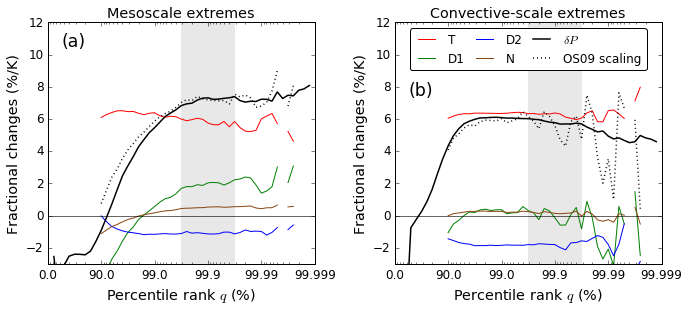

In [20]:
## Define variables
Q_id = "Q_IL"
ts_id = "TS"

subset = subset_all
pr_ids_to_plot = ['PRECT','CRM_PREC_I50']
subset = subset_all
fraction = pr_id[-2:]

contributions_to_plot = ['thermo','dyn_mean','dyn_profile','non_linear']
colors_to_plot = ['r','g','b','saddlebrown']
colors = dict(zip(contributions_to_plot,colors_to_plot))
contrib_labs_to_plot = ['T','D1','D2','N']
contrib_labels_to_plot = dict(zip(contributions_to_plot,contrib_labs_to_plot))

# Scaling-dependent parameters
pr_sc = pr_sc_omega_T_3
pr_type_name = "scaling_3"
fracChange_pr = fracChange_pr_omega_T
fracChange_contributions = contributions_omega_T_3
outdir = "OMEGA-CRM-W_T"


## Plot
fig, ((axs)) = plt.subplots(ncols=2,nrows=1,figsize=(11,4.5))


## x-axis
Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))
Q_slice = slice(24,35)
print Q_IL[Q_slice]

pr_types_to_plot = ("simulated",pr_type_name)
pr_type_labs = [r"$\delta P$",r"OS09 scaling"]
pr_type_labels = dict(zip(pr_types_to_plot,pr_type_labs))

## Plot fractional change per unit temperature
ts1 = df_mean[compset][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compset][experiments[1]][subset][ts_id][0]
dts = ts2-ts1

## Compute precipitation efficiencies and their fractional change
epsilons = {}
frC_PE = {}
for pr_id in pr_ids_to_plot:
    
    epsilons[pr_id] = {}
    frC_PE[pr_id] = {}
    
    for experiment in experiments:
    
        df = df_quantile[compset_SPCAM][experiment][subset]

        # Get data
        pr_c_IL = df[pr_id]
        pr_scaled = pr_sc[compset_SPCAM][experiment][subset][pr_id]

        # Compute precipitation efficiencies
        def f(epsilon):
            return sqrt(np.nansum(np.square(pr_c_IL[Q_slice] - epsilon*pr_scaled[Q_slice])))
        epsilon_all = minimize(f, 0, method='nelder-mead',
                       options={'xtol': 1e-8, 'disp': False})
        epsilon = epsilon_all['x'][0]
        epsilons[pr_id][experiment] = epsilon
        print "PE for %s %s is"%(pr_id,experiment), epsilon

    # Compute fractional changes in in epsilon, based on values computed before
    frC_PE[pr_id] = (epsilons[pr_id]['abrupt4xCO2']/epsilons[pr_id]['piControl'] - 1.)/dts*100
    print "Fractional change in PE for %s is"%pr_id, frC_PE[pr_id]
    

for ax,pr_id in zip(axs,pr_ids_to_plot):
    ax.set_xscale('log')
    ax.set_ylim(-3,12)
    
    # Grey shading 
    trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
    ax.fill_between(x[Q_slice],0,1,lw=0,facecolor='0.75',alpha=0.35,transform=trans)

    ## Plot contributions 
    for contribution in contributions_to_plot:

        ## y-axis
        pr_frac_change = fracChange_contributions[compset][subset][pr_id][contribution]
        pr_unit_frac_change = pr_frac_change/dts
        ## plot
        lab = r"%s"%(contrib_labels_to_plot[contribution])
        ax.plot(x,pr_unit_frac_change,c=colors[contribution],
                label=lab,lw=1)

        print contribution, np.nanmean(pr_unit_frac_change[Q_slice])

#     ## Compute delta_eps, the fractional change in precipitation efficiency, as the offset that minimizes 
#     ## the difference between the solid and dotted curves
#     def f(epsilon):
#         return sqrt(np.nansum(np.square(fracChange_pr[compset][subset][pr_id]['simulated'][Q_slice]/dts - 
#                                         fracChange_pr[compset][subset][pr_id][pr_type_name][Q_slice]/dts - epsilon)))
#     offset_all = minimize(f, 0, method='nelder-mead',
#                    options={'xtol': 1e-8, 'disp': False})
#     offset = offset_all['x']
#     print "offset:", offset

    for pr_type in pr_types_to_plot:

        ## y-axis
        pr_frac_change = fracChange_pr[compset][subset][pr_id][pr_type]
        pr_unit_frac_change = pr_frac_change/dts
        ## plot
        lab = r"%s"%(pr_type_labels[pr_type])
        if "scaling" in pr_type:
            ax.plot(x,pr_unit_frac_change+frC_PE[pr_id],c='k',linestyle=lt[pr_type],
                label=lab,lw=1.5)    
        else:
            ax.plot(x,pr_unit_frac_change,c='k',linestyle=lt[pr_type],
                    label=lab,lw=1.5)    

    ## Format x axis on inverse-logarithmic scale
    ax.invert_xaxis() # reverse x-axis
    labels = [item.get_text() for item in ax.get_xticklabels()]
    n = ceil(log10(x.max()))
    N = len(labels)
    for i in range(1,N):
        labels[i] = str(100*(1-10**(-n+i-1)))
        if -n+i-1 == 0:
            break
    ax.set_xticklabels(labels)

    ## Labels and titles
    ax.axhline(y=0,linestyle='-',c='k',lw=0.6)
    ax.set_xlabel(r"Percentile rank $q$ (%)")
    ax.set_ylabel(r"Fractional changes (%/K)")
    if pr_id == "PRECT":
        ax.set_title('Mesoscale extremes')
    else:
        ax.set_title('Convective-scale extremes')
        ax.legend(bbox_to_anchor=(1.2, 1),loc='upper left',handlelength=3.5)    
        ax.legend(loc='upper center',fancybox=True,handlelength=2,ncol=3,columnspacing=0.6,fontsize=12)

# subplot label
letter = ['(a)','(b)']
y_pos = [0.9,0.7]
for ax,i in zip(axs,range(2)):
    trans = mtransforms.blended_transform_factory(ax.transAxes, ax.transAxes)
    ax.text(0.05,y_pos[i],letter[i],fontsize='xx-large',transform=trans)

plt.savefig(os.path.join(figdir,outdir,"fig_paper_fracChangeWithScalingAndContribution_%s_%s_%s.pdf"%(string.join(list(pr_ids_to_plot),'_'),subset,compset)),
            bbox_inches='tight')
plt.show()

## Fig.4 Vertical $\omega$ profiles

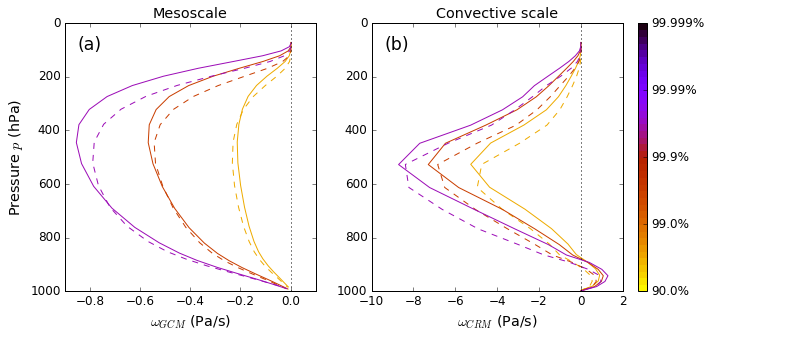

In [27]:
## Free parameters

pr_ids = ("PRECT","CRM_PREC_I50")
subset = subset_all

## Fixed parameters
compset = compset_SPCAM

# Scaling-dependent parameters
pr_sc = pr_sc_omega_T_3
pr_type_name = "scaling_3"
varids_for_scaling = varids_for_scaling_3
scaling_profiles = scaling_profiles_omega_T_3
fracChange_pr = fracChange_pr_omega_T
fracChange_contributions = contributions_omega_T_3
outdir = "OMEGA-CRM-W_T"


## Figure labels and titles
xlabs = (r"$\omega_{GCM}$ (Pa/s)",r"$\omega_{CRM}$ (Pa/s)")
tlabs = (r"Mesoscale",r"Convective scale")
subplotlabs = ("(a)","(b)")
## Start plotting
fig = plt.figure(figsize=(12,5))
gs = gridspec.GridSpec(1,3,width_ratios=[4.5,4.5,1])
axs = (plt.subplot(gs[0]),plt.subplot(gs[1]))

df_q = df_quantile[compset][experiment_PI][subset]

for pr_id,ax,i in zip(pr_ids,axs,range(1,3)):
    
    varids = varids_for_scaling[pr_id]
    ps_id, t_id, omega_id, = varids[:3]
    
    for Q in (Qs[1],Qs[3],Qs[5]):

        Q_id = str(Q)

        for experiment in experiments:

            if Q > df_q['Q_IL'].max():
                continue

            ## Get vertical profiles (compute missing ones)
            profiles = pres_sc,temp_sc,qvs_sc,omega_sc = scaling_profiles[compset][experiment][subset][pr_id][Q_id]
            
            ## Now plot
            lab = r"${%s}^{th}$ percentile, %s"%(Q_id,exp_labels[experiment])
            ax.plot(omega_sc,pres_sc/100.,c=col[Q_id],linestyle=lt[experiment],
                        label=lab)

    ax.set_title(tlabs[i-1])
    ax.set_ylim(0,1000)
    ax.set_xlabel(xlabs[i-1])
    ax.invert_yaxis()
    ax.axvline(x=0,c='k',linestyle=':')
    # subplot label
    trans = mtransforms.blended_transform_factory(ax.transAxes, ax.transAxes)
    ax.text(0.05,0.9,subplotlabs[i-1],fontsize='xx-large',transform=trans)

axs[0].set_ylabel(r"Pressure $p$ (hPa)")

# ###---- Side colorbar

ax2 = plt.subplot(gs[2])
Z = [[0,0],[0,0]]
cmap = plt.get_cmap(cmaps["Q_IL"])
cs = ax2.contourf(Z,alpha=1.0,levels=range(len(Q_IL_ext_colorbar)),cmap=cmap)
box = ax2.get_position()
ax2.set_position([box.x0*1.05, box.y0, box.width, box.height])
axColor = plt.axes([box.x0*1.05 - box.width * 1.37, box.y0, 0.01, box.height])
cb = plt.colorbar(cs, cax = axColor, orientation="vertical")
Q_ind = range(0,len(Q_IL_ext_colorbar),10)
cb.set_ticks(Q_ind)
cb.set_ticklabels(["%s%%"%Q_IL_ext_colorbar[i] for i in Q_ind])
ax2.axes.clear()
ax2.axis('off')


# axs[0].plot(np.arange(0,0.001,0.0001),-1*np.ones(10),label="Pre-industrial",c='k',linestyle=lt[experiments[0]])
# axs[0].plot(np.arange(0,0.001,0.0001),-1*np.ones(10),label="4xCO2",c='k',linestyle=lt[experiments[1]])
# handles, labels = axs[0].get_legend_handles_labels()
# axs[0].legend(handles[-2:],labels[-2:],loc="upper right",fancybox=True, framealpha=1,handlelength=3,fontsize=12)

plt.savefig(os.path.join(figdir,outdir,"fig_paper_dynamicContributions_%s_%s_%s.pdf"%(string.join(pr_ids,'_'),compset,subset)),
        bbox_inches='tight')
plt.show()

## Robustness against alpha

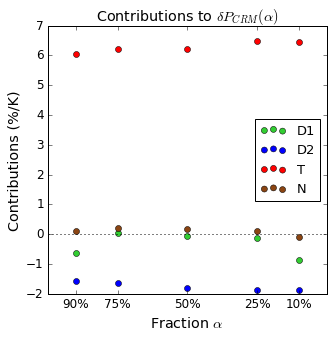

In [21]:
compset = compset_SPCAM
subset = subset_all
Q_slice = slice(24,35)

# Scaling-dependent parameters
pr_sc = pr_sc_omega_T_3
pr_type_name = "scaling_3"
fracChange_pr = fracChange_pr_omega_T
fracChange_contributions = contributions_omega_T_3
outdir = "OMEGA-CRM-W_T"


contributions_to_plot = ['dyn_mean','dyn_profile','thermo','non_linear']
labels = ['D1','D2','T','N']

## Compute fractional changes per unit temperature
ts_id = 'TS'
ts1 = df_mean[compset][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compset][experiments[1]][subset][ts_id][0]
dts = ts2-ts1

curves = {}

for contribution in contributions_to_plot:
    
    curves[contribution] = np.zeros((len(crm_pr_ids),))

    for i in range(len(crm_pr_ids)):
        pr_id = crm_pr_ids[i]

        ## y-axis
        pr_frac_change = fracChange_contributions[compset_SPCAM][subset][pr_id][contribution]
        pr_fc = np.nanmean(pr_frac_change[Q_slice])
        pr_unit_fc = pr_fc/dts

        curves[contribution][i] = pr_unit_fc
        
## Plot
fig, ((ax)) = plt.subplots(ncols=1,nrows=1,figsize=(5,5))

# x-axis
x = np.array([int(pr_id[-2:]) for pr_id in crm_pr_ids])
# colors
colors = dict(zip(contributions_to_plot,['limegreen','blue','r','saddlebrown']))
leg = []

for contribution in contributions_to_plot:
    leg.append(ax.scatter(x,curves[contribution],c=colors[contribution],s=36,lw=0.5))
    
ax.invert_xaxis()
# ax.set_ylim(-1.7,1.2)
ax.set_ylim(-2,7)
ax.axhline(y=0,c='k',linestyle=':')
ax.set_ylabel(r"Contributions (%/K)")
ax.set_xlabel(r"Fraction $\alpha$")
ax.set_title(r'Contributions to $\delta P_{CRM}(\alpha)$')
plt.xticks(x,["%s%%"%str(i) for i in x])
plt.legend(leg,labels,
           loc='right',fontsize=13)

plt.savefig(os.path.join(figdir,outdir,"fig_paper_contributions_vs_fraction_%s_%s_%s.pdf"%(string.join(list(contributions_to_plot),'_'),
                                                                                      compset,subset)),
            bbox_inches='tight')
plt.show()

## Correlation and fractional change for omegaGCM and omegaCRM*fwet

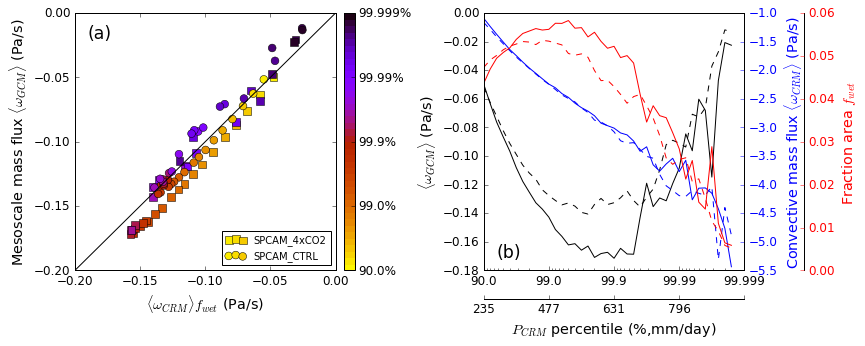

In [29]:
###---- Scatter plot ----###

## Fixed variables
compset = compset_SPCAM
frac_id = frac_id_root+crm_pr_id.split('_')[-1]

# Scaling-dependent parameters
pr_sc = pr_sc_omega_T_3
pr_type_name = "scaling_3"
varids_for_scaling = varids_for_scaling_3
scaling_profiles = scaling_profiles_omega_T_3
fracChange_pr = fracChange_pr_omega_T
fracChange_contributions = contributions_omega_T_3
outdir = "OMEGA-CRM-W_T"

## Define variables
ts_id = "TS"
pr_id = "CRM_PREC_I50"
gcm_pr_id = "PRECT"
crm_pr_id = "CRM_PREC_I50"
gcm_omega_id = varids_for_scaling[gcm_pr_id][2]
crm_omega_id = varids_for_scaling[crm_pr_id][2]
subset = subset_all

## Plot scatter
fig = plt.figure(figsize=(12,4.8))
gs = gridspec.GridSpec(1,3,width_ratios=[5,0.7,5])
ax0 = plt.subplot(gs[0])

cols = [pal['Q_IL'][str(Q)] for Q in Q_IL[10:]]

labels_ax0 = {experiment_PI:"SPCAM_CTRL",experiment_4xCO2:"SPCAM_4xCO2"}


## Compute all vertically-integrated omega
gcm_mf = {}
crm_mf = {}
frac_at_pr_q = {}
gcm_mf_est = {}
crm_mf_est = {}
for experiment in experiments[::-1]:
    
    gcm_mf[experiment] = np.zeros((Q_IL_ext.size-1,))
    crm_mf[experiment] = np.zeros((Q_IL_ext.size-1,))
    
    for i in range(len(Q_IL_ext)-1):
        Q_id = str(Q_IL_ext[i])

        pres = computeP(df_meanAtQ[compset][experiment][subset]['PS'][pr_id][Q_id][0])
        ## Compute GCM-scale mass flux
        gcm_omega = df_meanProfileAtQ[compset][experiment][subset][gcm_omega_id][pr_id][Q_id]
        gcm_mf[experiment][i] = verticalPressureIntegral(pres,gcm_omega)/verticalPressureIntegral(pres)
        ## Compute convective-scale mass flux
        crm_omega = df_meanProfileAtQ[compset][experiment][subset][crm_omega_id][pr_id][Q_id]
        crm_mf[experiment][i] = verticalPressureIntegral(pres,crm_omega)/verticalPressureIntegral(pres)
        
    ## Get fraction area
    frac_at_pr_q[experiment] = np.array(df_meanAtQ[compset][experiment][subset][frac_id][pr_id])[0,:]
    gcm_mf_est[experiment] = np.multiply(crm_mf[experiment],frac_at_pr_q[experiment])
    crm_mf_est[experiment] = np.divide(gcm_mf[experiment],frac_at_pr_q[experiment])

## Plot
for experiment in experiments[::-1]:

    ## PRECT quantiles vs. PRECT at CRM_PREC quantiles
    lab = labels_ax0[experiment]
    ax0.scatter(gcm_mf_est[experiment],gcm_mf[experiment],c=cols,marker=mark[experiment],label=lab,linewidth=0.5,s=60)


addOneToOneLine = pr_id == 'CRM_PREC_I50'
if addOneToOneLine:
    xmin1 = -0.2
    xmax1 = 0
    ax0.plot((xmin1,xmax1),(xmin1,xmax1),'k')
    ax0.set_xlim((xmin1,xmax1))
    ax0.set_ylim((xmin1,xmax1))
ax0.set_xlabel(r"${\langle\omega_{CRM}\rangle}f_{wet}$ (Pa/s)")
ax0.set_ylabel(r"Mesoscale mass flux $\langle\omega_{GCM}\rangle$ (Pa/s)")
ax0.legend(loc="lower right")


###---- Plot colorbar ----###

ax1 = plt.subplot(gs[1])

Z = [[0,0],[0,0]]
cmap = plt.get_cmap(cmaps["Q_IL"])
cs = ax1.contourf(Z,alpha=1.0,levels=range(len(Q_IL_ext_colorbar)),cmap=cmap)
box = ax1.get_position()
ax1.set_position([box.x0*1.05, box.y0, box.width, box.height])
# axColor = plt.axes([box.x0*1.05 - box.width * 0.37, box.y0, 0.012, box.height])
axColor = plt.axes([box.x0*1.05 - box.width * 1.87, box.y0, 0.012, box.height])
cb = plt.colorbar(cs, cax = axColor, orientation="vertical")
# cb = plt.colorbar(cs)
Q_ind = range(0,len(Q_IL_ext_colorbar),10)
cb.set_ticks(Q_ind)
cb.set_ticklabels(["%s%%"%Q_IL_ext_colorbar[i] for i in Q_ind])
ax1.axes.clear()
ax1.axis('off')

###---- Second plot ----###


## Plot
ax2 = plt.subplot(gs[2])
ax2.set_xscale('log')
ax3 = ax2.twinx()
ax4 = ax2.twinx()
c1 = 'k'
c2 = 'b'
c3 = 'r'
ax3.tick_params('y', colors=c2)
ax4.tick_params('y', colors=c3)
ax4.spines['right'].set_position(('axes',1.23))  # shifts position of ax3

# Secondary x axis
ax_newx = ax2.twiny()
ax_newx.xaxis.set_ticks_position('bottom')
ax_newx.spines['bottom'].set_position(('axes', -0.11))

cols = [pal['Q_IL'][str(Q)] for Q in Q_IL[10:]]

## x-axis
Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

for experiment in experiments[::-1]:

    ## PRECT quantiles vs. PRECT at CRM_PREC quantiles
    lab = exp_labels[experiment]
    gcm_mf_plot = np.hstack([[np.nan]*9,gcm_mf[experiment],[np.nan]])
    crm_mf_plot = np.hstack([[np.nan]*9,crm_mf[experiment],[np.nan]])
    frac_at_pr_q_plot = np.hstack([[np.nan]*9,frac_at_pr_q[experiment],[np.nan]])
    ax2.plot(x,gcm_mf_plot,c=c1,linestyle=lt[experiment])
    ax3.plot(x,crm_mf_plot,c=c2,linestyle=lt[experiment])
    ax4.plot(x,frac_at_pr_q_plot,c=c3,linestyle=lt[experiment])


## Format x axis on inverse-logarithmic scale
ax2.invert_xaxis() # reverse x-axis
labels = [item.get_text() for item in ax1.get_xticklabels()]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(1,N):
    labels[i] = str(100*(1-10**(-n+i-1)))
    if -n+i-1 == 0:
        break
ax2.set_xticklabels(labels)


## Replace labels on secondary x axis
labels_x = [item.get_text() for item in ax1.get_xticklabels()]
ax_newx.set_xticks(np.linspace(0,1,5))
pr_q_x = df_quantile[compset][experiment][subset][pr_id][9:]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(0,N):
    j = 10*(i-1)-1
    if j <= len(Q_IL_ext) and j >= 2:
        labels_x[i-2] = "%.f"%pr_q_x[j].round(0)
    else:
        labels_x[i-2] = ''
ax_newx.set_xticklabels(labels_x)

ax_newx.xaxis.tick_bottom()
ax_newx.xaxis.set_label_position('bottom')
ax_newx.set_xlabel(r"$P_{CRM}$ percentile (%,mm/day)",fontsize='x-large')

ax2.set_ylabel(r"$\langle\omega_{GCM}\rangle$ (Pa/s)",color=c1)
ax3.set_ylabel(r"Convective mass flux $\langle\omega_{CRM}\rangle$ (Pa/s)",color=c2)
ax4.set_ylabel(r"Fraction area $f_{wet}$",color=c3)

# subplot labels
trans0 = mtransforms.blended_transform_factory(ax0.transAxes, ax0.transAxes)
ax0.text(0.05,0.9,"(a)",fontsize='xx-large',transform=trans0)
trans2 = mtransforms.blended_transform_factory(ax2.transAxes, ax2.transAxes)
ax2.text(0.05,0.05,"(b)",fontsize='xx-large',transform=trans2)


plt.savefig(os.path.join(figdir,outdir,"fig_paper_omegaGCM_omegaCRM_fracarea_vs_Q_%s_%s_%s.pdf"%(pr_id,compset,subset)),
            bbox_inches='tight')

plt.show()

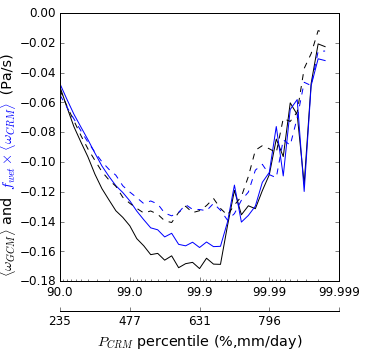

In [81]:
from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker, VPacker

## Fixed variables
compset = compset_SPCAM
frac_id = frac_id_root+crm_pr_id.split('_')[-1]

# Scaling-dependent parameters
pr_sc = pr_sc_omega_T_3
pr_type_name = "scaling_3"
varids_for_scaling = varids_for_scaling_3
scaling_profiles = scaling_profiles_omega_T_3
fracChange_pr = fracChange_pr_omega_T
fracChange_contributions = contributions_omega_T_3
outdir = "OMEGA-CRM-W_T"

## Define variables
ts_id = "TS"
pr_id = "CRM_PREC_I50"
gcm_pr_id = "PRECT"
crm_pr_id = "CRM_PREC_I50"
gcm_omega_id = varids_for_scaling[gcm_pr_id][2]
crm_omega_id = varids_for_scaling[crm_pr_id][2]
subset = subset_all

## Plot scatter
fig,ax2 = plt.subplots(ncols=1,nrows=1,figsize=(5,5))

cols = [pal['Q_IL'][str(Q)] for Q in Q_IL[10:]]

## Plot
ax2.set_xscale('log')
# ax3 = ax2.twinx()
# ax4 = ax2.twinx()
c1 = 'k'
c2 = 'b'
# c3 = 'r'
# ax3.tick_params('y', colors=c2)
# ax4.tick_params('y', colors=c3)
# ax4.spines['right'].set_position(('axes',1.23))  # shifts position of ax3

cols = [pal['Q_IL'][str(Q)] for Q in Q_IL[10:]]

## x-axis
Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

for experiment in experiments[::-1]:

    ## PRECT quantiles vs. PRECT at CRM_PREC quantiles
    lab = exp_labels[experiment]
    gcm_mf_plot = np.hstack([[np.nan]*9,gcm_mf[experiment],[np.nan]])
    gcm_mf_est_plot = np.hstack([[np.nan]*9,gcm_mf_est[experiment],[np.nan]])
    ax2.plot(x,gcm_mf_plot,c=c1,linestyle=lt[experiment])
    ax2.plot(x,gcm_mf_est_plot,c=c2,linestyle=lt[experiment])
    
#     ax3.plot(x,crm_mf_plot,c=c2,linestyle=lt[experiment])
#     ax4.plot(x,frac_at_pr_q_plot,c=c3,linestyle=lt[experiment])


## Format x axis on inverse-logarithmic scale
ax2.invert_xaxis() # reverse x-axis
labels = [item.get_text() for item in ax1.get_xticklabels()]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(1,N):
    labels[i] = str(100*(1-10**(-n+i-1)))
    if -n+i-1 == 0:
        break
ax2.set_xticklabels(labels)


## Create secondary x axis
ax_newx = ax2.twiny()
ax_newx.xaxis.set_ticks_position('bottom')
ax_newx.spines['bottom'].set_position(('axes', -0.11))

# Replace labels on secondary x axis
labels_x = [item.get_text() for item in ax1.get_xticklabels()]
ax_newx.set_xticks(np.linspace(0,1,5))
pr_q_x = df_quantile[compset][experiment][subset][pr_id][9:]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(0,N):
    j = 10*(i-1)-1
    if j <= len(Q_IL_ext) and j >= 2:
        labels_x[i-2] = "%.f"%pr_q_x[j].round(0)
    else:
        labels_x[i-2] = ''
ax_newx.set_xticklabels(labels_x)

ax_newx.xaxis.tick_bottom()
ax_newx.xaxis.set_label_position('bottom')
ax_newx.set_xlabel(r"$P_{CRM}$ percentile (%,mm/day)",fontsize='x-large')

## y-axis legend
# ax2.set_ylabel(r"$\langle\omega_{GCM}\rangle$ (Pa/s)",color=c1)

### y-axis legend with colors
xbox1 = TextArea(r"$\langle\omega_{GCM}\rangle$ and ", textprops=dict(color='k',size="x-large",ha='center',va='bottom',rotation='vertical'))
xbox2 = TextArea(r"$f_{wet} \times \langle\omega_{CRM}\rangle$", textprops=dict(color=c2,size="x-large",ha='center',va='bottom',rotation='vertical'))
xbox3 = TextArea(r" (Pa/s)", textprops=dict(color="k",size="x-large",ha='center',va='bottom',rotation='vertical'))

xbox = VPacker(children=[xbox3, xbox2, xbox1], align='baseline', pad=0, sep=5)

anchored_xbox = AnchoredOffsetbox(loc=8, child=xbox, pad=0., frameon=False, bbox_to_anchor=(-0.15,0.), 
                                  bbox_transform=ax2.transAxes, borderpad=0.)
ax2.add_artist(anchored_xbox)


# # subplot labels
# trans2 = mtransforms.blended_transform_factory(ax2.transAxes, ax2.transAxes)
# ax2.text(0.05,0.05,"(b)",fontsize='xx-large',transform=trans2)


plt.savefig(os.path.join(figdir,outdir,"fig_paper_omegaGCM_omegaGCMest_vs_Q_%s_%s_%s.pdf"%(pr_id,compset,subset)),
            bbox_inches='tight')

plt.show()

First plot:
- Last 4 percentiles have been removed because are outliers
- Add a regression line
Regression coefficient : 0.980691461446
p_value : 5.75058224434e-25


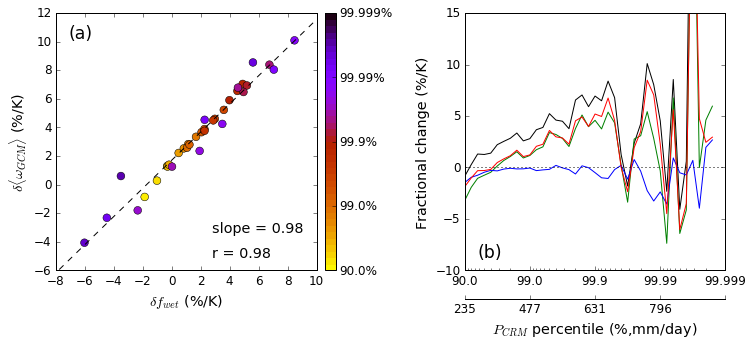

In [62]:
###---- Scatter plot ----###

## Fixed variables
compset = compset_SPCAM
frac_id = frac_id_root+crm_pr_id.split('_')[-1]

# Scaling-dependent parameters
pr_sc = pr_sc_omega_T_3
pr_type_name = "scaling_3"
varids_for_scaling = varids_for_scaling_3
scaling_profiles = scaling_profiles_omega_T_3
fracChange_pr = fracChange_pr_omega_T
fracChange_contributions = contributions_omega_T_3
outdir = "OMEGA-CRM-W_T"

## Define variables
ts_id = "TS"
pr_id = "CRM_PREC_I50"
gcm_pr_id = "PRECT"
crm_pr_id = "CRM_PREC_I50"
gcm_omega_id = varids_for_scaling[gcm_pr_id][2]
crm_omega_id = varids_for_scaling[crm_pr_id][2]
subset = subset_all

## Plot scatter
fig = plt.figure(figsize=(12,4.8))
gs = gridspec.GridSpec(1,3,width_ratios=[5,0.7,5])
ax0 = plt.subplot(gs[0])

cols = [pal['Q_IL'][str(Q)] for Q in Q_IL[10:]]

labels_ax0 = {experiment_PI:"SPCAM_CTRL",experiment_4xCO2:"SPCAM_4xCO2"}

## Compute temperature change
ts1 = df_mean[compset][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compset][experiments[1]][subset][ts_id][0]
dts = ts2-ts1

## Compute fractional changes in vertically-integrated omega and fraction area
gcm_mf = {}
crm_mf = {}
frac_at_pr_q = {}
gcm_mf_est = {}
crm_mf_est = {}
for experiment in experiments[::-1]:
    
    gcm_mf[experiment] = np.zeros((Q_IL_ext.size-1,))
    crm_mf[experiment] = np.zeros((Q_IL_ext.size-1,))
    
    for i in range(len(Q_IL_ext)-1):
        Q_id = str(Q_IL_ext[i])

        pres = computeP(df_meanAtQ[compset][experiment][subset]['PS'][pr_id][Q_id][0])
        ## Compute GCM-scale mass flux
        gcm_omega = df_meanProfileAtQ[compset][experiment][subset][gcm_omega_id][pr_id][Q_id]
        gcm_mf[experiment][i] = verticalPressureIntegral(pres,gcm_omega)/verticalPressureIntegral(pres)
        ## Compute convective-scale mass flux
        crm_omega = df_meanProfileAtQ[compset][experiment][subset][crm_omega_id][pr_id][Q_id]
        crm_mf[experiment][i] = verticalPressureIntegral(pres,crm_omega)/verticalPressureIntegral(pres)
        
    ## Get fraction area
    frac_at_pr_q[experiment] = np.array(df_meanAtQ[compset][experiment][subset][frac_id][pr_id])[0,:]
    gcm_mf_est[experiment] = np.multiply(crm_mf[experiment],frac_at_pr_q[experiment])
    crm_mf_est[experiment] = np.divide(gcm_mf[experiment],frac_at_pr_q[experiment])

# Compute all fractional changes
def computeFrC(xPI,x4xCO2,dts):
    return (x4xCO2/xPI-1.)/dts*100.   # Assuming all quantities are floats
    
frC_gcm_mf = computeFrC(gcm_mf[experiment_PI],gcm_mf[experiment_4xCO2],dts)
frC_gcm_mf_est = computeFrC(gcm_mf_est[experiment_PI],gcm_mf_est[experiment_4xCO2],dts)
frC_crm_mf = computeFrC(crm_mf[experiment_PI],crm_mf[experiment_4xCO2],dts)
frC_crm_mf_est = computeFrC(crm_mf_est[experiment_PI],crm_mf_est[experiment_4xCO2],dts)
frC_frac_at_pr_q = computeFrC(frac_at_pr_q[experiment_PI],frac_at_pr_q[experiment_4xCO2],dts)


###---- First plot ----###

Q_slice = slice(0,35)

# ax0.scatter(frC_gcm_mf_est[Q_slice],frC_gcm_mf[Q_slice],c=cols,marker=mark[experiment_PI],linewidth=0.5,s=60)
ax0.scatter(frC_frac_at_pr_q[Q_slice],frC_gcm_mf[Q_slice],c=cols,marker=mark[experiment_PI],linewidth=0.5,s=60)

print "First plot:"
print "- Last 4 percentiles have been removed because are outliers"
print "- Add a regression line"

a,b,r,p,err = linregress(frC_frac_at_pr_q[Q_slice],frC_gcm_mf[Q_slice])
x0,x1 = -20,20
y0,y1 = a*np.array((x0,x1))+np.array((b,b))

trans0 = mtransforms.blended_transform_factory(ax0.transAxes, ax0.transAxes)
ax0.text(0.6,0.15,"slope = %1.2f"%a,fontsize='x-large',transform=trans0)
ax0.text(0.6,0.05,"r = %1.2f"%r,fontsize='x-large',transform=trans0)

print "Regression coefficient :",r
print "p_value :",p

# xlims = ax0.get_xlim()
# ylims = ax0.get_ylim()
xlims = (-8,10)
ylims = (-6,12)
addOneToOneLine = pr_id == 'CRM_PREC_I50'
if addOneToOneLine:
    xmin1 = -10
    xmax1 = 15
#     ax0.plot((xmin1,xmax1),(xmin1,xmax1),'k')
    ax0.plot((x0,x1),(y0,y1),'k--')
    ax0.set_xlim(xlims)
    ax0.set_ylim(ylims)
# ax0.set_xlabel(r"$\delta{\langle\omega_{CRM}\rangle} + \delta f_{wet}$ (%/K)")
ax0.set_xlabel(r"$\delta f_{wet}$ (%/K)")
ax0.set_ylabel(r"$\delta \langle\omega_{GCM}\rangle$ (%/K)")
ax0.legend(loc="lower right")


###---- Plot colorbar ----###

ax1 = plt.subplot(gs[1])

Z = [[0,0],[0,0]]
cmap = plt.get_cmap(cmaps["Q_IL"])
cs = ax1.contourf(Z,alpha=1.0,levels=range(len(Q_IL_ext_colorbar)),cmap=cmap)
box = ax1.get_position()
ax1.set_position([box.x0*1.05, box.y0, box.width, box.height])
# axColor = plt.axes([box.x0*1.05 - box.width * 0.37, box.y0, 0.012, box.height])
axColor = plt.axes([box.x0*1.05 - box.width * 1.87, box.y0, 0.012, box.height])
cb = plt.colorbar(cs, cax = axColor, orientation="vertical")
# cb = plt.colorbar(cs)
Q_ind = range(0,len(Q_IL_ext_colorbar),10)
cb.set_ticks(Q_ind)
cb.set_ticklabels(["%s%%"%Q_IL_ext_colorbar[i] for i in Q_ind])
ax1.axes.clear()
ax1.axis('off')

###---- Second plot ----###


## Plot
ax2 = plt.subplot(gs[2])
ax2.set_xscale('log')
# ax3 = ax2.twinx()
# ax4 = ax2.twinx()
c1 = 'k'
c2 = 'b'
c3 = 'r'
c4 = 'g'
# ax3.tick_params('y', colors=c2)
# ax4.tick_params('y', colors=c3)
# ax4.spines['right'].set_position(('axes',1.23))  # shifts position of ax3

# Secondary x axis
ax_newx = ax2.twiny()
ax_newx.xaxis.set_ticks_position('bottom')
ax_newx.spines['bottom'].set_position(('axes', -0.11))

cols = [pal['Q_IL'][str(Q)] for Q in Q_IL[10:]]

## x-axis
Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

lab = exp_labels[experiment]
frC_gcm_mf_plot = np.hstack([[np.nan]*9,frC_gcm_mf,[np.nan]])
frC_gcm_mf_est_plot = np.hstack([[np.nan]*9,frC_gcm_mf_est,[np.nan]])
frC_crm_mf_plot = np.hstack([[np.nan]*9,frC_crm_mf,[np.nan]])
frC_frac_at_pr_q_plot = np.hstack([[np.nan]*9,frC_frac_at_pr_q,[np.nan]])
ax2.plot(x,frC_gcm_mf_plot,c=c1)
ax2.plot(x,frC_gcm_mf_est_plot,c=c4)
ax2.plot(x,frC_crm_mf_plot,c=c2)
ax2.plot(x,frC_frac_at_pr_q_plot,c=c3)
ax2.axhline(0,c='k',linestyle=':')


## Format x axis on inverse-logarithmic scale
ax2.invert_xaxis() # reverse x-axis
labels = [item.get_text() for item in ax1.get_xticklabels()]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(1,N):
    labels[i] = str(100*(1-10**(-n+i-1)))
    if -n+i-1 == 0:
        break
ax2.set_xticklabels(labels)


## Replace labels on secondary x axis
labels_x = [item.get_text() for item in ax1.get_xticklabels()]
ax_newx.set_xticks(np.linspace(0,1,5))
pr_q_x = df_quantile[compset][experiment_PI][subset][pr_id][9:]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(0,N):
    j = 10*(i-1)-1
    if j <= len(Q_IL_ext) and j >= 2:
        labels_x[i-2] = "%.f"%pr_q_x[j].round(0)
    else:
        labels_x[i-2] = ''
ax_newx.set_xticklabels(labels_x)

ax_newx.xaxis.tick_bottom()
ax_newx.xaxis.set_label_position('bottom')
ax_newx.set_xlabel(r"$P_{CRM}$ percentile (%,mm/day)",fontsize='x-large')

ax2.set_ylim((-10,15))
ax2.set_ylabel(r"Fractional change (%/K)",color=c1)
# ax3.set_ylabel(r"Convective mass flux $\langle\omega_{CRM}\rangle$ (Pa/s)",color=c2)
# ax4.set_ylabel(r"Fraction area $f_{wet}$",color=c3)

# subplot labels
trans0 = mtransforms.blended_transform_factory(ax0.transAxes, ax0.transAxes)
ax0.text(0.05,0.9,"(a)",fontsize='xx-large',transform=trans0)
trans2 = mtransforms.blended_transform_factory(ax2.transAxes, ax2.transAxes)
ax2.text(0.05,0.05,"(b)",fontsize='xx-large',transform=trans2)


plt.savefig(os.path.join(figdir,outdir,"fig_paper_fracChange_omegaGCM_omegaCRM_fracarea_vs_Q_%s_%s_%s.pdf"%(pr_id,compset,subset)),
            bbox_inches='tight')

plt.show()

For paper

Second plot:
- Last 4 percentiles have been removed because are outliers
Regression coefficient : 0.980691461446
p_value : 5.75058224434e-25


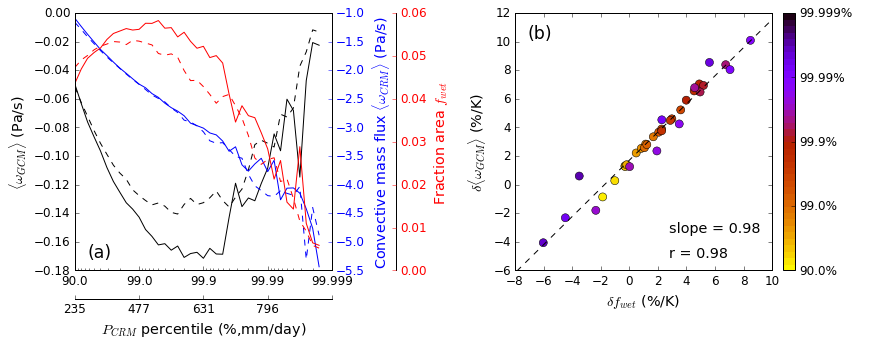

In [83]:
###---- Scatter plot ----###

## Fixed variables
compset = compset_SPCAM
frac_id = frac_id_root+crm_pr_id.split('_')[-1]

# Scaling-dependent parameters
pr_sc = pr_sc_omega_T_3
pr_type_name = "scaling_3"
varids_for_scaling = varids_for_scaling_3
scaling_profiles = scaling_profiles_omega_T_3
fracChange_pr = fracChange_pr_omega_T
fracChange_contributions = contributions_omega_T_3
outdir = "OMEGA-CRM-W_T"

## Define variables
ts_id = "TS"
pr_id = "CRM_PREC_I50"
gcm_pr_id = "PRECT"
crm_pr_id = "CRM_PREC_I50"
gcm_omega_id = varids_for_scaling[gcm_pr_id][2]
crm_omega_id = varids_for_scaling[crm_pr_id][2]
subset = subset_all

## Plot scatter
fig = plt.figure(figsize=(14,4.8))
gs = gridspec.GridSpec(1,4,width_ratios=[5,1.7,5,0.7])

cols = [pal['Q_IL'][str(Q)] for Q in Q_IL[10:]]

labels_ax1 = {experiment_PI:"SPCAM_CTRL",experiment_4xCO2:"SPCAM_4xCO2"}

## Compute temperature change
ts1 = df_mean[compset][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compset][experiments[1]][subset][ts_id][0]
dts = ts2-ts1

## Compute fractional changes in vertically-integrated omega and fraction area
gcm_mf = {}
crm_mf = {}
frac_at_pr_q = {}
gcm_mf_est = {}
crm_mf_est = {}
for experiment in experiments[::-1]:
    
    gcm_mf[experiment] = np.zeros((Q_IL_ext.size-1,))
    crm_mf[experiment] = np.zeros((Q_IL_ext.size-1,))
    
    for i in range(len(Q_IL_ext)-1):
        Q_id = str(Q_IL_ext[i])

        pres = computeP(df_meanAtQ[compset][experiment][subset]['PS'][pr_id][Q_id][0])
        ## Compute GCM-scale mass flux
        gcm_omega = df_meanProfileAtQ[compset][experiment][subset][gcm_omega_id][pr_id][Q_id]
        gcm_mf[experiment][i] = verticalPressureIntegral(pres,gcm_omega)/verticalPressureIntegral(pres)
        ## Compute convective-scale mass flux
        crm_omega = df_meanProfileAtQ[compset][experiment][subset][crm_omega_id][pr_id][Q_id]
        crm_mf[experiment][i] = verticalPressureIntegral(pres,crm_omega)/verticalPressureIntegral(pres)
        
    ## Get fraction area
    frac_at_pr_q[experiment] = np.array(df_meanAtQ[compset][experiment][subset][frac_id][pr_id])[0,:]
    gcm_mf_est[experiment] = np.multiply(crm_mf[experiment],frac_at_pr_q[experiment])
    crm_mf_est[experiment] = np.divide(gcm_mf[experiment],frac_at_pr_q[experiment])

# Compute all fractional changes
def computeFrC(xPI,x4xCO2,dts):
    return (x4xCO2/xPI-1.)/dts*100.   # Assuming all quantities are floats
    
frC_gcm_mf = computeFrC(gcm_mf[experiment_PI],gcm_mf[experiment_4xCO2],dts)
frC_gcm_mf_est = computeFrC(gcm_mf_est[experiment_PI],gcm_mf_est[experiment_4xCO2],dts)
frC_crm_mf = computeFrC(crm_mf[experiment_PI],crm_mf[experiment_4xCO2],dts)
frC_crm_mf_est = computeFrC(crm_mf_est[experiment_PI],crm_mf_est[experiment_4xCO2],dts)
frC_frac_at_pr_q = computeFrC(frac_at_pr_q[experiment_PI],frac_at_pr_q[experiment_4xCO2],dts)


###---- First plot ----###

ax0 = plt.subplot(gs[0])

## Plot
ax0.set_xscale('log')
ax01 = ax0.twinx()
ax02 = ax0.twinx()
c0 = 'k'
c1 = 'b'
c2 = 'r'
ax01.tick_params('y', colors=c1)
ax02.tick_params('y', colors=c2)
ax02.spines['right'].set_position(('axes',1.25))  # shifts position of ax3

# Secondary x axis
ax_newx = ax0.twiny()
ax_newx.xaxis.set_ticks_position('bottom')
ax_newx.spines['bottom'].set_position(('axes', -0.11))

cols = [pal['Q_IL'][str(Q)] for Q in Q_IL[10:]]

## x-axis
Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))

for experiment in experiments[::-1]:

    ## PRECT quantiles vs. PRECT at CRM_PREC quantiles
    lab = exp_labels[experiment]
    gcm_mf_plot = np.hstack([[np.nan]*9,gcm_mf[experiment],[np.nan]])
    crm_mf_plot = np.hstack([[np.nan]*9,crm_mf[experiment],[np.nan]])
    frac_at_pr_q_plot = np.hstack([[np.nan]*9,frac_at_pr_q[experiment],[np.nan]])
    ax0.plot(x,gcm_mf_plot,c=c0,linestyle=lt[experiment])
    ax01.plot(x,crm_mf_plot,c=c1,linestyle=lt[experiment])
    ax02.plot(x,frac_at_pr_q_plot,c=c2,linestyle=lt[experiment])


## Format x axis on inverse-logarithmic scale
ax0.invert_xaxis() # reverse x-axis
labels = [item.get_text() for item in ax0.get_xticklabels()]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(1,N):
    labels[i] = str(100*(1-10**(-n+i-1)))
    if -n+i-1 == 0:
        break
ax0.set_xticklabels(labels)


## Replace labels on secondary x axis
labels_x = [item.get_text() for item in ax1.get_xticklabels()]
ax_newx.set_xticks(np.linspace(0,1,5))
pr_q_x = df_quantile[compset][experiment][subset][pr_id][9:]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(0,N):
    j = 10*(i-1)-1
    if j <= len(Q_IL_ext) and j >= 2:
        labels_x[i-2] = "%.f"%pr_q_x[j].round(0)
    else:
        labels_x[i-2] = ''
ax_newx.set_xticklabels(labels_x)

ax_newx.xaxis.tick_bottom()
ax_newx.xaxis.set_label_position('bottom')
ax_newx.set_xlabel(r"$P_{CRM}$ percentile (%,mm/day)",fontsize='x-large')

ax0.set_ylabel(r"$\langle\omega_{GCM}\rangle$ (Pa/s)",color=c0)
ax01.set_ylabel(r"Convective mass flux $\langle\omega_{CRM}\rangle$ (Pa/s)",color=c1)
ax02.set_ylabel(r"Fraction area $f_{wet}$",color=c2)

###---- Second plot ----###

ax1 = plt.subplot(gs[2])

Q_slice = slice(0,35)

# ax0.scatter(frC_gcm_mf_est[Q_slice],frC_gcm_mf[Q_slice],c=cols,marker=mark[experiment_PI],linewidth=0.5,s=60)
ax1.scatter(frC_frac_at_pr_q[Q_slice],frC_gcm_mf[Q_slice],c=cols,marker=mark[experiment_PI],linewidth=0.5,s=65)

print "Second plot:"
print "- Last 4 percentiles have been removed because are outliers"

a,b,r,p,err = linregress(frC_frac_at_pr_q[Q_slice],frC_gcm_mf[Q_slice])
x0,x1 = -20,20
y0,y1 = a*np.array((x0,x1))+np.array((b,b))

trans1 = mtransforms.blended_transform_factory(ax1.transAxes, ax1.transAxes)
ax1.text(0.6,0.15,"slope = %1.2f"%a,fontsize='x-large',transform=trans1)
ax1.text(0.6,0.05,"r = %1.2f"%r,fontsize='x-large',transform=trans1)

print "Regression coefficient :",r
print "p_value :",p

# xlims = ax0.get_xlim()
# ylims = ax0.get_ylim()
xlims = (-8,10)
ylims = (-6,12)
addOneToOneLine = pr_id == 'CRM_PREC_I50'
if addOneToOneLine:
    xmin1 = -10
    xmax1 = 15
#     ax0.plot((xmin1,xmax1),(xmin1,xmax1),'k')
    ax1.plot((x0,x1),(y0,y1),'k--')
    ax1.set_xlim(xlims)
    ax1.set_ylim(ylims)
# ax1.set_xlabel(r"$\delta{\langle\omega_{CRM}\rangle} + \delta f_{wet}$ (%/K)")
ax1.set_xlabel(r"$\delta f_{wet}$ (%/K)")
ax1.set_ylabel(r"$\delta \langle\omega_{GCM}\rangle$ (%/K)")
ax1.legend(loc="lower right")


###---- Plot colorbar ----###

ax2 = plt.subplot(gs[3])

Z = [[0,0],[0,0]]
cmap = plt.get_cmap(cmaps["Q_IL"])
cs = ax2.contourf(Z,alpha=1.0,levels=range(len(Q_IL_ext_colorbar)),cmap=cmap)
box = ax2.get_position()
# ax2.set_position([box.x0*1.05, box.y0, box.width, box.height])
# axColor = plt.axes([box.x0*1.05 - box.width * 1.87, box.y0, 0.012, box.height])
axColor = plt.axes([box.x0*1.035 - box.width * 1.87, box.y0, 0.012, box.height])
cb = plt.colorbar(cs, cax = axColor, orientation="vertical")
# cb = plt.colorbar(cs)
Q_ind = range(0,len(Q_IL_ext_colorbar),10)
cb.set_ticks(Q_ind)
cb.set_ticklabels(["%s%%"%Q_IL_ext_colorbar[i] for i in Q_ind])
ax2.axes.clear()
ax2.axis('off')

# subplot labels
trans0 = mtransforms.blended_transform_factory(ax0.transAxes, ax0.transAxes)
ax0.text(0.05,0.05,"(a)",fontsize='xx-large',transform=trans0)
trans2 = mtransforms.blended_transform_factory(ax1.transAxes, ax1.transAxes)
ax1.text(0.05,0.9,"(b)",fontsize='xx-large',transform=trans2)

plt.savefig(os.path.join(figdir,outdir,"fig_paper_changeVsAQAndFracChange_omegaGCM_omegaCRM_fracarea_%s_%s_%s.pdf"%(pr_id,compset,subset)),
            bbox_inches='tight')

plt.show()

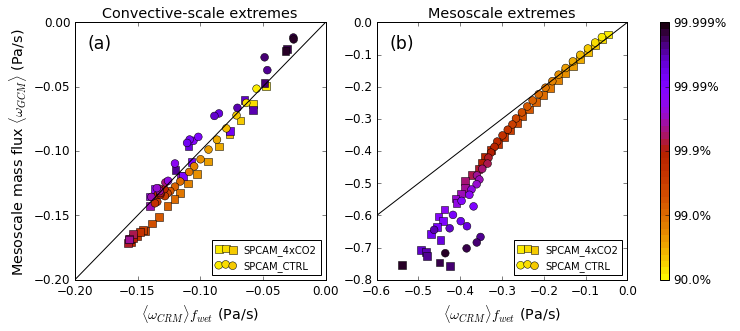

In [127]:
###---- Scatter plot ----###

## Fixed variables
compset = compset_SPCAM
frac_id = frac_id_root+crm_pr_id.split('_')[-1]

# Scaling-dependent parameters
pr_sc = pr_sc_omega_T_3
pr_type_name = "scaling_3"
varids_for_scaling = varids_for_scaling_3
scaling_profiles = scaling_profiles_omega_T_3
fracChange_pr = fracChange_pr_omega_T
fracChange_contributions = contributions_omega_T_3
outdir = "OMEGA-CRM-W_T"

## Define variables
ts_id = "TS"
pr_ids_to_plot = ["CRM_PREC_I50","PRECT"]
gcm_pr_id = "PRECT"
crm_pr_id = "CRM_PREC_I50"
gcm_omega_id = varids_for_scaling[gcm_pr_id][2]
crm_omega_id = varids_for_scaling[crm_pr_id][2]
subset = subset_all

def computeVerticallyIntegratedOmega(pr_id):
    gcm_mf = {}
    crm_mf = {}
    frac_at_pr_q = {}
    gcm_mf_est = {}
    crm_mf_est = {}
    for experiment in experiments[::-1]:

        gcm_mf[experiment] = np.zeros((Q_IL_ext.size-1,))
        crm_mf[experiment] = np.zeros((Q_IL_ext.size-1,))

        for i in range(len(Q_IL_ext)-1):
            Q_id = str(Q_IL_ext[i])

            pres = computeP(df_meanAtQ[compset][experiment][subset]['PS'][pr_id][Q_id][0])
            ## Compute GCM-scale mass flux
            gcm_omega = df_meanProfileAtQ[compset][experiment][subset][gcm_omega_id][pr_id][Q_id]
            gcm_mf[experiment][i] = verticalPressureIntegral(pres,gcm_omega)/verticalPressureIntegral(pres)
            ## Compute convective-scale mass flux
            crm_omega = df_meanProfileAtQ[compset][experiment][subset][crm_omega_id][pr_id][Q_id]
            crm_mf[experiment][i] = verticalPressureIntegral(pres,crm_omega)/verticalPressureIntegral(pres)

        ## Get fraction area
        frac_at_pr_q[experiment] = np.array(df_meanAtQ[compset][experiment][subset][frac_id][pr_id])[0,:]
        gcm_mf_est[experiment] = np.multiply(crm_mf[experiment],frac_at_pr_q[experiment])
        crm_mf_est[experiment] = np.divide(gcm_mf[experiment],frac_at_pr_q[experiment])
        
    return gcm_mf, crm_mf, gcm_mf_est, crm_mf_est, frac_at_pr_q


## Plot scatter
fig = plt.figure(figsize=(11,4.8))
gs = gridspec.GridSpec(1,3,width_ratios=[5,5,0.2])

cols = [pal['Q_IL'][str(Q)] for Q in Q_IL[10:]]

labels_ax0 = {experiment_PI:"SPCAM_CTRL",experiment_4xCO2:"SPCAM_4xCO2"}


###---- Plot 1 ----### 

pr_id = pr_ids_to_plot[0]
ax0 = plt.subplot(gs[0])

## Compute all vertically-integrated omega

gcm_mf, crm_mf, gcm_mf_est, crm_mf_est, frac_at_pr_q = computeVerticallyIntegratedOmega(pr_id)

## Plot
for experiment in experiments[::-1]:

    ## PRECT quantiles vs. PRECT at CRM_PREC quantiles
    lab = labels_ax0[experiment]
    ax0.scatter(gcm_mf_est[experiment],gcm_mf[experiment],c=cols,marker=mark[experiment],label=lab,linewidth=0.5,s=60)


addOneToOneLine = True
if addOneToOneLine:
    xmin1 = -0.2
    xmax1 = 0
    ax0.plot((xmin1,xmax1),(xmin1,xmax1),'k')
    ax0.set_xlim((xmin1,xmax1))
    ax0.set_ylim((xmin1,xmax1))
ax0.set_xlabel(r"${\langle\omega_{CRM}\rangle}f_{wet}$ (Pa/s)")
ax0.set_ylabel(r"Mesoscale mass flux $\langle\omega_{GCM}\rangle$ (Pa/s)")
ax0.legend(loc="lower right")

ax0.set_title("Convective-scale extremes")

###---- Plot 2 ----### 

pr_id = pr_ids_to_plot[1]
ax1 = plt.subplot(gs[1])

## Compute all vertically-integrated omega

gcm_mf, crm_mf, gcm_mf_est, crm_mf_est, frac_at_pr_q = computeVerticallyIntegratedOmega(pr_id)

## Plot
for experiment in experiments[::-1]:

    ## PRECT quantiles vs. PRECT at CRM_PREC quantiles
    lab = labels_ax0[experiment]
    ax1.scatter(gcm_mf_est[experiment],gcm_mf[experiment],c=cols,marker=mark[experiment],label=lab,linewidth=0.5,s=60)


addOneToOneLine = True
if addOneToOneLine:
    xmin1 = -0.6
    ymin1 = -0.8
    xmax1 = ymax1 = 0
    ax1.plot((ymin1,ymax1),(ymin1,ymax1),'k')
    ax1.set_xlim((xmin1,xmax1))
    ax1.set_ylim((ymin1,ymax1))
ax1.set_xlabel(r"${\langle\omega_{CRM}\rangle}f_{wet}$ (Pa/s)")
# ax1.set_ylabel(r"Mesoscale mass flux $\langle\omega_{GCM}\rangle$ (Pa/s)")
ax1.legend(loc="lower right")

ax1.set_title("Mesoscale extremes")

###---- Plot colorbar ----###

ax2 = plt.subplot(gs[2])

Z = [[0,0],[0,0]]
cmap = plt.get_cmap(cmaps["Q_IL"])
cs = ax2.contourf(Z,alpha=1.0,levels=range(len(Q_IL_ext_colorbar)),cmap=cmap)
box = ax2.get_position()
ax2.set_position([box.x0*1.05, box.y0, box.width, box.height])
# axColor = plt.axes([box.x0*1.05 - box.width * 0.37, box.y0, 0.012, box.height])
axColor = plt.axes([box.x0*1. - box.width * 1.87, box.y0, 0.012, box.height])
cb = plt.colorbar(cs, cax = axColor, orientation="vertical")
# cb = plt.colorbar(cs)
Q_ind = range(0,len(Q_IL_ext_colorbar),10)
cb.set_ticks(Q_ind)
cb.set_ticklabels(["%s%%"%Q_IL_ext_colorbar[i] for i in Q_ind])
ax2.axes.clear()
ax2.axis('off')

# subplot labels
trans0 = mtransforms.blended_transform_factory(ax0.transAxes, ax0.transAxes)
ax0.text(0.05,0.9,"(a)",fontsize='xx-large',transform=trans0)
trans2 = mtransforms.blended_transform_factory(ax1.transAxes, ax1.transAxes)
ax1.text(0.05,0.9,"(b)",fontsize='xx-large',transform=trans2)


plt.savefig(os.path.join(figdir,outdir,"fig_paper_omegaGCM_vs_omegaCRM_fracarea_%s_%s_%s.pdf"%(string.join(pr_ids_to_plot,'_'),compset,subset)),
            bbox_inches='tight')

plt.show()

Second plot:
- Last 4 percentiles have been removed because are outliers
Regression coefficient : 0.854554114077
p_value : 4.48278598132e-12


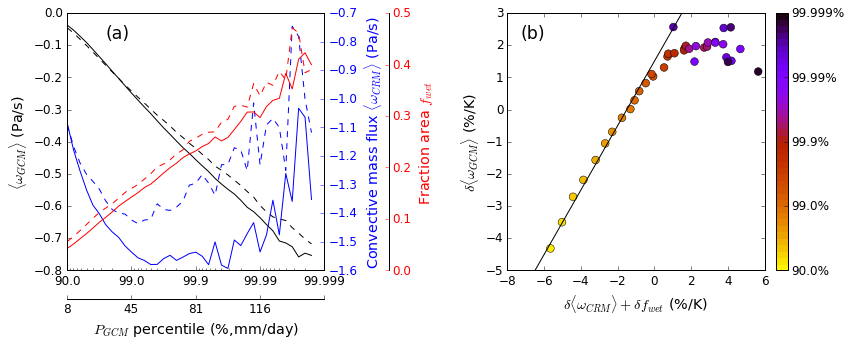

In [18]:
###---- Scatter plot ----###

## Fixed variables
compset = compset_SPCAM
frac_id = frac_id_root+crm_pr_id.split('_')[-1]

# Scaling-dependent parameters
pr_sc = pr_sc_omega_T_3
pr_type_name = "scaling_3"
varids_for_scaling = varids_for_scaling_3
scaling_profiles = scaling_profiles_omega_T_3
fracChange_pr = fracChange_pr_omega_T
fracChange_contributions = contributions_omega_T_3
outdir = "OMEGA-CRM-W_T"

## Define variables
ts_id = "TS"
pr_id = "PRECT"
gcm_pr_id = "PRECT"
crm_pr_id = "CRM_PREC_I50"
gcm_omega_id = varids_for_scaling[gcm_pr_id][2]
crm_omega_id = varids_for_scaling[crm_pr_id][2]
subset = subset_all

## Plot scatter
fig = plt.figure(figsize=(14,4.8))
gs = gridspec.GridSpec(1,4,width_ratios=[5,1.7,5,0.7])

## x-axis
Q_IL = df_quantile[compset][experiments[1]][subset]["Q_IL"]
x = np.flipud(1./np.subtract(np.ones(Q_IL.size),Q_IL/100.))
cols = [pal['Q_IL'][str(Q)] for Q in Q_IL[10:]]

labels_ax1 = {experiment_PI:"SPCAM_CTRL",experiment_4xCO2:"SPCAM_4xCO2"}

## Compute temperature change
ts1 = df_mean[compset][experiments[0]][subset][ts_id][0]
ts2 = df_mean[compset][experiments[1]][subset][ts_id][0]
dts = ts2-ts1

## Compute fractional changes in vertically-integrated omega and fraction area
gcm_mf = {}
crm_mf = {}
frac_at_pr_q = {}
gcm_mf_est = {}
crm_mf_est = {}
for experiment in experiments[::-1]:
    
    gcm_mf[experiment] = np.zeros((Q_IL_ext.size-1,))
    crm_mf[experiment] = np.zeros((Q_IL_ext.size-1,))
    
    for i in range(len(Q_IL_ext)-1):
        Q_id = str(Q_IL_ext[i])

        pres = computeP(df_meanAtQ[compset][experiment][subset]['PS'][pr_id][Q_id][0])
        ## Compute GCM-scale mass flux
        gcm_omega = df_meanProfileAtQ[compset][experiment][subset][gcm_omega_id][pr_id][Q_id]
        gcm_mf[experiment][i] = verticalPressureIntegral(pres,gcm_omega)/verticalPressureIntegral(pres)
        ## Compute convective-scale mass flux
        crm_omega = df_meanProfileAtQ[compset][experiment][subset][crm_omega_id][pr_id][Q_id]
        crm_mf[experiment][i] = verticalPressureIntegral(pres,crm_omega)/verticalPressureIntegral(pres)

    ## Get fraction area
    frac_at_pr_q[experiment] = np.array(df_meanAtQ[compset][experiment][subset][frac_id][pr_id])[0,:]
    gcm_mf_est[experiment] = np.multiply(crm_mf[experiment],frac_at_pr_q[experiment])
    crm_mf_est[experiment] = np.divide(gcm_mf[experiment],frac_at_pr_q[experiment])

# Compute all fractional changes
def computeFrC(xPI,x4xCO2,dts):
    return (x4xCO2/xPI-1.)/dts*100.   # Assuming all quantities are floats
    
frC_gcm_mf = computeFrC(gcm_mf[experiment_PI],gcm_mf[experiment_4xCO2],dts)
frC_gcm_mf_est = computeFrC(gcm_mf_est[experiment_PI],gcm_mf_est[experiment_4xCO2],dts)
frC_crm_mf = computeFrC(crm_mf[experiment_PI],crm_mf[experiment_4xCO2],dts)
frC_crm_mf_est = computeFrC(crm_mf_est[experiment_PI],crm_mf_est[experiment_4xCO2],dts)
frC_frac_at_pr_q = computeFrC(frac_at_pr_q[experiment_PI],frac_at_pr_q[experiment_4xCO2],dts)


###---- First plot ----###

ax0 = plt.subplot(gs[0])

## Plot
ax0.set_xscale('log')
ax01 = ax0.twinx()
ax02 = ax0.twinx()
c0 = 'k'
c1 = 'b'
c2 = 'r'
ax01.tick_params('y', colors=c1)
ax02.tick_params('y', colors=c2)
ax02.spines['right'].set_position(('axes',1.25))  # shifts position of ax3

# Secondary x axis
ax_newx = ax0.twiny()
ax_newx.xaxis.set_ticks_position('bottom')
ax_newx.spines['bottom'].set_position(('axes', -0.11))

for experiment in experiments[::-1]:

    ## PRECT quantiles vs. PRECT at CRM_PREC quantiles
    lab = exp_labels[experiment]
    gcm_mf_plot = np.hstack([[np.nan]*9,gcm_mf[experiment],[np.nan]])
    crm_mf_plot = np.hstack([[np.nan]*9,crm_mf[experiment],[np.nan]])
    frac_at_pr_q_plot = np.hstack([[np.nan]*9,frac_at_pr_q[experiment],[np.nan]])
    ax0.plot(x,gcm_mf_plot,c=c0,linestyle=lt[experiment])
    ax01.plot(x,crm_mf_plot,c=c1,linestyle=lt[experiment])
    ax02.plot(x,frac_at_pr_q_plot,c=c2,linestyle=lt[experiment])


## Format x axis on inverse-logarithmic scale
ax0.invert_xaxis() # reverse x-axis
labels = [item.get_text() for item in ax0.get_xticklabels()]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(1,N):
    labels[i] = str(100*(1-10**(-n+i-1)))
    if -n+i-1 == 0:
        break
ax0.set_xticklabels(labels)


## Replace labels on secondary x axis
labels_x = [item.get_text() for item in ax0.get_xticklabels()]
ax_newx.set_xticks(np.linspace(0,1,5))
pr_q_x = df_quantile[compset][experiment][subset][pr_id][9:]
n = ceil(log10(x.max()))
N = len(labels)
for i in range(0,N):
    j = 10*(i-1)-1
    if j <= len(Q_IL_ext) and j >= 2:
        labels_x[i-2] = "%.f"%pr_q_x[j].round(0)
    else:
        labels_x[i-2] = ''
ax_newx.set_xticklabels(labels_x)

ax_newx.xaxis.tick_bottom()
ax_newx.xaxis.set_label_position('bottom')
ax_newx.set_xlabel(r"$P_{GCM}$ percentile (%,mm/day)",fontsize='x-large')

ax0.set_ylabel(r"$\langle\omega_{GCM}\rangle$ (Pa/s)",color=c0)
ax01.set_ylabel(r"Convective mass flux $\langle\omega_{CRM}\rangle$ (Pa/s)",color=c1)
ax02.set_ylabel(r"Fraction area $f_{wet}$",color=c2)

###---- Second plot ----###

ax1 = plt.subplot(gs[2])

# Q_slice = slice(0,35)
Q_slice = slice(0,40)

ax1.scatter(frC_gcm_mf_est[Q_slice],frC_gcm_mf[Q_slice],c=cols,marker=mark[experiment_PI],linewidth=0.5,s=60)
# ax1.scatter(frC_frac_at_pr_q[Q_slice],frC_gcm_mf[Q_slice],c=cols,marker=mark[experiment_PI],linewidth=0.5,s=65)

print "Second plot:"
print "- Last 4 percentiles have been removed because are outliers"

a,b,r,p,err = linregress(frC_gcm_mf_est[Q_slice],frC_gcm_mf[Q_slice])
x0,x1 = -20,20
y0,y1 = a*np.array((x0,x1))+np.array((b,b))

# trans1 = mtransforms.blended_transform_factory(ax1.transAxes, ax1.transAxes)
# ax1.text(0.6,0.15,"slope = %1.2f"%a,fontsize='x-large',transform=trans1)
# ax1.text(0.6,0.05,"r = %1.2f"%r,fontsize='x-large',transform=trans1)

print "Regression coefficient :",r
print "p_value :",p

# xlims = ax0.get_xlim()
# ylims = ax0.get_ylim()
xlims = (-8,6)
ylims = (-5,3)
shif_x = -1.5
addOneToOneLine = pr_id == 'PRECT'
if addOneToOneLine:
    xmin1 = -10
    xmax1 = 15
    ax1.plot((xmin1+shif_x,xmax1+shif_x),(xmin1,xmax1),'k')
#     ax1.plot((x0,x1),(y0,y1),'k--')
    ax1.set_xlim(xlims)
    ax1.set_ylim(ylims)
ax1.set_xlabel(r"$\delta{\langle\omega_{CRM}\rangle} + \delta f_{wet}$ (%/K)")
# ax1.set_xlabel(r"$\delta f_{wet}$ (%/K)")
ax1.set_ylabel(r"$\delta \langle\omega_{GCM}\rangle$ (%/K)")
ax1.legend(loc="lower right")


###---- Plot colorbar ----###

ax2 = plt.subplot(gs[3])

Z = [[0,0],[0,0]]
cmap = plt.get_cmap(cmaps["Q_IL"])
cs = ax2.contourf(Z,alpha=1.0,levels=range(len(Q_IL_ext_colorbar)),cmap=cmap)
box = ax2.get_position()
# ax2.set_position([box.x0*1.05, box.y0, box.width, box.height])
# axColor = plt.axes([box.x0*1.05 - box.width * 1.87, box.y0, 0.012, box.height])
axColor = plt.axes([box.x0*1.035 - box.width * 1.87, box.y0, 0.012, box.height])
cb = plt.colorbar(cs, cax = axColor, orientation="vertical")
# cb = plt.colorbar(cs)
Q_ind = range(0,len(Q_IL_ext_colorbar),10)
cb.set_ticks(Q_ind)
cb.set_ticklabels(["%s%%"%Q_IL_ext_colorbar[i] for i in Q_ind])
ax2.axes.clear()
ax2.axis('off')

# subplot labels
trans0 = mtransforms.blended_transform_factory(ax0.transAxes, ax0.transAxes)
ax0.text(0.15,0.9,"(a)",fontsize='xx-large',transform=trans0)
trans2 = mtransforms.blended_transform_factory(ax1.transAxes, ax1.transAxes)
ax1.text(0.05,0.9,"(b)",fontsize='xx-large',transform=trans2)

plt.savefig(os.path.join(figdir,outdir,"fig_paper_changeVsAQAndFracChange_omegaGCM_omegaCRM_fracarea_%s_%s_%s.pdf"%(pr_id,compset,subset)),
            bbox_inches='tight')

plt.show()